# Name: Mohammed Ba Salem

# Samsung Health Data Project

The following jupyter note will demonstrate some data cleaning and exploratory and visualization analysis. It will cover the below sections:

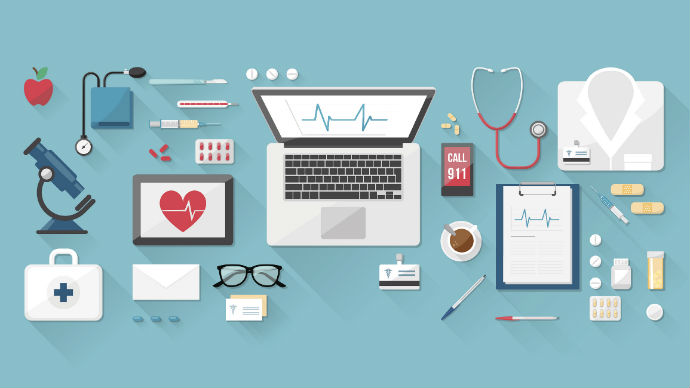

1. Sleeping Data

   1. Data Cleaning.
   2. Explotatory Analysis and Visualization. 


2. Exercise Data

   1. Data Cleaning.
   2. Explotatory Analysis and Visualization.
   
   
3. Step Count Data

   1. Data Cleaning.
   2. Explotatory Analysis and Visualization.   
   
   
   
4. Heart Rate Data

   1. Data Cleaning.
   2. Explotatory Analysis and Visualization.
   
  
5. Floor Climb Data

   1. Data Cleaning.
   2. Explotatory Analysis and Visualization.
   
   
6. Conclusion & Verdict


In [1]:
!pip install WordCloud

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline 
import re
import datetime
from datetime import timedelta
from datetime import date 
from datetime import time
import calendar 
from wordcloud import WordCloud
import re

# 1. Sleeping Data

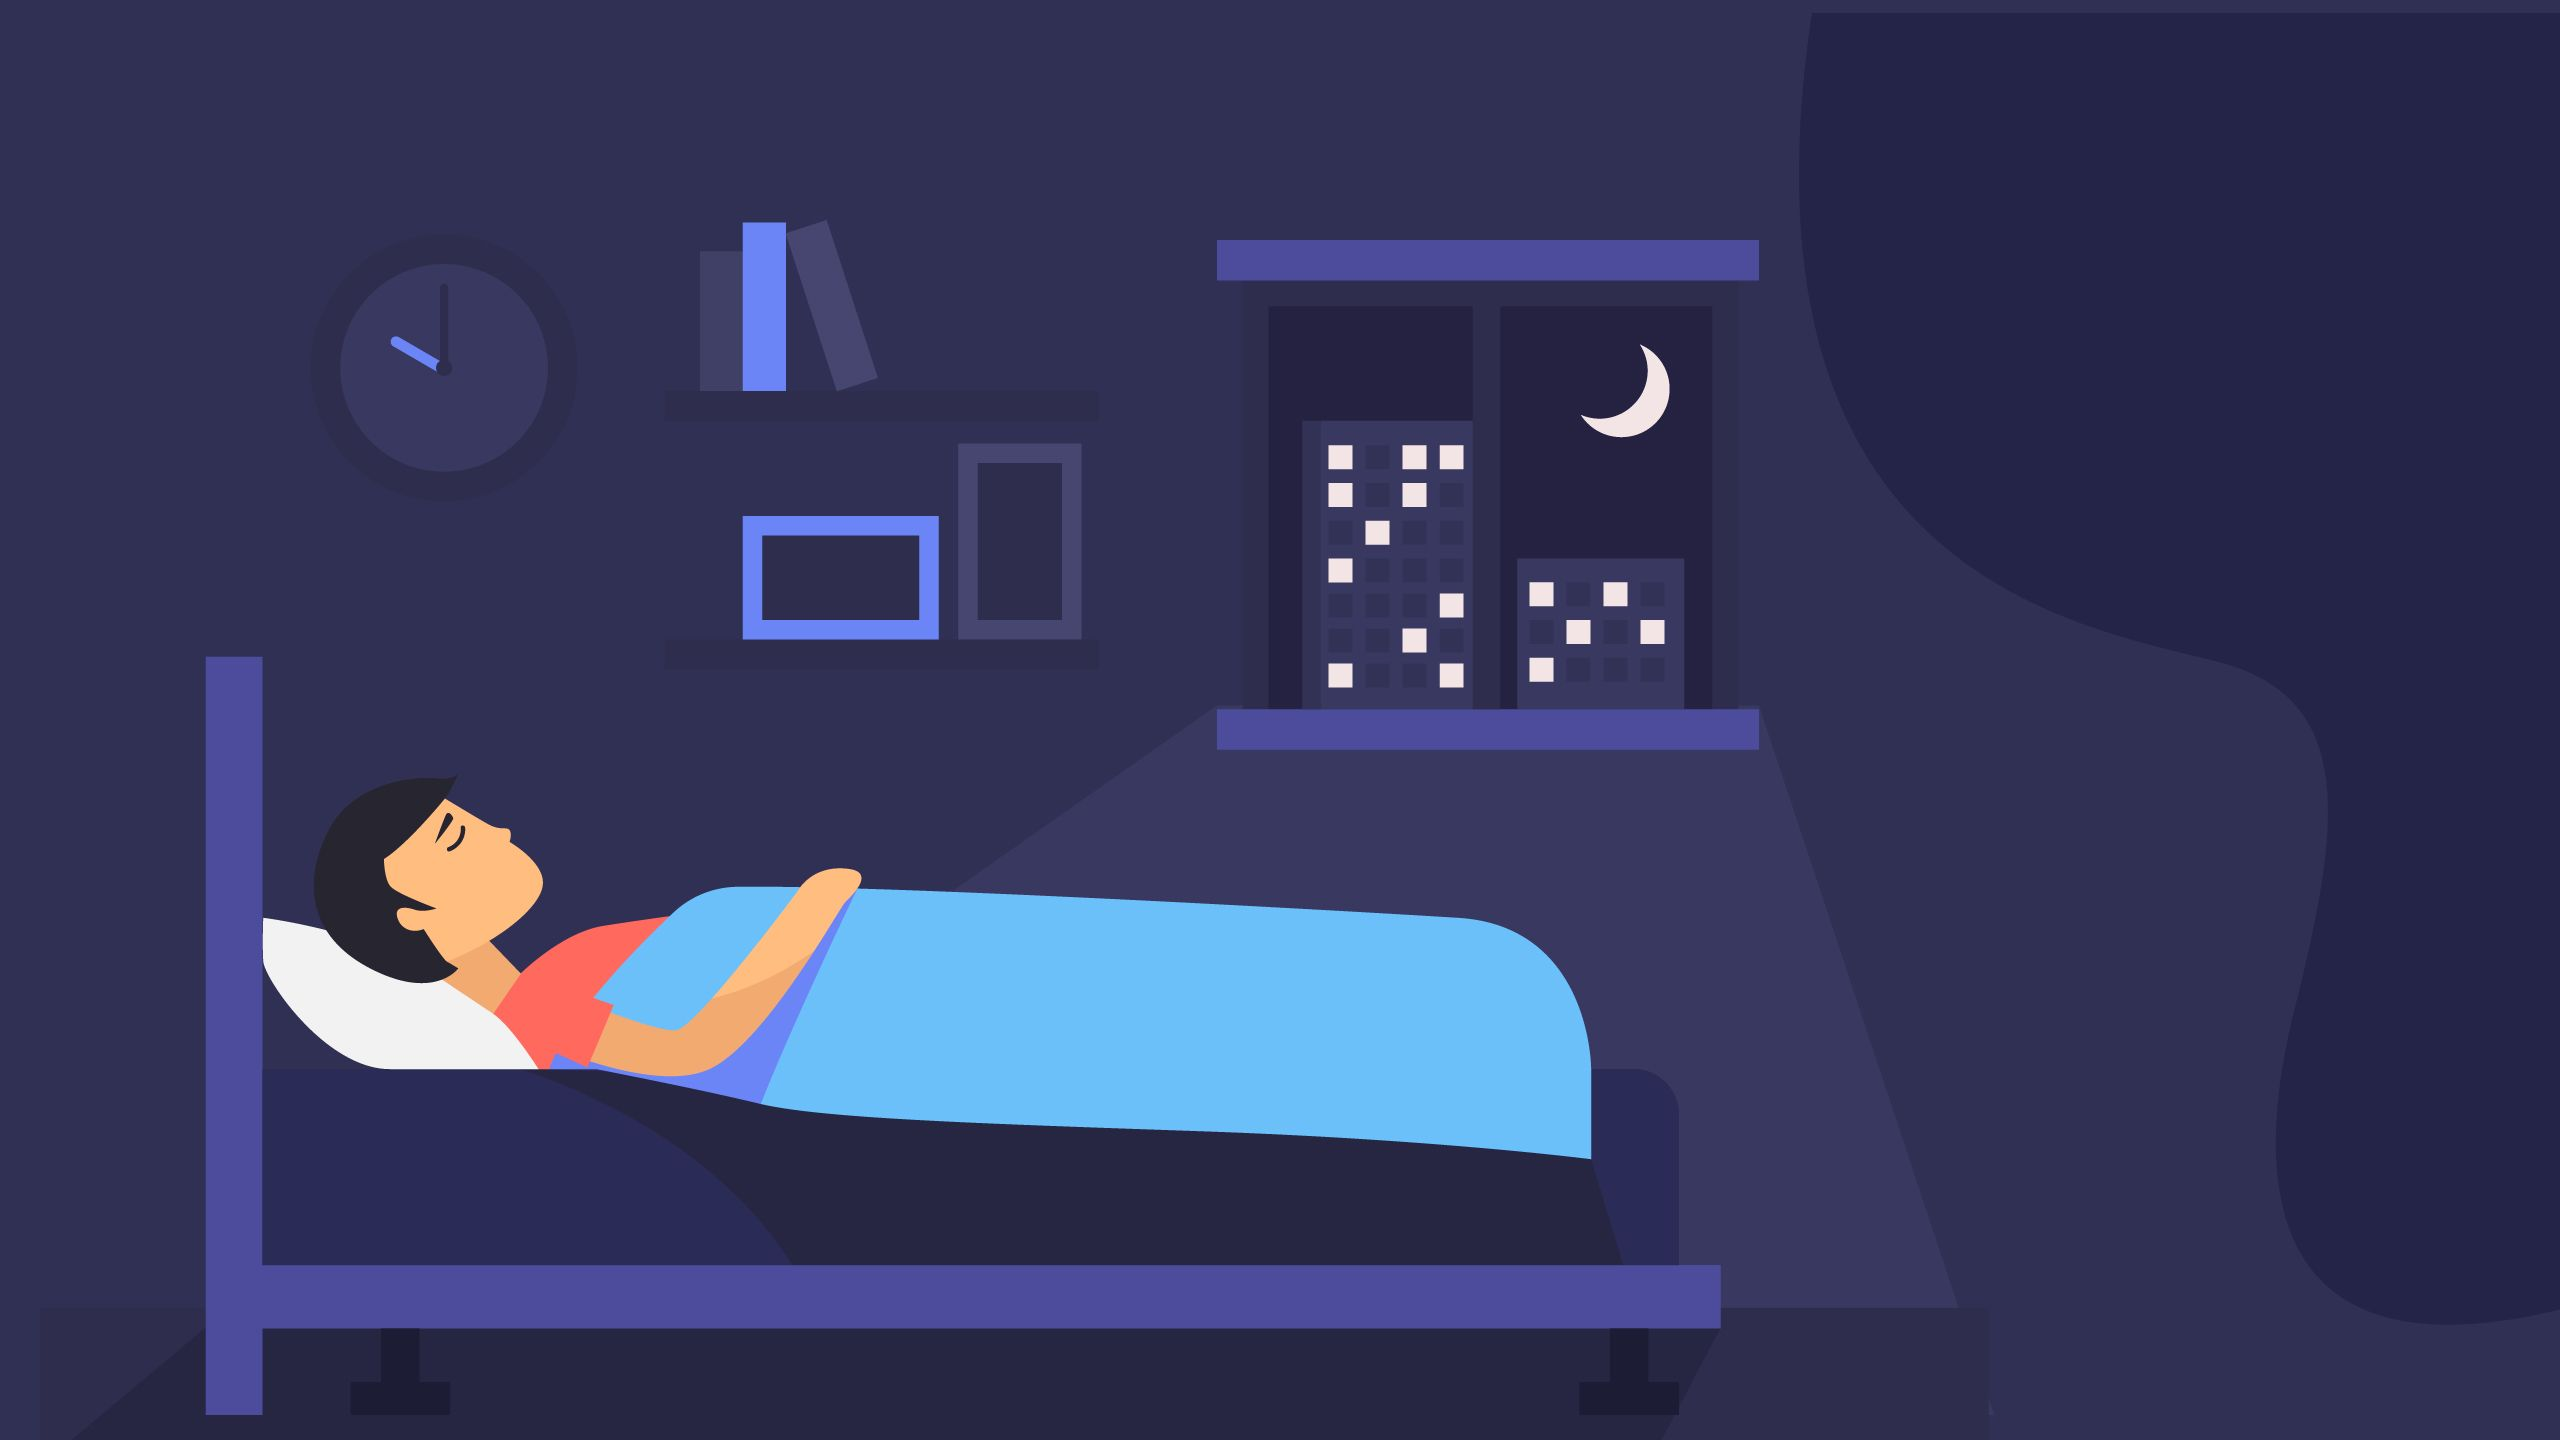

## 1.1 Data Cleaning

 In this section, a deep look is needed to analyze the data, but first, we have to make sure that, our data is clean and well orgnized. To do so, the following steps were considered: 
 
 1. Plotting a bar chart for NaN percentage at every column, where it will give us some glance which columns are have almost 100% NaN or missing value. 
 
 2. Plotting again the heat map to show NaN and Missing values of sleeping data. 
 
 3. Dropping 100% NaN columns based on heat map, and NaN percentage bar chart. 
 
 4. Creating a new column "date" in sleeping data from start column that continas only the date without time. Drop the start and end columns as they will be needed in the analysis since we have the time duration.  
 
 5. Creating a new column "Weekday" which will contain the day of the respective date provided in the sleeping data. 
 
 6. Classify the days into weekday and weekend and create a new column named "Week_Class". 
 
 7. Converthing time in bed in hours into minutes for the easiness in visualizing the data and plotting the mean. 

In [3]:
# Reading the sleeping data 
sl_df = pd.read_csv("sleep.csv",encoding = "utf-8",index_col=0)

In [4]:
# getting the information of the data file
sl_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 0 to 500
Data columns (total 17 columns):
efficiency                              501 non-null float64
extra_data                              0 non-null float64
has_sleep_data                          499 non-null float64
com.samsung.health.sleep.comment        0 non-null float64
com.samsung.health.sleep.datauuid       501 non-null object
quality                                 38 non-null float64
com.samsung.health.sleep.custom         0 non-null float64
com.samsung.health.sleep.end_time       501 non-null int64
original_wake_up_time                   36 non-null object
com.samsung.health.sleep.start_time     501 non-null int64
com.samsung.health.sleep.time_offset    501 non-null object
com.samsung.health.sleep.deviceuuid     501 non-null object
com.samsung.health.sleep.update_time    501 non-null int64
original_bed_time                       36 non-null object
com.samsung.health.sleep.create_time    501 non-null int64
co

In [5]:
# show the data
sl_df.head()

efficiency  extra_data  has_sleep_data  com.samsung.health.sleep.comment  \
0   91.540790         NaN             1.0                               NaN   
1   90.769230         NaN             1.0                               NaN   
2   97.391304         NaN             1.0                               NaN   
3   92.555330         NaN             1.0                               NaN   
4   92.663040         NaN             1.0                               NaN   

      com.samsung.health.sleep.datauuid  quality  \
0  00018ab3-e237-658f-6a4c-0ac9fd1e439e      NaN   
1  0191b301-17de-40e1-0626-909863967f0f      NaN   
2  01df9633-a82a-cf08-921c-358a47c0f1bb      NaN   
3  0398e3ab-bec6-2ad9-8fae-9d64ea80e7c1      NaN   
4  03f12ce0-9ade-5c74-9d57-686fd3966f2a  50003.0   

   com.samsung.health.sleep.custom  com.samsung.health.sleep.end_time  \
0                              NaN                      1538205120000   
1                              NaN                      1536662400000   
2                              NaN                      1535714940000   
3                              NaN                      1543055160000   
4                              NaN                      1520501400000   

     original_wake_up_time  com.samsung.health.sleep.start_time  \
0                      NaN                        1538185320000   
1                      NaN                        1536635160000   
2                      NaN                        1535708100000   
3                      NaN                        1543025400000   
4  2018-03-08 09:30:00.000                        1520479380000   

  com.samsung.health.sleep.time_offset com.samsung.health.sleep.deviceuuid  \
0                             UTC-0400                          F/D7+hL5E5   
1                             UTC-0400                          F/D7+hL5E5   
2                             UTC-0400                          F/D7+hL5E5   
3                             UTC-0500                          F/D7+hL5E5   
4                             UTC-0500                          F/D7+hL5E5   

   com.samsung.health.sleep.update_time        original_bed_time  \
0                         1538205990294                      NaN   
1                         1536663146013                      NaN   
2                         1535715043724                      NaN   
3                         1543055270788                      NaN   
4                         1520516398387  2018-03-08 03:23:00.000   

   com.samsung.health.sleep.create_time com.samsung.health.sleep.pkg_name  \
0                         1538205990294       com.sec.android.app.shealth   
1                         1536663146013       com.sec.android.app.shealth   
2                         1535715043724       com.sec.android.app.shealth   
3                         1543055270788       com.sec.android.app.shealth   
4                         1520501522181       com.sec.android.app.shealth   

   original_efficiency  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4             92.66304

In [6]:
# Checking data shape (number of rows and columns)
sl_df.shape

(501, 17)

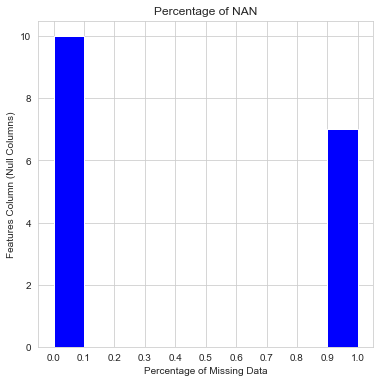

In [7]:
#plotting the percentage of missing value in each column (feature) to % of null columns 
NaN_Percentage = sl_df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='blue')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

From above Missing & NaN Percentage plot, there are 5 columns containing no NaN values, and 3 columns about 100% are all NaN values. 

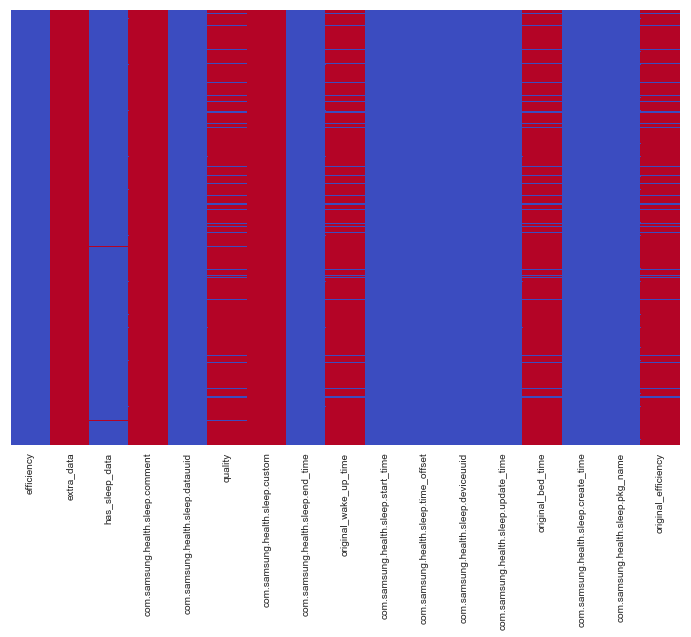

In [8]:
#Plotting missing data heat map to know clearly which columns are missing or containing NaN 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(sl_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

The heat map shows a more further deep visualization for columns that contain NaN or missing values. We can see that com.samsung.health.sleep.custom ,extra_data,com.samsung.health.sleep.comment,original_efficiency,original_wake_up_time, original_bed_time and quality have more red. This red color shows where missing data are occured. 

In [9]:
#Displaying the percentage of each column missing value for further investigating
print(NaN_Percentage)

efficiency                              0.000000
com.samsung.health.sleep.create_time    0.000000
com.samsung.health.sleep.datauuid       0.000000
com.samsung.health.sleep.update_time    0.000000
com.samsung.health.sleep.end_time       0.000000
com.samsung.health.sleep.pkg_name       0.000000
com.samsung.health.sleep.start_time     0.000000
com.samsung.health.sleep.time_offset    0.000000
com.samsung.health.sleep.deviceuuid     0.000000
has_sleep_data                          0.003992
quality                                 0.924152
original_bed_time                       0.928144
original_wake_up_time                   0.928144
original_efficiency                     0.928144
com.samsung.health.sleep.comment        1.000000
extra_data                              1.000000
com.samsung.health.sleep.custom         1.000000
dtype: float64


In [10]:
# Dropping some unnecessary columns
drop_col = ['com.samsung.health.sleep.comment','extra_data','com.samsung.health.sleep.custom',"com.samsung.health.sleep.datauuid",
           "original_wake_up_time","com.samsung.health.sleep.pkg_name","original_bed_time","com.samsung.health.sleep.deviceuuid","com.samsung.health.sleep.update_time","has_sleep_data","original_efficiency"]
sl_df.drop(drop_col, axis = 1, inplace = True)

In [11]:
# Display after dropping unncesseary data 
sl_df.head()

efficiency  quality  com.samsung.health.sleep.end_time  \
0   91.540790      NaN                      1538205120000   
1   90.769230      NaN                      1536662400000   
2   97.391304      NaN                      1535714940000   
3   92.555330      NaN                      1543055160000   
4   92.663040  50003.0                      1520501400000   

   com.samsung.health.sleep.start_time com.samsung.health.sleep.time_offset  \
0                        1538185320000                             UTC-0400   
1                        1536635160000                             UTC-0400   
2                        1535708100000                             UTC-0400   
3                        1543025400000                             UTC-0500   
4                        1520479380000                             UTC-0500   

   com.samsung.health.sleep.create_time  
0                         1538205990294  
1                         1536663146013  
2                         1535715043724  
3                         1543055270788  
4                         1520501522181

In [12]:
# rename some columns
sl_df.columns = ['efficiency','quality',
                     'end_time','start_time','time_offset','create_time']

In [13]:
# converting the unix time (milliseconds) to day time 
for j, x, in enumerate (sl_df.end_time): 
     sl_df.end_time[j]=datetime.datetime.fromtimestamp(x/1000)

for j, x, in enumerate (sl_df.start_time): 
     sl_df.start_time[j]=datetime.datetime.fromtimestamp(x/1000)
        
for j, x, in enumerate (sl_df.create_time): 
     sl_df.create_time[j]=datetime.datetime.fromtimestamp(x/1000)

C:\Users\Mohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Mohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Mohammed\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
# arrange data based on end time date
sl_df = sl_df.sort_values('end_time', ascending = True)
sl_df.head()

efficiency  quality             end_time           start_time  \
55    94.902916      NaN  2017-12-16 06:53:00  2017-12-16 00:02:00   
300   96.341460      NaN  2017-12-18 06:42:00  2017-12-17 22:31:00   
78    93.174065      NaN  2017-12-20 03:48:00  2017-12-19 22:55:00   
203   91.434265      NaN  2017-12-22 12:18:00  2017-12-22 03:57:00   
291   93.188850      NaN  2017-12-23 10:10:00  2017-12-23 04:48:00   

    time_offset                 create_time  
55     UTC-0500  2017-12-16 07:08:04.768000  
300    UTC-0500  2017-12-18 06:57:19.246000  
78     UTC-0500  2017-12-20 03:57:23.977000  
203    UTC-0800  2017-12-22 12:33:23.295000  
291    UTC-0800  2017-12-23 10:25:03.272000

In [15]:
# calculating the sleep duration
sl_df["sleep_duration"]= sl_df["end_time"]-sl_df["start_time"]

In [16]:
# Converting Start date-time into only date in year,month, day
sl_df['Date'] = pd.to_datetime(sl_df['end_time'])
sl_df['Date'] =sl_df['Date'].apply(lambda x: x.date() )
sl_df['Date'] = sl_df.Date.sort_values()
sl_df.head()

efficiency  quality             end_time           start_time  \
55    94.902916      NaN  2017-12-16 06:53:00  2017-12-16 00:02:00   
300   96.341460      NaN  2017-12-18 06:42:00  2017-12-17 22:31:00   
78    93.174065      NaN  2017-12-20 03:48:00  2017-12-19 22:55:00   
203   91.434265      NaN  2017-12-22 12:18:00  2017-12-22 03:57:00   
291   93.188850      NaN  2017-12-23 10:10:00  2017-12-23 04:48:00   

    time_offset                 create_time sleep_duration        Date  
55     UTC-0500  2017-12-16 07:08:04.768000       06:51:00  2017-12-16  
300    UTC-0500  2017-12-18 06:57:19.246000       08:11:00  2017-12-18  
78     UTC-0500  2017-12-20 03:57:23.977000       04:53:00  2017-12-20  
203    UTC-0800  2017-12-22 12:33:23.295000       08:21:00  2017-12-22  
291    UTC-0800  2017-12-23 10:25:03.272000       05:22:00  2017-12-23

In [17]:
# convert time formate into hours format
sl_df['time_in_bed'] = sl_df['sleep_duration']/np.timedelta64(1,'h')

In [18]:
# myFmt = DateFormatter("%m/%y") 
# ax.xaxis.set_major_formatter(myFmt); 
# # plot the data
# fig, ax = plt.subplots(1, 1, figsize = (20, 10))
# ax.scatter(sl_df["Date"].values, 
#        sl_df['Time_in_bed'].values,
#        cmap=sl_df['time_offset'])
# ax.set(xlabel="Date", ylabel="Sleep Duration in Hour")
# ax.set(title="Daily Sleep Duration ")

# # tell matplotlib to use the format specified above
myFmt = DateFormatter("%m/%y")
# ax.xaxis.set_major_formatter(myFmt); 

In [19]:
#Create a datetime column from start column for the purpose of ploting start sleeping hours 
sl_df["sleep_time"]=sl_df["start_time"].dt.hour

In [20]:
#Create a datetime column from end column for the purpose of ploting end sleeping hours 
sl_df["wakeup_time"]=sl_df["end_time"].dt.hour

In [21]:
sl_df.head()

efficiency  quality             end_time           start_time  \
55    94.902916      NaN  2017-12-16 06:53:00  2017-12-16 00:02:00   
300   96.341460      NaN  2017-12-18 06:42:00  2017-12-17 22:31:00   
78    93.174065      NaN  2017-12-20 03:48:00  2017-12-19 22:55:00   
203   91.434265      NaN  2017-12-22 12:18:00  2017-12-22 03:57:00   
291   93.188850      NaN  2017-12-23 10:10:00  2017-12-23 04:48:00   

    time_offset                 create_time sleep_duration        Date  \
55     UTC-0500  2017-12-16 07:08:04.768000       06:51:00  2017-12-16   
300    UTC-0500  2017-12-18 06:57:19.246000       08:11:00  2017-12-18   
78     UTC-0500  2017-12-20 03:57:23.977000       04:53:00  2017-12-20   
203    UTC-0800  2017-12-22 12:33:23.295000       08:21:00  2017-12-22   
291    UTC-0800  2017-12-23 10:25:03.272000       05:22:00  2017-12-23   

     time_in_bed  sleep_time  wakeup_time  
55      6.850000           0            6  
300     8.183333          22            6  
78      4.883333          22            3  
203     8.350000           3           12  
291     5.366667           4           10

In [22]:
# Creating a weekday column from given date for purpose of visulaization & calssification
weekday = pd.DataFrame()
daylist =[]
for i in sl_df['Date']:
    daylist.append(i.strftime('%a'))
weekday = weekday.append(daylist)
sl_df['Weekday'] = weekday

In [23]:
#Defining lists for each weekday classification with mentioned day
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thu','Fri']


def getday(day):
    if day in weekend:
        return "Weekend"
    elif day in weekday:
        return "Weekday"
    else:
        return "Other"

In [24]:
# adding week_Class column to sleeping data frame for purpose on analysis below    
sl_df['Week_Class'] = sl_df["Weekday"].apply(lambda x: getday(x))

In [25]:
# creating a function to classify sleeping hours as long or short sleep, so we can remove the short sleeping hours. 
def sleeptype(hour):
    if hour <= 3:
        return 'short_sleep'
    else:
        return 'long_sleep'

In [26]:
sl_df['time_in_bed'] = round(sl_df['time_in_bed'])

In [27]:
# creating a column for sleep type classification
sl_df['sleep_type'] = sl_df["time_in_bed"].apply(lambda x: sleeptype(x))

In [28]:
# no more needed columns
sl_df.drop(['end_time','start_time','create_time'], axis = 1, inplace = True)

In [29]:
# Yoo, get the final data
sl_df.head()

efficiency  quality time_offset sleep_duration        Date  time_in_bed  \
55    94.902916      NaN    UTC-0500       06:51:00  2017-12-16          7.0   
300   96.341460      NaN    UTC-0500       08:11:00  2017-12-18          8.0   
78    93.174065      NaN    UTC-0500       04:53:00  2017-12-20          5.0   
203   91.434265      NaN    UTC-0800       08:21:00  2017-12-22          8.0   
291   93.188850      NaN    UTC-0800       05:22:00  2017-12-23          5.0   

     sleep_time  wakeup_time Weekday Week_Class  sleep_type  
55            0            6     Fri    Weekday  long_sleep  
300          22            6     Tue    Weekday  long_sleep  
78           22            3     Sun    Weekend  long_sleep  
203           3           12     Mon    Weekday  long_sleep  
291           4           10     Tue    Weekday  long_sleep

### Travel or Daylight Saving? 

To identify the sleep duration with daytime at different time zones or time-offset, we would have to do the following: 

1. Identify the time offset in the sleeping data. 
2. Plot the sleeping duration at different dates for different time-zones. 
3. Identify the trend in the plot, in case there is a travel or daylight saving. 


In [30]:
sl_df['time_offset'].unique()

array(['UTC-0500', 'UTC-0800', 'UTC-0400', 'UTC+0200'], dtype=object)

### Assumption: 
The participant lives in Canada and one of Toronto Residence. Therfore, the following time zones will be considered for every city: 

**Time Offset: **
1. Toronto > time offset of UTC-0400. 
2. Winnpeg > time offset of UTC-0500. 
3. Vienna > time offset of UTC+0200 (Eurpe).
4. Admstown > time offset of UTC-0800 (Eurpe).  



**Daylight Saving in Toront:** 
1. Start, Sunday, March 11, 2018, 2:00:00 am clocks were turned forward 1 hour to, time offset change to UTC-0500. 

2. End, Sunday, November 4, 2018, 2:00:00 am clocks were turned backward 1 hour to time offset change to UTC-0400. 



**References** 
1. https://www.timeanddate.com/worldclock/difference.html?p1=1440 
2. https://www.timeanddate.com/time/change/canada/toronto?year=2018 
3. https://24timezones.com/world_directory/time_in_toronto.php


C:\Users\Mohammed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


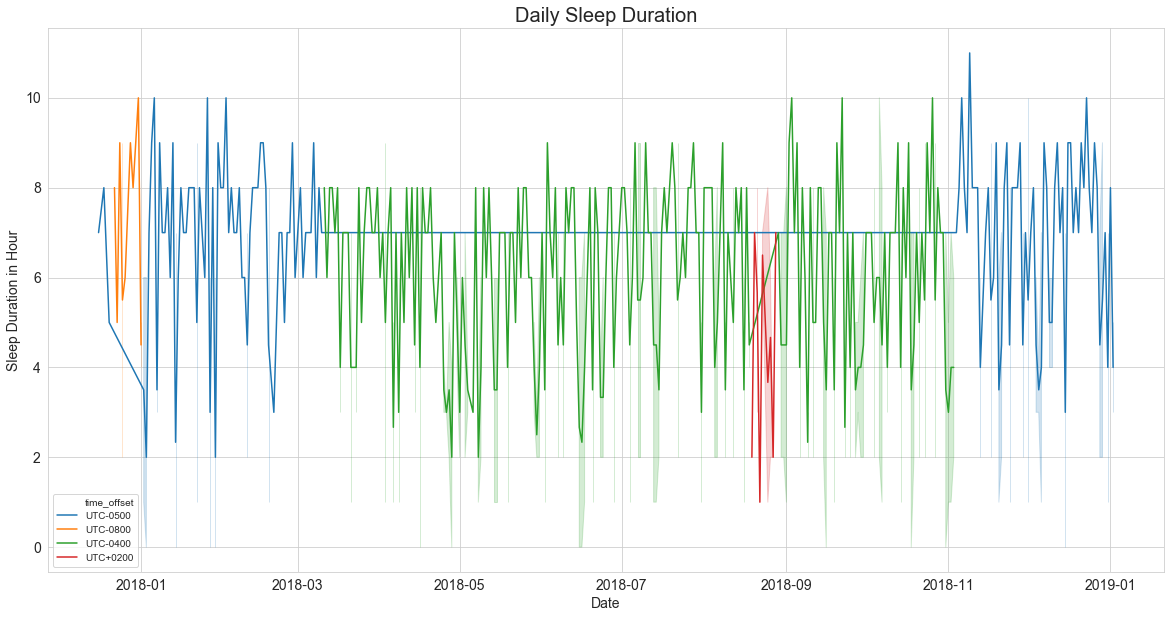

In [31]:
# plot a line plot for sleep duration vs daytime to check is it travel or daylight saving
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y='time_in_bed', hue="time_offset",
                    data=sl_df)
ax.axes.set_title("Daily Sleep Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Sleep Duration in Hour",fontsize=14)
ax.tick_params(labelsize=14);

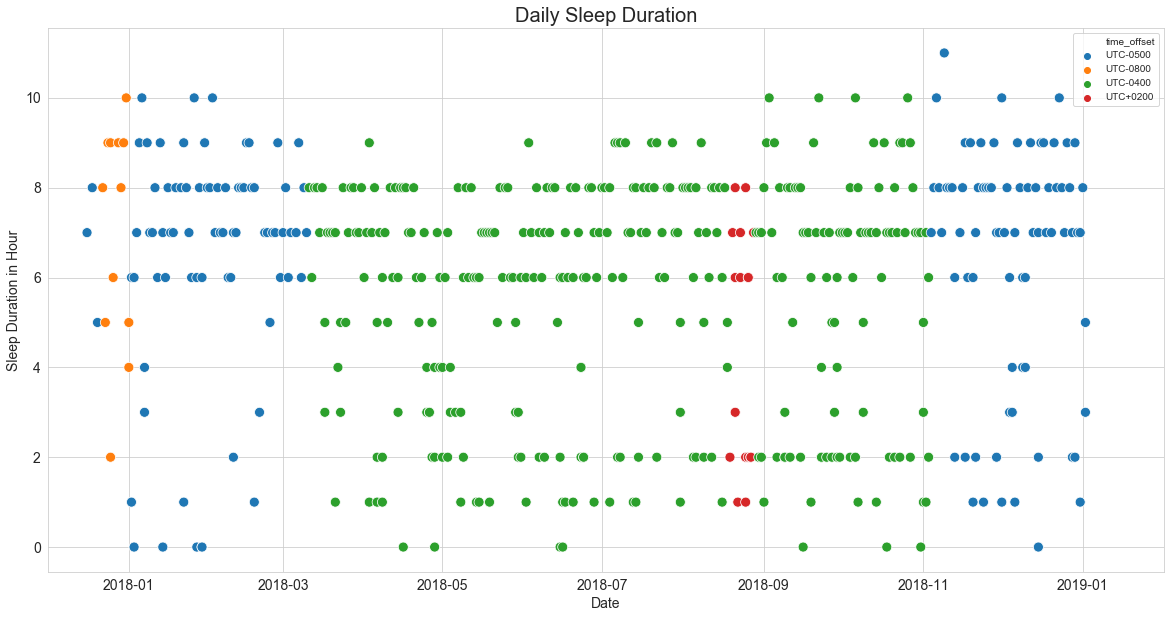

In [32]:
# plot a scatter plot for sleep duration vs daytime to check is it travel or daylight saving
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="time_in_bed", hue="time_offset", s=100,
                      data=sl_df)
ax.set(xlim=("2017-12","2019-2"))
ax.axes.set_title("Daily Sleep Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Sleep Duration in Hour",fontsize=14)
ax.tick_params(labelsize=14)

In [33]:
# display UTC-0800 time zone data 
sl_df[(sl_df.time_offset == 'UTC-0800')]

efficiency  quality time_offset sleep_duration        Date  time_in_bed  \
203   91.434265      NaN    UTC-0800       08:21:00  2017-12-22          8.0   
291   93.188850      NaN    UTC-0800       05:22:00  2017-12-23          5.0   
228   94.117645      NaN    UTC-0800       08:46:00  2017-12-24          9.0   
326   93.262410      NaN    UTC-0800       09:23:00  2017-12-25          9.0   
214   88.596500      NaN    UTC-0800       01:53:00  2017-12-25          2.0   
462   92.051280      NaN    UTC-0800       06:29:00  2017-12-26          6.0   
363   89.926735      NaN    UTC-0800       09:05:00  2017-12-28          9.0   
158   90.120964      NaN    UTC-0800       08:15:00  2017-12-29          8.0   
292   92.952385      NaN    UTC-0800       08:44:00  2017-12-30          9.0   
416   89.778534      NaN    UTC-0800       09:46:00  2017-12-31         10.0   
148   88.612100      NaN    UTC-0800       04:40:00  2018-01-01          5.0   
17    92.400000      NaN    UTC-0800       04:09:00  2018-01-01          4.0   

     sleep_time  wakeup_time Weekday Week_Class   sleep_type  
203           3           12     Mon    Weekday   long_sleep  
291           4           10     Tue    Weekday   long_sleep  
228           0            9     Thu    Weekday   long_sleep  
326          23            9     Thu    Weekday   long_sleep  
214          18           20     Wed    Weekday  short_sleep  
462           5           12     Wed    Weekday   long_sleep  
363           1           10     Tue    Weekday   long_sleep  
158           4           12     Tue    Weekday   long_sleep  
292           2           11     Wed    Weekday   long_sleep  
416           0           10     Wed    Weekday   long_sleep  
148           1            6     Thu    Weekday   long_sleep  
17            6           10     Wed    Weekday   long_sleep

In [34]:
# display UTC+0200 time zone data 
sl_df[(sl_df.time_offset == 'UTC+0200')]

efficiency  quality time_offset sleep_duration        Date  time_in_bed  \
281   89.915970      NaN    UTC+0200       01:58:00  2018-08-19          2.0   
483   89.709175      NaN    UTC+0200       07:26:00  2018-08-20          7.0   
108   90.466100      NaN    UTC+0200       07:52:00  2018-08-21          8.0   
463   87.662340      NaN    UTC+0200       02:33:00  2018-08-21          3.0   
371   90.662650      NaN    UTC+0200       05:31:00  2018-08-21          6.0   
362   73.770490      NaN    UTC+0200       01:01:00  2018-08-22          1.0   
38    87.619050      NaN    UTC+0200       07:11:00  2018-08-23          7.0   
20    90.716190      NaN    UTC+0200       06:16:00  2018-08-23          6.0   
452   89.134800      NaN    UTC+0200       08:16:00  2018-08-25          8.0   
208   70.967740      NaN    UTC+0200       01:01:00  2018-08-25          1.0   
62    93.283585      NaN    UTC+0200       02:13:00  2018-08-25          2.0   
374   88.359795      NaN    UTC+0200       06:18:00  2018-08-26          6.0   
420   89.215680      NaN    UTC+0200       01:42:00  2018-08-26          2.0   
314   90.634445      NaN    UTC+0200       05:30:00  2018-08-26          6.0   
268   76.865680      NaN    UTC+0200       02:13:00  2018-08-27          2.0   
112   83.478260      NaN    UTC+0200       01:54:00  2018-08-27          2.0   
189   91.037735      NaN    UTC+0200       07:03:00  2018-08-28          7.0   

     sleep_time  wakeup_time Weekday Week_Class   sleep_type  
281           9           11     Tue    Weekday  short_sleep  
483          17            1     Thu    Weekday   long_sleep  
108          16            0     Sun    Weekend   long_sleep  
463          14           16     Wed    Weekday  short_sleep  
371          18           23     Sat    Weekend   long_sleep  
362          23            0     Mon    Weekday  short_sleep  
38           18            1     Fri    Weekday   long_sleep  
20           17           23     Thu    Weekday   long_sleep  
452          16            0     Wed    Weekday   long_sleep  
208           3            4     Fri    Weekday  short_sleep  
62            6            8     Fri    Weekday  short_sleep  
374          19            1     Sun    Weekend   long_sleep  
420          13           14     Fri    Weekday  short_sleep  
314          17           23     Thu    Weekday   long_sleep  
268          23            1     Fri    Weekday  short_sleep  
112          10           12     Thu    Weekday  short_sleep  
189          17            0     Fri    Weekday   long_sleep

From above line plot, scatter plots and etract data, we can come up with this conclusion: 
1. The sleeping data contains a period of traveling and daylight saving. 
2. For the travel time, it can be seen from the plots and above data, there are two travel zones.

   1. Adamstown city for 10 Days from 2017-12-22 to 2018-01-01 for **Chrismas & New Year Vacation**, to escape first days of winter in Toront. 
   
   2. Vienna city for 9 Days form 2018-08-19 to 2018-08-28 for nice summer weather in Austria.  


3. For daylight saving, it can be seen that UTC-0500 shifts to UTC-0400 from March 11,2018 the start of daylight saving to Novemeber 4,2018 when daylight saving ends, and time offset returns to UTC-0500 again.   

4. We effectively have 3 zones, (UTC-0500 & UTC-0400 is actually one zone for Toronto for differnt time offset due to daysaving). Second two zones are UTC-0800 and UTC+0200. The reason for this is traveling and daysaving. 

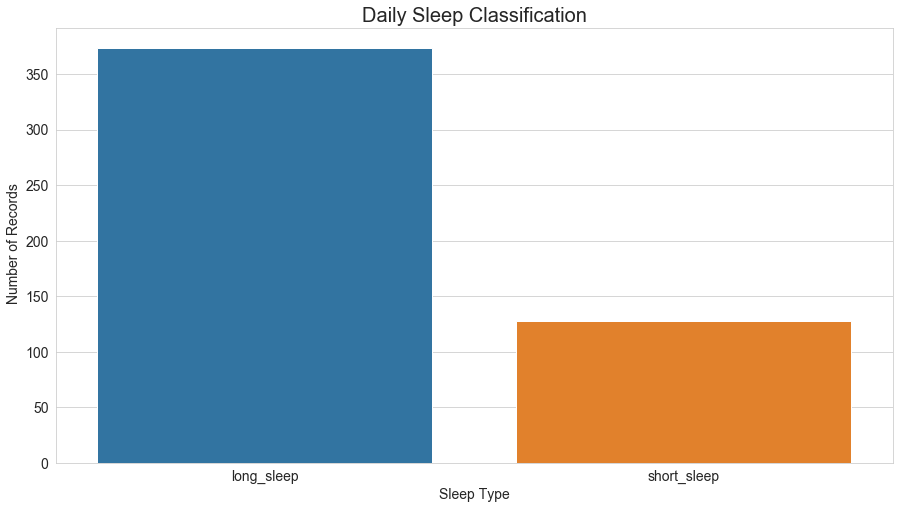

In [35]:
# count plot the long sleep duration and short sleep duration
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="sleep_type", data=sl_df,);
ax.axes.set_title("Daily Sleep Classification",fontsize=20)
ax.set_xlabel("Sleep Type",fontsize=14)
ax.set_ylabel(" Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

looks like we have more than 100 short_sleep duration, for the purpose of analyizing the sleeping data perfectly, we will remove them from the data for the following reasons: 

1. Wrong sensor reading as it may detect movement while sleeping and while consider it as wakeup. 
2. Short sleep may also be a nap, so we would only be interested in long deep sleep. 

In [36]:
# removig short_sleep
short_sleep = sl_df[sl_df.iloc[:,10]== "short_sleep"].index
sl_df = sl_df.drop(short_sleep, axis=0)

## 1.2 Explotatory Analysis and Visualization

### 1.2.1 Bed Time Hours Behaviour 

Plotting the frequency of records for sleep duration, start sleeping time and wakeup timw will give us a glance about sleeping habit and behaviour of the participant. We can observe the following: 


1. As most human spends about one-third of their lives asleep, then sleep is a vital indicator of overall health. The bar plot of daily sleep duration for full one year cycle shows that the participant is getting enough sleeping hours. The high record shown is 7 hours. According to National Sleep Foundation Scientific (NSF), the recommended sleeping hours for younge adults and adults (26-24 years) are 7-9 hours which this participant have [1]. 

2. The start sleep time plot helps us to identify the most common start sleeping hour. The most common hour is 10 pm followed by 11 pm. This basically indicates a good sleeping habits which will positively affect his health and performance. There are some late sleeping hours, those late hours are happend to be in some weekday or weekend, the explainations for this can be the following:


         1. The particippant common sleeping hours even in weekend is 10 pm, which is a good sign of good behaviour, however, there are some late hours in weekday those probably happended during long weekedn(Monday), or when he traveled for vacation.  
     
         2. There also late sleeping hours, those mostly in weekend as there is no early morning works, so some late time spent in parties or at bar. 
     
        3. The other late sleeping hours in weekday or weekend, prbably due to bad reading from the device sensor due to movement while sleeping or nightmare.
     
         4. The weekday plot confirms what was concluded in point 3 above.
     
     
3. The wakeup time will helps us to identify how active the participant is, and it should be a reflection of what was concluded in above point 2 above start sleeping time. The most common sleeping hour is 6 am followed by 5 am. This basically indicates a regular wakup for someone who is working, and it shows how active this person is, in addition to early wakeup is another indicator of enough sleeping hours. As matter of fact, as concluded in point 2 above, the most common start sleeping hour is 10 pm, and common wakeup hour is 6 am, this gives a totall of 8 hours per day. This is a good sign for active health person. There are some late wakeup hours in the morning, not too much but few, in addition to some late wakeup hours at night! Those can be explained as following: 

        1. Late morning wake up time such as 9-10 am can be wakeup time during vacation and rest days (longweekend).
    
    
    
        2. Late evening wake up (11 pm) and too early morning wakeup time (2 and 3 am), those are wrong reading from sensor due to movement while sleeping or nightmare. 
    
**Conclusion:** 
The participant has a good health habits, there is a high expectation that he/she can perform well in daily basis activities. 


**References:**
1. https://www.sleepfoundation.org/excessive-sleepiness/support/how-much-sleep-do-we-really-need     
     

In [37]:
order0 = round(sl_df['time_in_bed']).value_counts(ascending = False).index

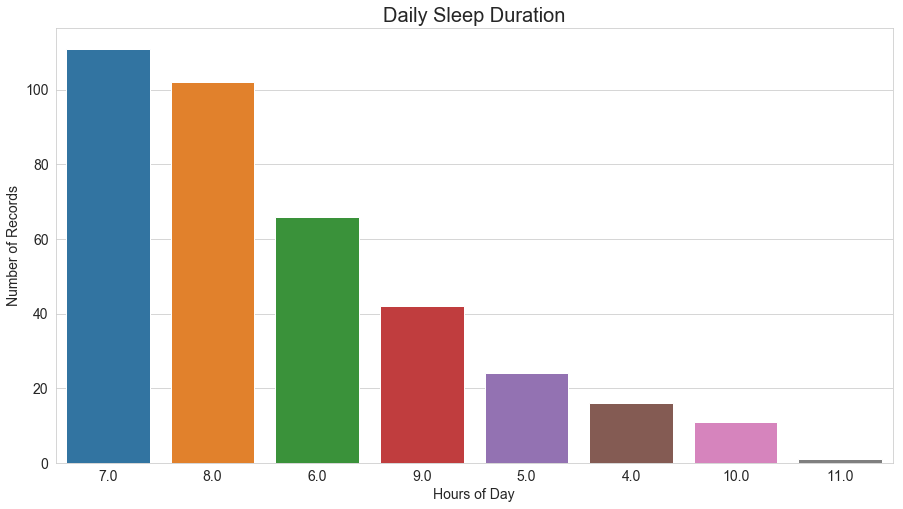

In [38]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="time_in_bed", data=sl_df, order = order0);
ax.axes.set_title("Daily Sleep Duration",fontsize=20)
ax.set_xlabel("Hours of Day",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

In [39]:
order1 = sl_df['sleep_time'].value_counts(ascending = False).index

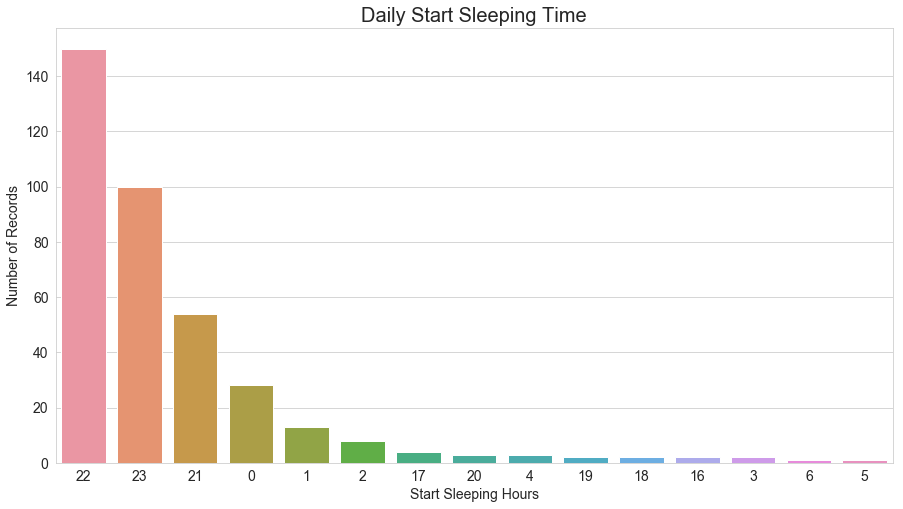

In [40]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="sleep_time", data=sl_df, order = order1);
ax.axes.set_title("Daily Start Sleeping Time",fontsize=20)
ax.set_xlabel("Start Sleeping Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

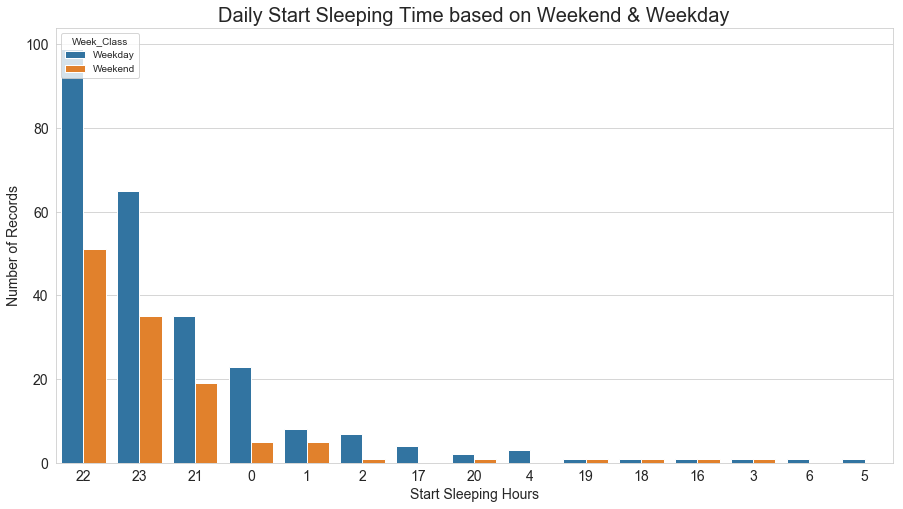

In [41]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="sleep_time", data=sl_df, order = order1, hue ="Week_Class");
ax.axes.set_title("Daily Start Sleeping Time based on Weekend & Weekday",fontsize=20)
ax.set_xlabel("Start Sleeping Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

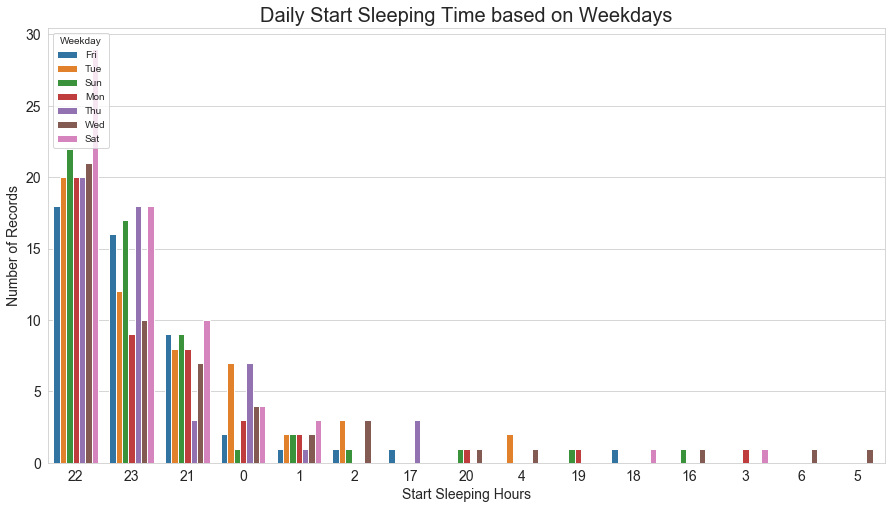

In [42]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="sleep_time", data=sl_df, order = order1, hue ="Weekday");
ax.axes.set_title("Daily Start Sleeping Time based on Weekdays",fontsize=20)
ax.set_xlabel("Start Sleeping Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

In [43]:
order2 = sl_df['wakeup_time'].value_counts(ascending = False).index

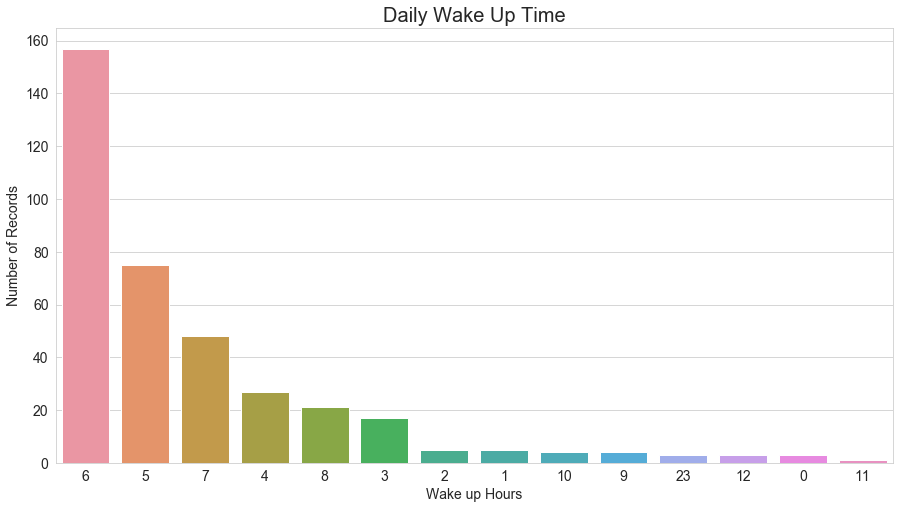

In [44]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="wakeup_time", data=sl_df, order = order2);
ax.axes.set_title("Daily Wake Up Time",fontsize=20)
ax.set_xlabel("Wake up Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

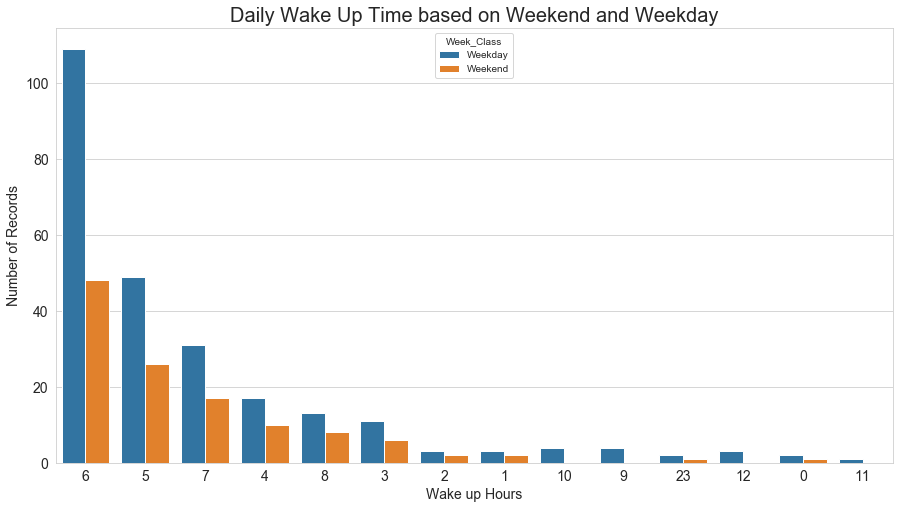

In [45]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="wakeup_time", data=sl_df, order = order2, hue="Week_Class");
ax.axes.set_title("Daily Wake Up Time based on Weekend and Weekday",fontsize=20)
ax.set_xlabel("Wake up Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

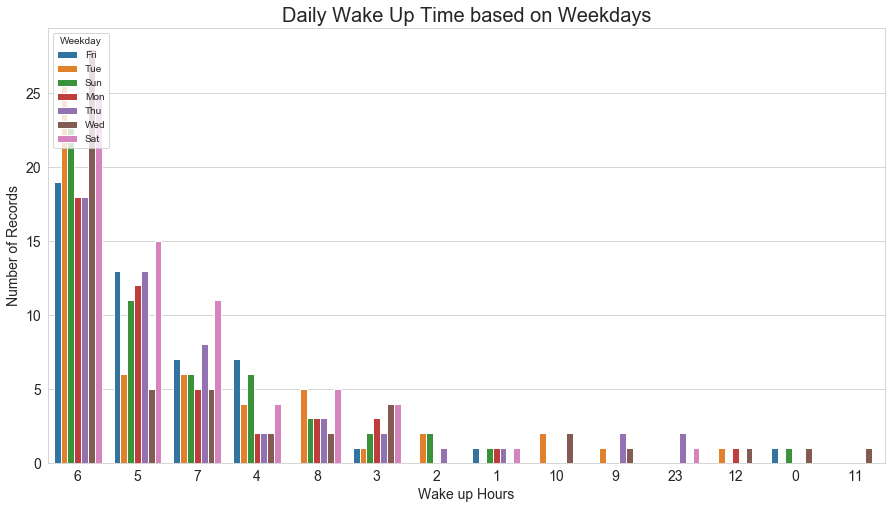

In [46]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="wakeup_time", data=sl_df, order = order2, hue="Weekday");
ax.axes.set_title("Daily Wake Up Time based on Weekdays",fontsize=20)
ax.set_xlabel("Wake up Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

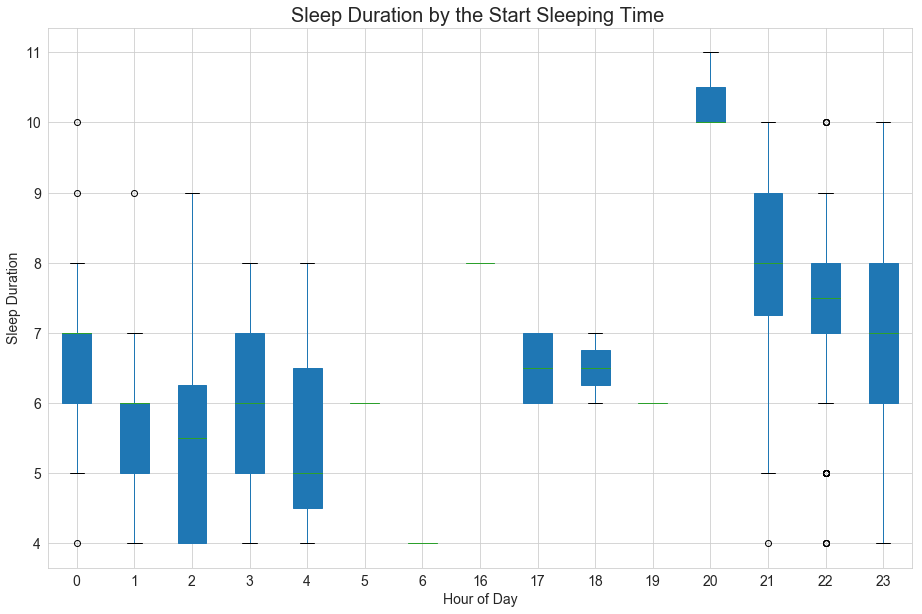

In [47]:
ig, ax = plt.subplots(figsize=(15,10));
box=sl_df.boxplot(column=["time_in_bed"], by=sl_df["sleep_time"], ax=ax, patch_artist=True,grid=True);
plt.suptitle('');
plt.xlabel("Hour of Day",fontsize = 14);
plt.ylabel("Sleep Duration",fontsize = 14);
plt.title("Sleep Duration by the Start Sleeping Time ",fontsize = 20);
ax.tick_params(labelsize=14)
plt.show();

Text(0, 0.5, 'Average Time in Bed in Minutes')

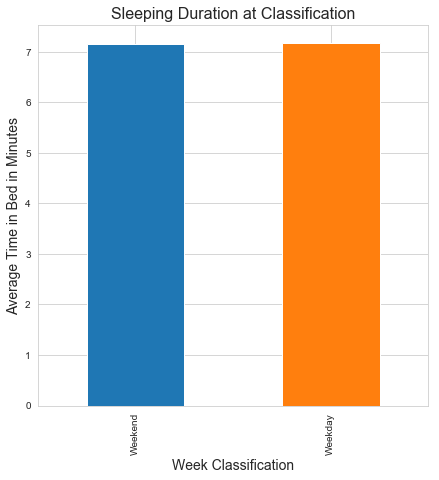

In [48]:
fig = plt.figure(figsize=(7,7))
sl_df.groupby(['Week_Class'])["time_in_bed"].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Sleeping Duration at Classification", fontsize=16)
plt.xlabel("Week Classification", fontsize=14)
plt.ylabel("Average Time in Bed in Minutes", fontsize=14)

In [49]:
# fig = plt.figure(figsize=(15,15))

# # plt.subplots_adjust(wspace=0.4, hspace=0.3)

# plt.subplot(2, 2, 1)
# sl_df.groupby(['Weekday'])["time_in_bed"].mean().sort_values(ascending=True).plot(kind='bar',color="purple")
# plt.suptitle('');
# plt.xlabel("Day of Week",fontsize = 14);
# plt.ylabel("Sleep Duration",fontsize = 14);
# plt.title("Daily Sleep Duration per Week ",fontsize = 20);
# ax.tick_params(labelsize=14)

# plt.subplot(2, 2, 2) 
# sl_df.groupby(['Weekday'])["sleep_time"].mean().sort_values(ascending=True).plot(kind='bar',color="blue")
# plt.suptitle('');
# plt.xlabel("Day of Week",fontsize = 14);
# plt.ylabel("Sleep Time",fontsize = 14);
# plt.title("Daily Sleep Time per Week ",fontsize = 20);
# ax.tick_params(labelsize=14)

# plt.subplot(2, 2, 3) 
# sl_df.groupby(['Weekday'])["wakeup_time"].mean().sort_values(ascending=True).plot(kind='bar',color="orange")
# plt.suptitle('');
# plt.xlabel("Day of Week",fontsize = 14);
# plt.ylabel("Wake up Time",fontsize = 14);
# plt.title("Daily Wake up Time per Week ",fontsize = 20);
# ax.tick_params(labelsize=14)

# plt.show()

In [50]:
# fig, ax = plt.subplots(figsize=(12,8));
# box=sl_df.boxplot(column=["time_in_bed"], by=sl_df["Weekday"], ax=ax,patch_artist=True,showmeans=True)
# plt.suptitle('');
# plt.xlabel("Hour of Day",fontsize = 14);
# plt.ylabel("Sleep Duration",fontsize = 14);
# plt.title("Daily Sleep Duration per Week ",fontsize = 20);
# ax.tick_params(labelsize=14)
# plt.show();

### 1.2.2 Sleep Quality = Sleep Stage

To give some good explaination about the quality of sleep duration, we have to understand why some entries in the quality column are filled with some samsung sleep API code and what do they mean [1] From samsung documentation, I found the following codes that demonstrate the stage of sleep: 

    1. 40001 > Stage Awake.
    2. 40002 > Stage Light. 
    3. 40003 > Stage Deep.
    4. 40004 > Stage Rem. 
    
Since there is no online code documnetation for sleep stages provided in the data, I will assumme the following:

    1. 50001 = Nap or short sleep, was removed during removing short sleeps as those having <=3 hours of sleep.  
    2. 50002 = 40002 > Stage Light. 
    3. 50003 = 40003 > Stage Deep. 
    4. 50004 = 40004 > Stage Rem.
    5. 50005 = 40001 > Stage Awake (Stage 1 of Light sleep)
    6. Blank or empty space = normal sleep nor any instance record by device or device did not record any instances.

I assumme that the only difference in 4 and 5 is the cellphone or device version. That is the data give to us from Samsung Galaxy S5, and one found online from samsung documentation is for Samsung Galaxy S4.

**Note: The following codes are reflection from the device when it catches an instance of one of above stages, the other blank or empty spaces indicates that device did not sense or catch any incidence, therefore, they were classified as regular sleep.**

**Some important definations** 

1. Stage Wake or Stage 1 of light sleep = 50001: 

Stage 1: “This is the sleep that’s a little more choppy, shallow, not restful,” says Michael Grandner, MD, director of the Sleep and Health Research Program at the University of Arizona in Tucson and a Fitbit sleep consultant. “But it’s usually just a quick transition, so you’re not in it for very long.

During stage one, “you’re still hearing things and have a sense of awareness,” says Fitbit sleep consultant Allison Siebern, PhD, consulting assistant professor at The Stanford Center for Sleep Sciences and Medicine and director of Sleep Health Integrative Program at the Veterans Affairs Medical Center in Fayetteville, NC. “Your brain has dipped into sleep but you don’t feel like you’re asleep.” [2] 

2. Stage Light or Stage 2 of Light sleep = 50005: 

Stage 2: When people talk about light sleep, this is the stage they’re usually referring to. You’re asleep but can be easily awoken. That said, stage 2 sleep is not shallow, nor is it less important than other sleep stages. “Light sleep is very important because it takes up more than half of the night,” says Grandner. “It’s when your body processes memories and emotions and your metabolism regulates itself. So there’s a lot of body maintenance occurring during lighter stages of sleep.” Breathing and heart rate typically decrease slightly during this stage [2]. 

3. Stage DEP = 50003: 

Stage 3: During deep sleep, you become less responsive to outside stimuli. Breathing slows and muscles relax; heart rate usually becomes more regular.

“Deep sleep is very much about the body,” says Grandner. “The thinking parts of the brain are largely offline. Your muscles are very relaxed. You’re not dreaming at all during this time. Your body is doing a lot of rebuilding and repairing.” Deep sleep is when your body secretes growth hormone, which is associated with cellular rebuilding and repair. According to Siebern, deep sleep has also been shown to help strengthen your immune system [2]. 

4. REM 50004: 

“If deep sleep is about body, REM is about the brain,” says Grandner. “The brain is very active during REM sleep, yet the body is very inactive. Actually it’s so inactive, you’re actively paralyzed during REM sleep.”

REM is when most dreaming happens and your eyes move rapidly in different directions (hence the name). Heart rate increases and your breathing becomes more irregular.

REM is very important for emotion regulation and memory—you’re clearing the brain of things that aren’t needed, says Siebern. It’s also the peak of protein synthesis at the cellular level, which keeps many processes in the body working properly [2]. 



1. The sleep quality or sleep stages indicated in the data are showing a positive sleep quality. There are high records of normal sleep as those duration does not have any sleep stage incidence as mentioned above. However, if we exclude the normal sleep, we would see 20 records for DEEP sleep stage, as records for REM, 2 records for light sleep of stage 2 and  1 light sleep of stage1. Overall, the participant is taking care of himself and getting enough sleep with excellent sleep quality.


2. To come up with a good conclusion about how efficiency related to sleep duration, we have to plot first the mean for sleep duration against. Since some low efficiency (87%) associated with high mean od sleep duration, I have to calculate the record for every efficincey. It was found that those low efficicncies with high mean, happend to have less count such that when calcualting the mean, the return is large value of mean. Therefore, we have extract only those with high record to make a good conculsion about relatioship between sleep duration and efficiency. Finally we can conclude that high efficiency is associated with long sleeping hours, and most of the efficiencies share same average sleeping hours of 7 hours which match normal recommeded healthy hours.   


**References:** 

1. https://developer.samsung.com/onlinedocs/health/constant-values.html#com.samsung.android.sdk.healthdata.HealthConstants.HeartRate.HEART_BEAT_COUNT 

2. https://blog.fitbit.com/sleep-stages-explained/ 




In [51]:
# define a function to classify the sleep quality or stage
def getsleep_stage(i): 
    
    if  i == 50002.0: 
        return 'Light2'
    elif i == 50003.0: 
        return 'Deep'
    elif i == 50004.0:
        return 'REM'
    elif i == 50005.0:
        return 'Light1'
    else:
        return 'Normal'

In [52]:
sl_df['quality'] = sl_df["quality"].apply(lambda x: getsleep_stage(x))

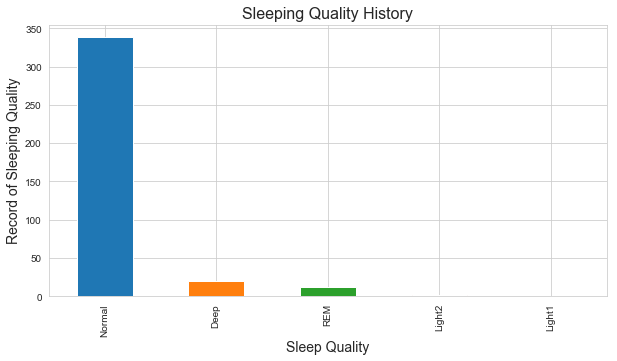

In [53]:
fig=plt.figure(figsize=(10,5));
sl_df.groupby(['quality'])['time_in_bed'].count().sort_values(ascending=False).plot(kind='bar')
plt.title("Sleeping Quality History", fontsize=16)
plt.xlabel("Sleep Quality", fontsize=14)
plt.ylabel("Record of Sleeping Quality", fontsize=14)
ax.tick_params(labelsize=14)

In [54]:
print(sl_df.groupby(['quality'])['time_in_bed'].count().sort_values(ascending=False))

quality
Normal    338
Deep       20
REM        12
Light2      2
Light1      1
Name: time_in_bed, dtype: int64


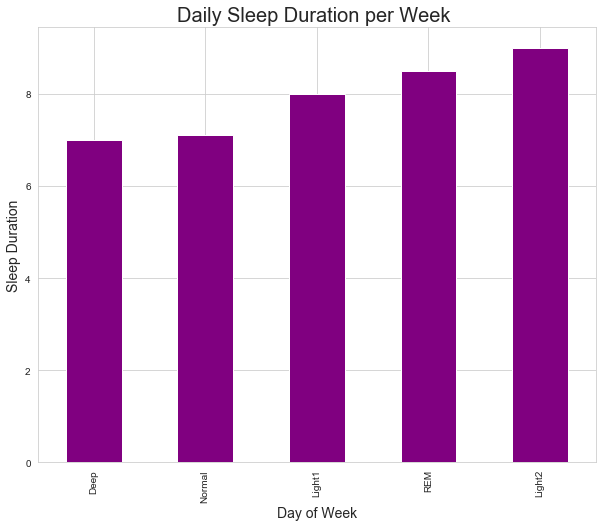

In [55]:
fig = plt.figure(figsize=(10,8))
sl_df.groupby(['quality'])["time_in_bed"].mean().sort_values(ascending=True).plot(kind='bar',color="purple")
plt.suptitle('');
plt.xlabel("Day of Week",fontsize = 14);
plt.ylabel("Sleep Duration",fontsize = 14);
plt.title("Daily Sleep Duration per Week ",fontsize = 20);
ax.tick_params(labelsize=14)

In [56]:
print(sl_df.groupby(['quality'])["time_in_bed"].mean().sort_values(ascending=True))

quality
Deep      7.000000
Normal    7.112426
Light1    8.000000
REM       8.500000
Light2    9.000000
Name: time_in_bed, dtype: float64


In [57]:
# getting rid of decimal
sl_df['efficiency']=round(sl_df['efficiency'])

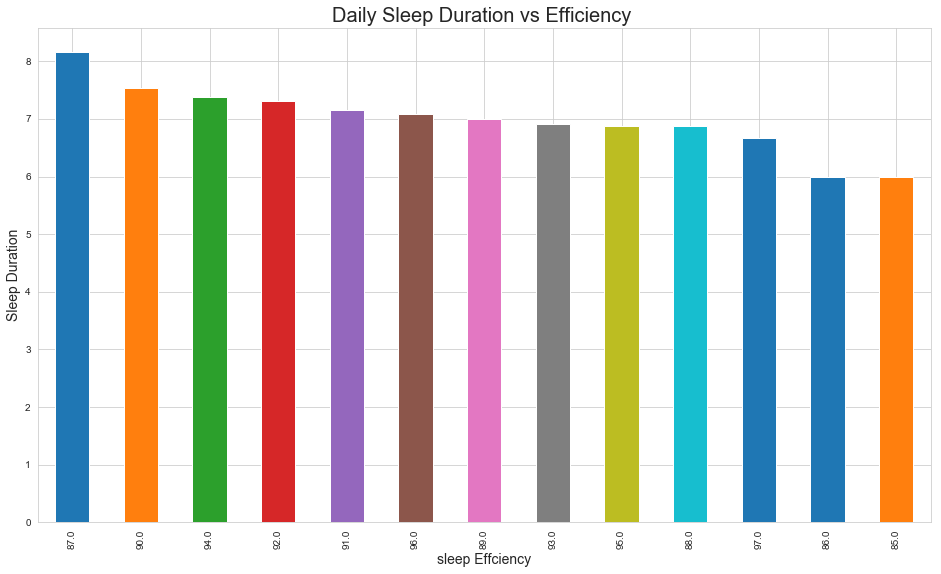

In [58]:
# sleep duration at differernt efficency 
fig = plt.figure(figsize=(16,20))
plt.subplot(2,1,1)
sl_df.groupby(['efficiency'])["time_in_bed"].mean().sort_values(ascending=False).plot(kind='bar'),
plt.xlabel("sleep Effciency",fontsize = 14);
plt.ylabel("Sleep Duration",fontsize = 14);
plt.title("Daily Sleep Duration vs Efficiency ",fontsize = 20);
ax.tick_params(labelsize=14)
plt.show();

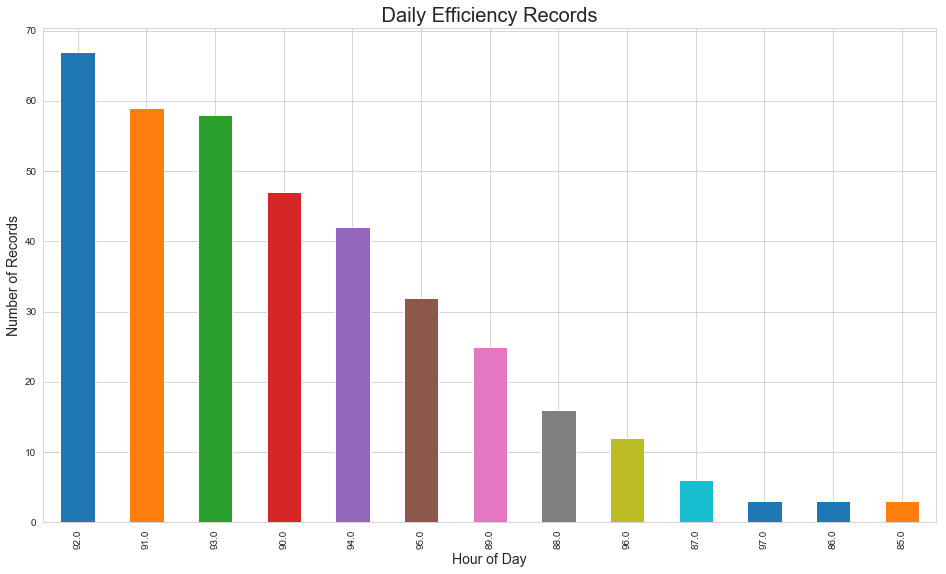

In [59]:
# number of efficiency records
fig = plt.figure(figsize=(16,20))
plt.subplot(2,1,1)
sl_df.groupby(['efficiency'])["time_in_bed"].count().sort_values(ascending=False).plot(kind='bar'),
plt.xlabel("Hour of Day",fontsize = 14);
plt.ylabel("Number of Records",fontsize = 14);
plt.title(" Daily Efficiency Records ",fontsize = 20);
ax.tick_params(labelsize=14)
plt.show();

In [60]:
# extracting only the high number of records of efficicney in order not to count those whcih has less records. Because those
# less record when come to take mean of sleep duration can give high mean of sleep duration, this is becuase of less record. 
# Therefore, we can create a dummy varible to investigate the sleep duration with efficiceny. 
aa = sl_df[~sl_df['efficiency'].isin([88.0,96.0,87.0,97.0,86.0,85.0])]

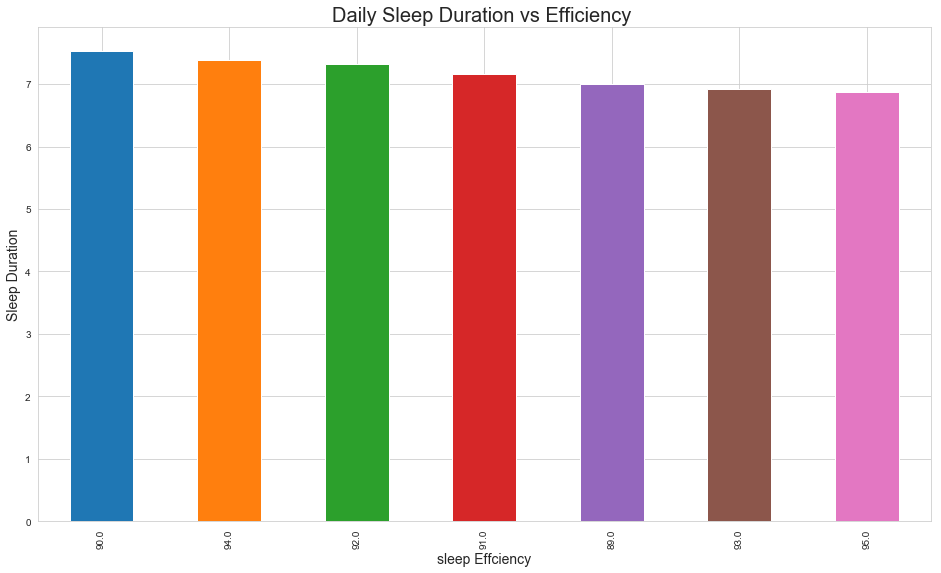

In [61]:
# plot sleep duration at different efficiceny after removing the low efficncey record
fig = plt.figure(figsize=(16,20))
plt.subplot(2,1,1)
aa.groupby(['efficiency'])["time_in_bed"].mean().sort_values(ascending=False).plot(kind='bar'),
plt.xlabel("sleep Effciency",fontsize = 14);
plt.ylabel("Sleep Duration",fontsize = 14);
plt.title("Daily Sleep Duration vs Efficiency ",fontsize = 20);
ax.tick_params(labelsize=14)
plt.show();

In [62]:
# print record of efficicent mean at sleep duration
print(aa.groupby(['efficiency'])["time_in_bed"].mean())

efficiency
89.0    7.000000
90.0    7.531915
91.0    7.152542
92.0    7.313433
93.0    6.913793
94.0    7.380952
95.0    6.875000
Name: time_in_bed, dtype: float64


# 2. Exercise Data 

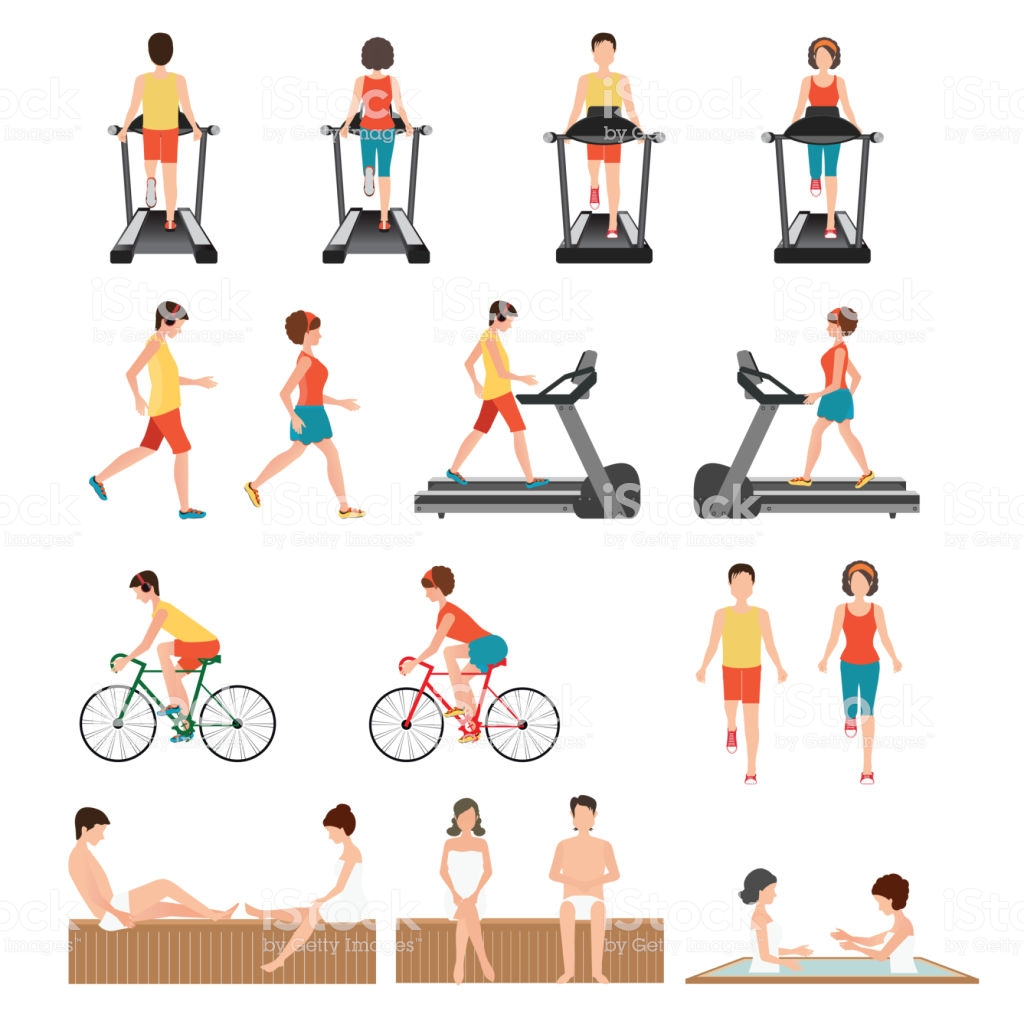

## 2.1 Data Cleaning

 In this section, a deep look is needed to analyze the data, but first, we have to make sure that, our data is clean and well orgnized. To do so, the following steps were considered: 
 
 1. Plotting a bar chart for NaN percentage at every column, where it will give us some glance which columns are have almost 100% NaN or missing value. 
 
 2. Plotting again the heat map to show NaN and Missing values of exercise data. 
 
 3. Dropping 100% NaN columns based on heat map, and NaN percentage bar chart. 
 
 4. Calculate the Duration of exercise and store it in new column named Duration
 
 5. Creating a new column "date" in exercise data from start column that continas only the date without time. Drop the start and end columns as they will be needed in the analysis since we have the time duration.  
 
 6.  Creating a new column "Weekday" which will contain the day of the respective date provided in the exercise data. 
 
 7. Classify the days into weekday and weekend and create a new column named "Week_Class". 
 
 8. Classify the exercise number into exercise type and creating a new column names "Exercise Type". 
 
 9. Dropping unrelated columns from the exercise data, as I will not need them for the analysis. 
 
 10. Remove outliers in the duration column as those might be due to wrong reading or the participant switched off the device and forgot to turn it on for long time. 
 
 11. Remove Casual Walks. 

In [63]:
# reading the data
ex_df = pd.read_csv("exercise.csv",encoding = "utf-8",index_col=0)

In [64]:
ex_df.head()

end_time  altitude_loss  max_altitude  \
0  2018-04-07 21:40:40.673            NaN           NaN   
1  2018-01-27 15:08:00.000            NaN           NaN   
2  2018-09-04 01:35:14.221            NaN           NaN   
3  2018-09-12 01:33:53.262            NaN           NaN   
4  2018-05-01 22:12:20.915            NaN           NaN   

                start_time  count  altitude_gain  exercise_custom_type  \
0  2018-04-07 21:26:10.149    NaN            NaN                   NaN   
1  2018-01-27 14:38:00.000    0.0            NaN                   NaN   
2  2018-09-04 01:23:23.355    NaN            NaN                   NaN   
3  2018-09-12 01:21:34.461    NaN            NaN                   NaN   
4  2018-05-01 22:01:24.059    NaN            NaN                   NaN   

   duration  deviceuuid  max_heart_rate           ...             count_type  \
0    870524  F/D7+hL5E5             0.0           ...                    NaN   
1   1800000  jQfnryI8/B             NaN           ...                30004.0   
2    710866  F/D7+hL5E5             0.0           ...                    NaN   
3    738801  F/D7+hL5E5             0.0           ...                    NaN   
4    656856  F/D7+hL5E5             0.0           ...                    NaN   

                                           live_data max_caloricburn_rate  \
0  009c4899-f8fb-c887-294a-045dcce7c880.live_data...                  NaN   
1                                                NaN                  NaN   
2  019f38b0-adea-a157-dd7d-07af53a3ad0b.live_data...                  NaN   
3  01d238fd-1111-a35d-ee11-1859abc1c8a9.live_data...                  NaN   
4  020502c3-3cc7-8d33-f7bc-2d8e27609a47.live_data...                  NaN   

   custom comment  additional  distance  \
0     NaN     NaN         NaN   1008.61   
1     NaN     NaN         NaN      0.00   
2     NaN     NaN         NaN    997.50   
3     NaN     NaN         NaN    780.37   
4     NaN     NaN         NaN    765.12   

                                       location_data  \
0  009c4899-f8fb-c887-294a-045dcce7c880.location_...   
1                                                NaN   
2  019f38b0-adea-a157-dd7d-07af53a3ad0b.location_...   
3  01d238fd-1111-a35d-ee11-1859abc1c8a9.location_...   
4  020502c3-3cc7-8d33-f7bc-2d8e27609a47.location_...   

                               datauuid              create_time  
0  009c4899-f8fb-c887-294a-045dcce7c880  2018-04-07 21:41:42.416  
1  013f807f-0b24-45da-9df7-446c2e297a4f  2018-01-27 15:08:40.225  
2  019f38b0-adea-a157-dd7d-07af53a3ad0b  2018-09-04 01:36:15.337  
3  01d238fd-1111-a35d-ee11-1859abc1c8a9  2018-09-12 01:34:54.418  
4  020502c3-3cc7-8d33-f7bc-2d8e27609a47  2018-05-01 22:13:21.374  

[5 rows x 39 columns]

In [65]:
# display the information of data
ex_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876 entries, 0 to 875
Data columns (total 39 columns):
end_time                 876 non-null object
altitude_loss            8 non-null float64
max_altitude             24 non-null float64
start_time               876 non-null object
count                    87 non-null float64
altitude_gain            8 non-null float64
exercise_custom_type     0 non-null float64
duration                 876 non-null int64
deviceuuid               876 non-null object
max_heart_rate           555 non-null float64
max_rpm                  0 non-null float64
mean_heart_rate          555 non-null float64
pkg_name                 876 non-null object
max_cadence              556 non-null float64
time_offset              876 non-null object
mean_caloricburn_rate    0 non-null float64
incline_distance         125 non-null float64
exercise_type            876 non-null int64
decline_distance         125 non-null float64
max_speed                663 non-null floa

In [66]:
# display the shape of data
ex_df.shape

(876, 39)

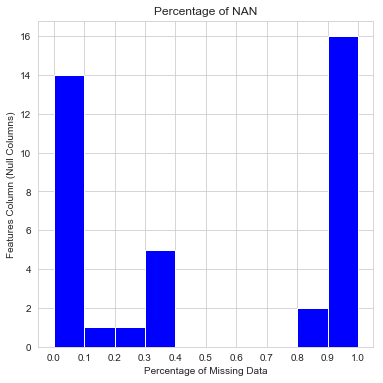

In [67]:
#plotting the percentage of missing value in each column (feature) to % of null columns 
NaN_Percentage = ex_df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='blue')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

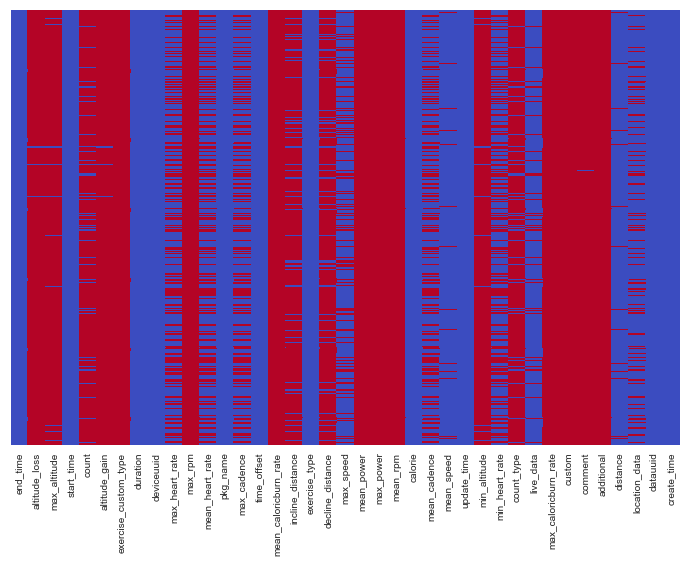

In [68]:
#plotting heat map to check null values 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(ex_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

In [69]:
print(NaN_Percentage)

end_time                 0.000000
update_time              0.000000
calorie                  0.000000
datauuid                 0.000000
exercise_type            0.000000
time_offset              0.000000
pkg_name                 0.000000
deviceuuid               0.000000
create_time              0.000000
duration                 0.000000
start_time               0.000000
distance                 0.034247
mean_speed               0.034247
live_data                0.094749
location_data            0.190639
max_speed                0.243151
max_cadence              0.365297
mean_cadence             0.365297
min_heart_rate           0.366438
max_heart_rate           0.366438
mean_heart_rate          0.366438
decline_distance         0.857306
incline_distance         0.857306
count_type               0.900685
count                    0.900685
min_altitude             0.972603
max_altitude             0.972603
altitude_gain            0.990868
altitude_loss            0.990868
comment       

In [70]:
# dropping unnecessary columns
drop_col = ['mean_rpm','max_caloricburn_rate','max_rpm','mean_caloricburn_rate','mean_power','max_power','exercise_custom_type','custom',
           'additional','comment','altitude_loss','altitude_gain','min_altitude','max_altitude','count','count_type','decline_distance',
           'incline_distance','pkg_name','deviceuuid','live_data','datauuid','location_data']
ex_df.drop(drop_col, axis = 1, inplace = True)

In [71]:
# create a column for duration of exercise
ex_df["Duration"]=pd.to_datetime(ex_df["end_time"])- pd.to_datetime(ex_df["start_time"])

In [72]:
# converting the duration into time in minutes with decimals
ex_df['Duration'] = ex_df['Duration']/np.timedelta64(1,'m')

In [73]:
# Converting end date-time into only date in year,month, day
ex_df['Date'] = pd.to_datetime(ex_df['end_time'])
ex_df['Date'] =ex_df['Date'].apply(lambda x: x.date() )
ex_df['Date'] = ex_df.Date.sort_values()
ex_df.head()

end_time               start_time  duration  max_heart_rate  \
0  2018-04-07 21:40:40.673  2018-04-07 21:26:10.149    870524             0.0   
1  2018-01-27 15:08:00.000  2018-01-27 14:38:00.000   1800000             NaN   
2  2018-09-04 01:35:14.221  2018-09-04 01:23:23.355    710866             0.0   
3  2018-09-12 01:33:53.262  2018-09-12 01:21:34.461    738801             0.0   
4  2018-05-01 22:12:20.915  2018-05-01 22:01:24.059    656856             0.0   

   mean_heart_rate  max_cadence time_offset  exercise_type  max_speed  \
0              0.0          0.0    UTC-0400           1001   1.588526   
1              NaN          NaN    UTC-0500          14001        NaN   
2              0.0          0.0    UTC-0400           1001   1.500000   
3              0.0          0.0    UTC-0400           1001   1.416667   
4              0.0          0.0    UTC-0400           1001   1.571783   

   calorie  mean_cadence  mean_speed              update_time  min_heart_rate  \
0    58.42           0.0    1.257754  2018-04-07 21:41:42.416             0.0   
1   252.00           NaN    0.000000  2018-01-27 15:09:23.176             NaN   
2    55.49           0.0    1.395675  2018-09-04 01:36:15.337             0.0   
3    44.96           0.0    1.258918  2018-09-12 01:34:54.418             0.0   
4    43.85           0.0    1.323111  2018-05-01 22:13:21.374             0.0   

   distance              create_time   Duration        Date  
0   1008.61  2018-04-07 21:41:42.416  14.508733  2018-04-07  
1      0.00  2018-01-27 15:08:40.225  30.000000  2018-01-27  
2    997.50  2018-09-04 01:36:15.337  11.847767  2018-09-04  
3    780.37  2018-09-12 01:34:54.418  12.313350  2018-09-12  
4    765.12  2018-05-01 22:13:21.374  10.947600  2018-05-01

In [74]:
# converting the start time date 
ex_df["start_time"]=pd.to_datetime(ex_df["start_time"])
ex_df["start_time"]=ex_df["start_time"].apply(lambda x: x.time())

In [75]:
#Adjust the obtained hours into integer for the purpose of visulaization of start sleeping hours
Times_ex = pd.DataFrame()
time_lists_ex=[]
times_ex=[]
for i in ex_df["start_time"]:
    time_lists_ex.append(i.strftime("%H"))
for j in time_lists_ex:
    times_ex.append(int(j))   
Times_ex = Times_ex.append(times_ex)
ex_df["start_time"] = Times_ex 

In [76]:
# arrange date based on end time of acticitie
ex_df = ex_df.sort_values('end_time', ascending = True)

In [77]:
ex_df.drop(['end_time','update_time','create_time'], axis = 1, inplace = True)

In [78]:
# Creating a weekday column from given date for purpose of visulaization & calssification
weekday = pd.DataFrame()
daylist_ex =[]
for i in ex_df['Date']:
    daylist_ex.append(i.strftime('%a'))
weekday = weekday.append(daylist_ex)
ex_df['weekday'] = weekday

In [79]:
#Defining lists for each weekday classification with mentioned day
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thu','Fri']


def getday(day):
    if day in weekend:
        return "weekend"
    elif day in weekday:
        return "weekday"
    else:
        return "Other"
# adding week_Class column to sleeping data frame for purpose on analysis below    
ex_df['week_Class'] = ex_df["weekday"].apply(lambda x: getday(x))

In [80]:
# convert the exercise tyoe into str for easiness of mapping code with name of exercise below
ex_df["exercise_type"]=ex_df["exercise_type"].astype(str)

In [81]:
#Defining lists for each weekday classification with mentioned day
custom_ex = ['0']
walking_ex = ['1001']
running_ex = ['1002']
cycling_ex = ['11007']
hiking_ex = ['13001']
swimming_ex = ['14001']
eliptical_ex = ['15006']


def getexer(exercise):
    if exercise in walking_ex:
        return "walking"
    elif exercise in custom_ex:
        return "Custom type"
    elif exercise in running_ex:
        return "running"
    elif exercise in cycling_ex:
        return "cycling"
    elif exercise in hiking_ex:
        return "hiking"
    elif exercise in swimming_ex:
        return "swimming"
    elif exercise in eliptical_ex:
        return "eliptical"
    else:
        return "Other"
# adding week_Class column to sleeping data frame for purpose on analysis below    
ex_df['exercise_type'] = ex_df['exercise_type'].apply(lambda x: getexer(x))

In [82]:
ex_df.head()

start_time  duration  max_heart_rate  mean_heart_rate  max_cadence  \
667          14    329211             NaN              NaN          NaN   
278          22    996676             NaN              NaN          NaN   
776           0   2457643             NaN              NaN          NaN   
555           1   1946000             NaN              NaN          NaN   
312          15   1018602             NaN              NaN    170.51129   

    time_offset exercise_type  max_speed  calorie  mean_cadence  mean_speed  \
667    UTC-0700       running   2.492401     66.0           NaN    2.492401   
278    UTC-0700        hiking   1.684247    105.0           NaN    0.920603   
776    UTC-0700       running   3.024856    408.0           NaN    2.000407   
555    UTC-0700       running   4.415482    459.0           NaN    0.000000   
312    UTC-0500       running   3.082483    230.0     159.55493    2.899804   

     min_heart_rate  distance    Duration        Date weekday week_Class  
667             NaN     820.0    5.502083  2016-06-25     Tue    weekday  
278             NaN     910.0   50.942700  2016-09-24     Mon    weekday  
776             NaN    4910.0   42.378850  2016-09-28     Tue    weekday  
555             NaN    5510.0  132.238800  2016-10-01     Thu    weekday  
312             NaN    2950.0   17.217917  2017-03-06     Sun    weekend

In [83]:
# round the duration for easines of plotting
ex_df["Duration"] = round(ex_df['Duration'])

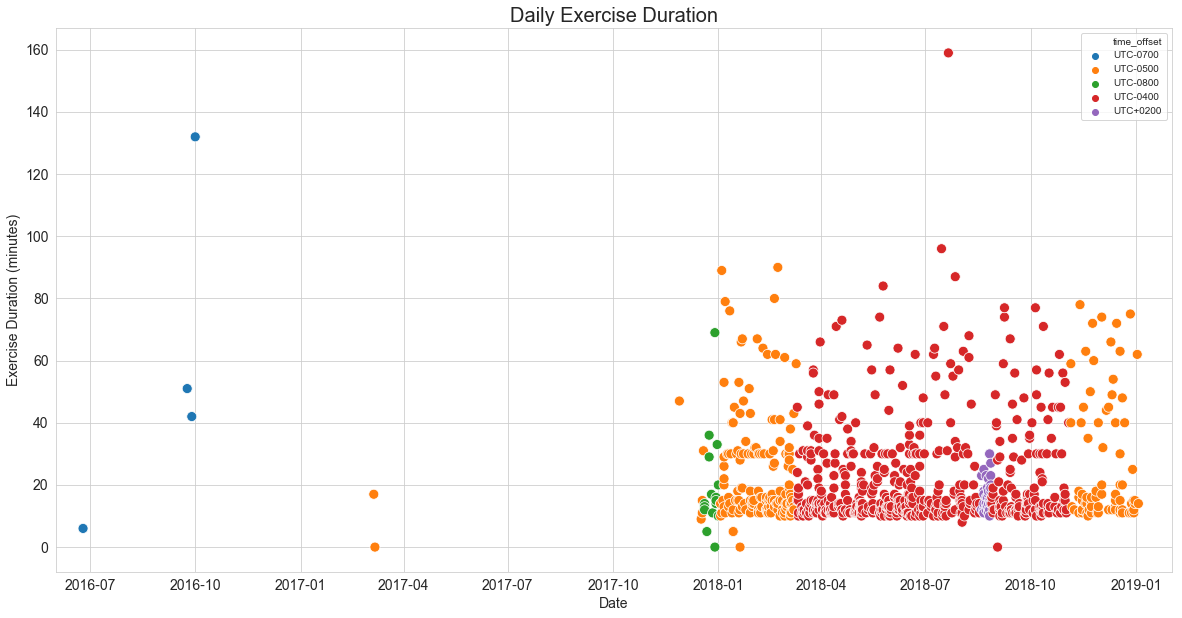

In [84]:
# plotting scatter plot for the purpose of visualizing the data
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="Duration", hue="time_offset", s=100,
                      data=ex_df)
ax.set(xlim=("2016-06","2019-2"))
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

C:\Users\Mohammed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


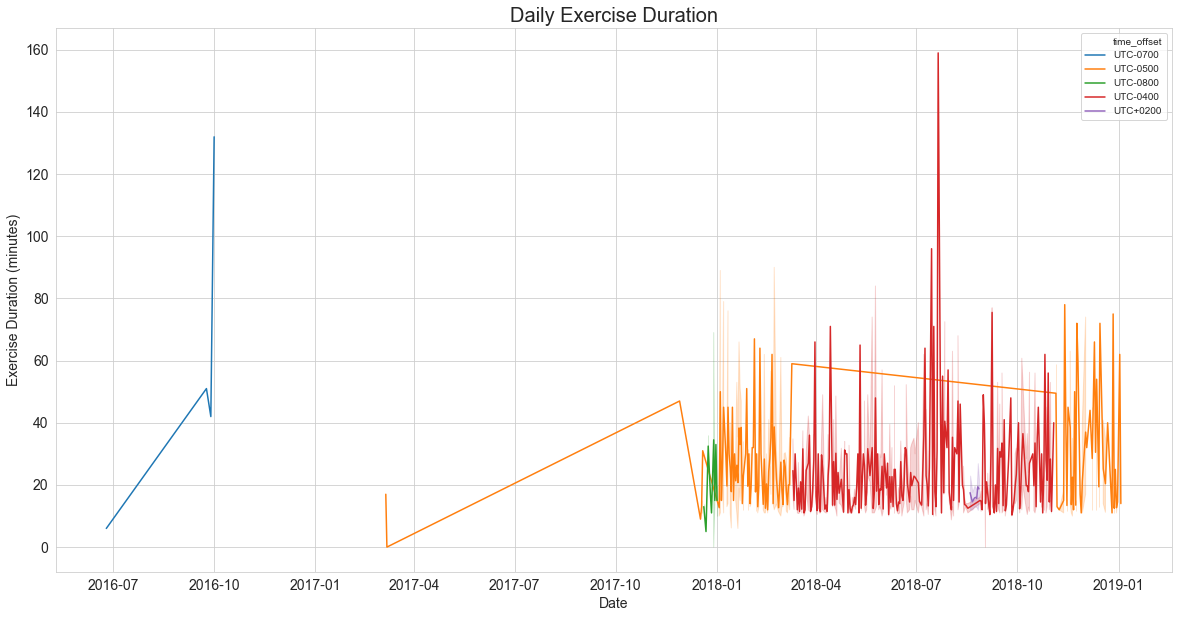

In [85]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y='Duration', hue="time_offset",
                    data=ex_df)
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

Hmmmm! looks like we have outliers due to sensor reading or the participant switch the device off and forgot to retunr it back. Therefore, we have to remove these outliers to avoid skewness in the data. 

In [86]:
# display the data to spot these outliers,
ex_df.head(15)

start_time  duration  max_heart_rate  mean_heart_rate  max_cadence  \
667          14    329211             NaN              NaN          NaN   
278          22    996676             NaN              NaN          NaN   
776           0   2457643             NaN              NaN          NaN   
555           1   1946000             NaN              NaN          NaN   
312          15   1018602             NaN              NaN    170.51129   
376          14      8011             NaN              NaN          NaN   
506          21   2515029             NaN              NaN          NaN   
798          21    521456             0.0              0.0      0.00000   
460          13    646624             0.0              0.0      0.00000   
156          21    894319             0.0              0.0      0.00000   
631          20   1816330           182.0            126.0      0.00000   
547          20    839654             0.0              0.0      0.00000   
737          21    763763             0.0              0.0      0.00000   
807          21    692347             0.0              0.0      0.00000   
254           0    312012           129.0            118.0      0.00000   

    time_offset exercise_type  max_speed  calorie  mean_cadence  mean_speed  \
667    UTC-0700       running   2.492401   66.000           NaN    2.492401   
278    UTC-0700        hiking   1.684247  105.000           NaN    0.920603   
776    UTC-0700       running   3.024856  408.000           NaN    2.000407   
555    UTC-0700       running   4.415482  459.000           NaN    0.000000   
312    UTC-0500       running   3.082483  230.000     159.55493    2.899804   
376    UTC-0500       cycling  26.228920    1.000           NaN   10.714286   
506    UTC-0500       walking   1.727394  246.000           NaN    1.499006   
798    UTC-0500     eliptical        NaN   60.836       0.00000         NaN   
460    UTC-0500       walking   1.555556   55.520       0.00000    1.398875   
156    UTC-0500       walking   1.588393   58.150       0.00000    1.390914   
631    UTC-0500   Custom type        NaN  160.901       0.00000    0.000000   
547    UTC-0800       walking   1.332194   50.770       0.00000    1.114794   
737    UTC-0800       walking   1.694444   47.970       0.00000    1.241217   
807    UTC-0800       walking   1.333333   41.660       0.00000    1.060065   
254    UTC-0800   Custom type        NaN   27.645       0.00000    0.000000   

     min_heart_rate  distance  Duration        Date weekday week_Class  
667             NaN   820.000       6.0  2016-06-25     Tue    weekday  
278             NaN   910.000      51.0  2016-09-24     Mon    weekday  
776             NaN  4910.000      42.0  2016-09-28     Tue    weekday  
555             NaN  5510.000     132.0  2016-10-01     Thu    weekday  
312             NaN  2950.000      17.0  2017-03-06     Sun    weekend  
376             NaN    70.000       0.0  2017-03-07     Tue    weekday  
506             NaN  3770.000      47.0  2017-11-28     Tue    weekday  
798             0.0       NaN       9.0  2017-12-17     Mon    weekday  
460             0.0   782.230      11.0  2017-12-18     Wed    weekday  
156             0.0   901.920      15.0  2017-12-18     Thu    weekday  
631            67.0     0.000      31.0  2017-12-19     Sat    weekend  
547             0.0   820.900      14.0  2017-12-20     Wed    weekday  
737             0.0   724.241      13.0  2017-12-20     Fri    weekday  
807             0.0   660.299      12.0  2017-12-20     Thu    weekday  
254            97.0     0.000       5.0  2017-12-22     Sat    weekend

Outliers appear to be in the first 6 rows, therofre, they  will be removed

In [87]:
# removing outliers
ex_df.drop(ex_df.head(6).index, inplace =True)

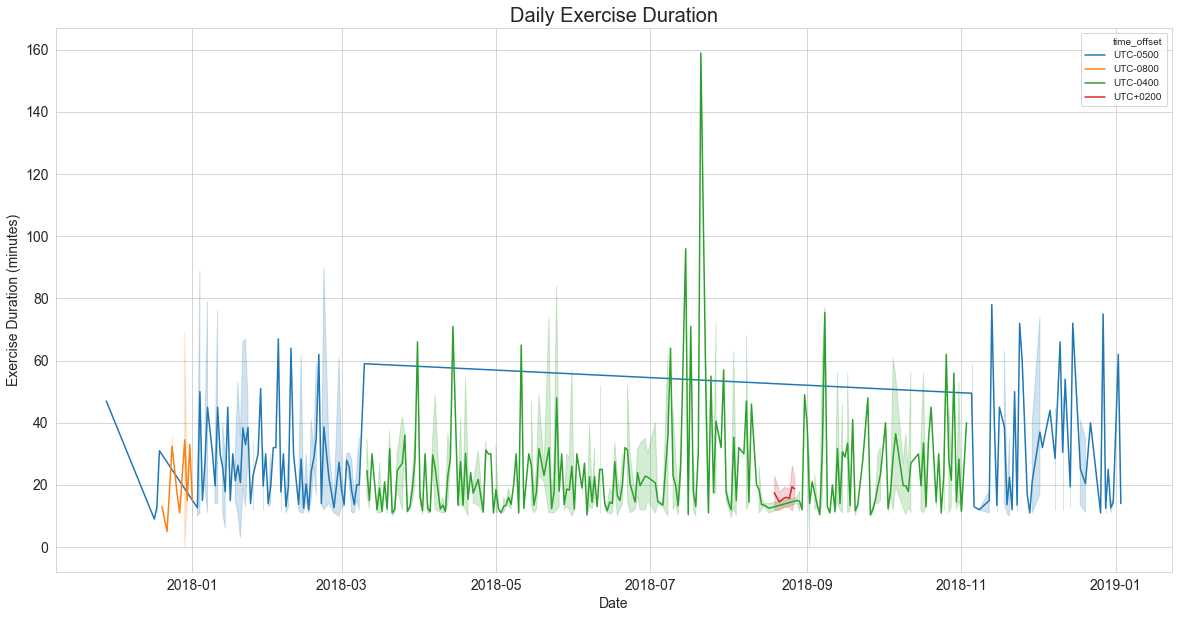

In [88]:
# replot after removing outliers
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y='Duration', hue="time_offset",
                    data=ex_df)
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

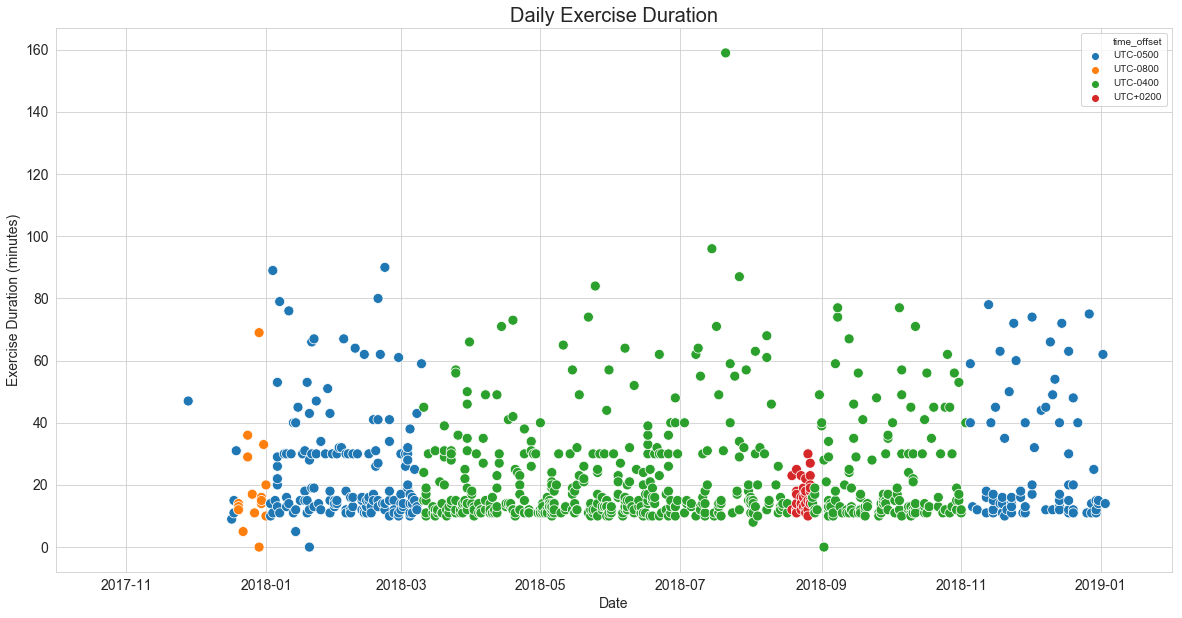

In [89]:
# replot after removing outliers
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="Duration", hue="time_offset", s=100,
                      data=ex_df)
ax.set(xlim=("2017-10","2019-2"))
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

In [90]:
# displaying the time offset 
ex_df['time_offset'].unique()

array(['UTC-0500', 'UTC-0800', 'UTC-0400', 'UTC+0200'], dtype=object)

#### Note: Since the UTC time zone are same as the ones done above for sleeping data, same assumption will use here. Thefore, we can say that the participant is keeping his same habits of working out even he/she travels abroad. 

### Removing Casual Walk
The following assumptions and steps are considred to remove casual walk: 

1. Before performaing the process removing casual walk, we have to come up with a decision based on some deep investiagtion then remove the casual walk. To begin with, a dummay varible (a) was created to extract data with only walking exercise. 

2. Create another dummy varible (b) which only contains the following: Duration,exercise_type,mean_speed,distance,calorie. Those columns will help to make the criteria required to remove casual walk. 

3. Dispaly the dummay varible (b) statistics describtion and plot mean speed against distanc and exercise duration help to determine casual walk. 

**Criteria of Removing Casual Walk:** 


if:  
       1. walking mean speed less than 1.2 (which is less than actual mean 1.34), and
       2. walking distance greater than 2000 meter (which is greater than actual mean distance 1110 meter), and 
       3. walking duration greater than 30 minutes ( which is greater than actual mean duration 16.5 minutes)
casual walk removed! 

In [91]:
# create a dummy varible to investigate into data the contains the walking exercise
a=ex_df[ex_df['exercise_type']=="walking"]

In [92]:
a.head()

start_time  duration  max_heart_rate  mean_heart_rate  max_cadence  \
506          21   2515029             NaN              NaN          NaN   
460          13    646624             0.0              0.0          0.0   
156          21    894319             0.0              0.0          0.0   
547          20    839654             0.0              0.0          0.0   
737          21    763763             0.0              0.0          0.0   

    time_offset exercise_type  max_speed  calorie  mean_cadence  mean_speed  \
506    UTC-0500       walking   1.727394   246.00           NaN    1.499006   
460    UTC-0500       walking   1.555556    55.52           0.0    1.398875   
156    UTC-0500       walking   1.588393    58.15           0.0    1.390914   
547    UTC-0800       walking   1.332194    50.77           0.0    1.114794   
737    UTC-0800       walking   1.694444    47.97           0.0    1.241217   

     min_heart_rate  distance  Duration        Date weekday week_Class  
506             NaN  3770.000      47.0  2017-11-28     Tue    weekday  
460             0.0   782.230      11.0  2017-12-18     Wed    weekday  
156             0.0   901.920      15.0  2017-12-18     Thu    weekday  
547             0.0   820.900      14.0  2017-12-20     Wed    weekday  
737             0.0   724.241      13.0  2017-12-20     Fri    weekday

In [93]:
# check the null values while we onyl focusing on the walking activity
a.isnull().mean().sort_values(ascending=True)

start_time         0.000000
Date               0.000000
Duration           0.000000
distance           0.000000
mean_speed         0.000000
weekday            0.000000
calorie            0.000000
time_offset        0.000000
duration           0.000000
exercise_type      0.000000
week_Class         0.000000
max_speed          0.004695
mean_cadence       0.366197
max_cadence        0.366197
min_heart_rate     0.366197
mean_heart_rate    0.366197
max_heart_rate     0.366197
dtype: float64

In [94]:
# dropping those nan value in that columns 'max_heart_rate', 'mean_heart_rate', 'min_heart_rate'
a = a.dropna(subset = ['max_heart_rate', 'mean_heart_rate', 'min_heart_rate','mean_cadence','max_speed'])

In [95]:
# create another dummy varible t
b = a[['Duration','exercise_type','mean_speed','distance','calorie']]

In [96]:
b.describe()

Duration  mean_speed     distance     calorie
count  405.000000  405.000000   405.000000  405.000000
mean    16.530864    1.345343  1110.004640   68.275521
std      8.779880    0.176950   553.625074   36.639913
min      0.000000    0.000000    24.033000    1.405000
25%     12.000000    1.225056   818.600000   48.870000
50%     14.000000    1.341288   944.179000   56.910000
75%     17.000000    1.476687  1160.650000   73.970000
max     90.000000    2.032755  6279.134000  467.891000

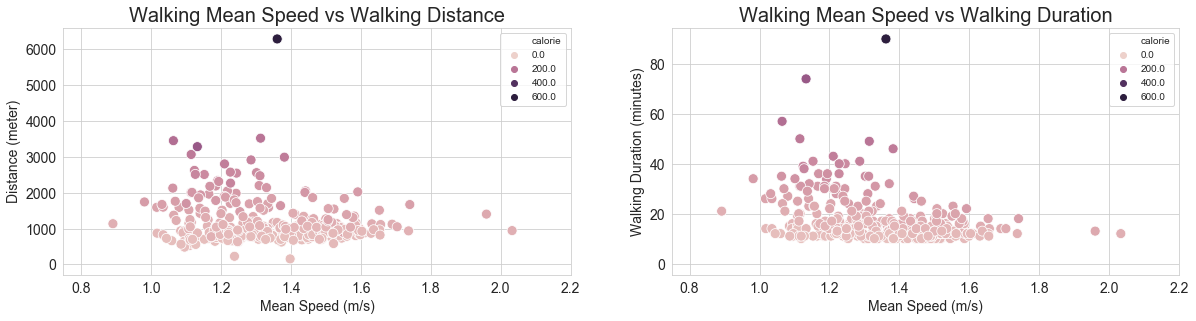

In [97]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
#fig = plt.figure(figsize=(15,15))

plt.subplot(2, 2, 1)
ax = sns.scatterplot(x="mean_speed", y="distance", hue="calorie", s=100,
                      data=b)
ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Walking Mean Speed vs Walking Distance",fontsize=20)
ax.set_xlabel("Mean Speed (m/s)",fontsize=14)
ax.set_ylabel("Distance (meter)",fontsize=14)
ax.tick_params(labelsize=14)

plt.subplot(2, 2, 2)
ax = sns.scatterplot(x="mean_speed", y="Duration", hue="calorie", s=100,
                      data=b)
ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Walking Mean Speed vs Walking Duration",fontsize=20)
ax.set_xlabel("Mean Speed (m/s)",fontsize=14)
ax.set_ylabel("Walking Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

In [98]:
ex_df.shape

(870, 17)

In [99]:
print(ex_df.groupby(['exercise_type'])["Duration"].count())

exercise_type
Custom type    115
cycling         20
eliptical        1
running         18
swimming        77
walking        639
Name: Duration, dtype: int64


In [100]:
# removing casual walk by creating a trolls of casual walk data
casual_walk = ex_df[((ex_df.exercise_type == 'walking') & (ex_df.Duration > 30)) | \
                      ((ex_df.exercise_type == 'walking') & (ex_df.mean_speed < 1.2)) | \
                      ((ex_df.exercise_type == 'walking') & (ex_df.distance > 2000)) | \
                    ((ex_df.exercise_type == 'walking') & (ex_df.distance < 600))].index
ex_df = ex_df.drop(list(casual_walk), axis=0)

In [101]:
ex_df.shape

(715, 17)

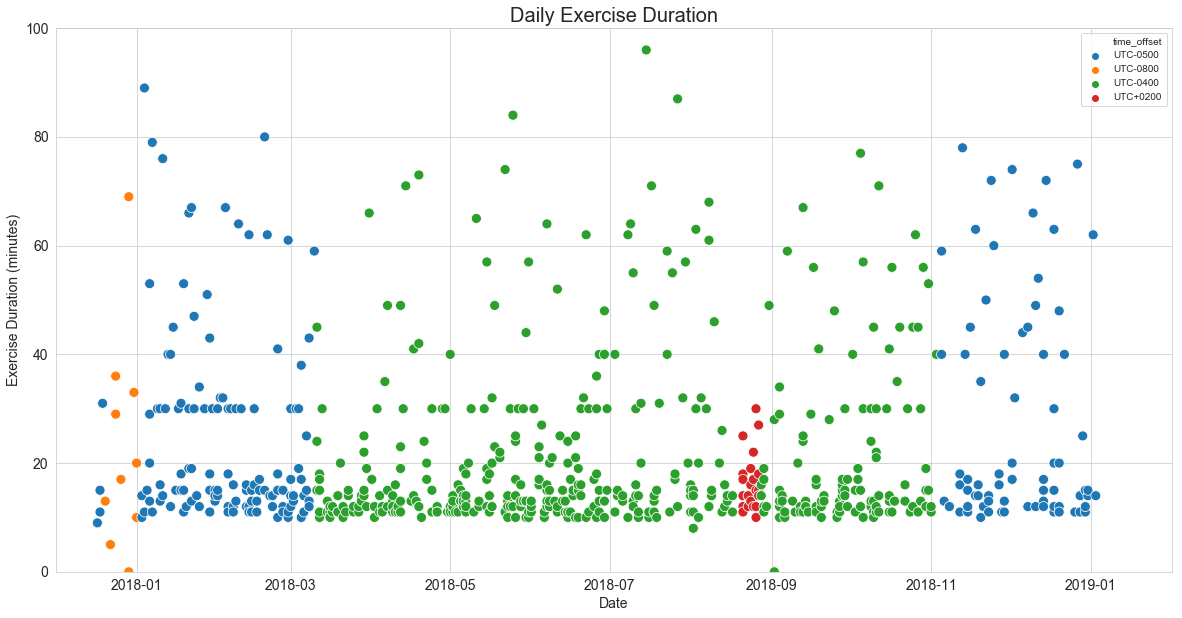

In [102]:
# replot all exercise data after removing casual walking
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="Duration", hue="time_offset", s=100,
                      data=ex_df)
ax.set(xlim=("2017-12","2019-2"))
ax.set(ylim=(0,100))
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

## 2.2 Explotatory Analysis and Visualization

From the below plots, we could find the following: 

1. After removing the casual walks, walking is still the exercise that has the highest record. I would say that device setting is not recognizing the normal walk from the walking exercise specially those with high mean speed, short duration and long distance. However, another possible explaination for high record of walking is that, the participant has a walking machine at home, and probably he/she is planning to lose weight, so he/she exercise a lot with walking machine.  

2. The eliptical exercise count is only one, and if we would take the mean of this, it will return same duration, so somehow the data will be effected. Therefore, we remove it. The average exercise duration is 48 minutes happend to be during custome exercise. The second most common exercise with high mean duration is cycling and swimming, I think my assumption that the guy is trying to loss weight is coming to be true. Cycling and Swimming are mostly recommended for those who want to burn a lot of fats. 

3. The most common hour for starting exercising is at 11 am and second most common hour is 11 pm. Basically, the start time for exercising is somehow not for normal person who has work or employee. The only way we can explain this is that this guy could be Celeibrity who is rich and having his/her work out equipment at home. The trend shown our guy do a lot of walking at home at late hours. However, for some very late hours and hours between the day, I would say that those hours are due to walking, so whever he/she walks classified as exercise. It would clear once I remove the walking from the data, and see the trend. 

4. After removing the walking from data, it can be seen again that the most common start exercise hour is 11 am. However, a trend could be spotted here. The particpant likes swimming at 11 am and noon as the weather is worm. At evening and late after noon he/she likes doing custome type and running before sleeping. The other start hours like ones in after noon, probably those are done during weekend after late wakeup from party night. 

**Conclusion:** 

- Overall exercise habit is on average. There is no solid time schdule to exercise. I would say that this a celebrity as he/she does not care about time to exercise. In this case, I would say the participant is doing his best to get habit of exercising, however, he needs to have a more orgnized work out hours to have consistence performance.



- The another alternative explaination that could match his/her wakeup hours (5 am,6 am and 7 am) is that, at 11 am or noon he/she exercise during the lunch break hour to stay active and come back to work with full energy specially swimming. At late hours before sleep he/she exercises at home with his walking/running machine and do some custome type exercises. In this case, I would say that this guy is trying to keep his health performance consistance and stay health and active. This is the most reasonable conclusion I would go with.   

Text(0, 0.5, 'Total Exercise Type Duration in Minutes')

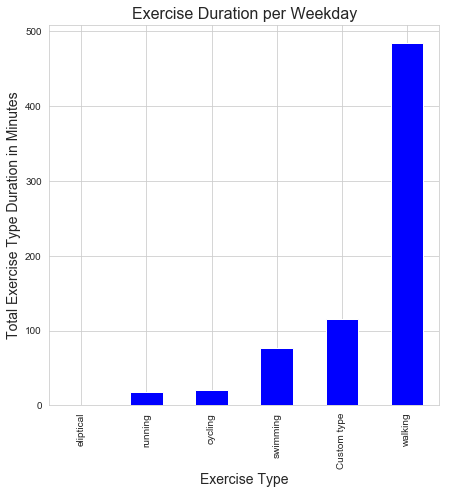

In [103]:
# plot number of records for every exercise
fig = plt.figure(figsize=(7,7))
ex_df.groupby(['exercise_type'])["Duration"].count().sort_values(ascending=True).plot(kind='bar',color='blue')
plt.title("Exercise Duration per Weekday", fontsize=16)
plt.xlabel("Exercise Type", fontsize=14)
plt.ylabel("Total Exercise Type Duration in Minutes", fontsize=14)

In [104]:
print(ex_df.groupby(['exercise_type'])["Duration"].count())

exercise_type
Custom type    115
cycling         20
eliptical        1
running         18
swimming        77
walking        484
Name: Duration, dtype: int64


In [105]:
# remove the eliptical exercise for the purpose of not affecting the mean. Eliptical exercise appeared only one time. 
# getting the index of eliptical
ind_eliptical = ex_df[ex_df['exercise_type'].apply(lambda x: x.startswith('eliptical'))].index
ex_df = ex_df.drop(ind_eliptical)

In [106]:
print(ex_df.groupby(['exercise_type'])["Duration"].count())

exercise_type
Custom type    115
cycling         20
running         18
swimming        77
walking        484
Name: Duration, dtype: int64


Great, we remove the eliptical exercise. 

Text(0, 0.5, 'Average Duration in Minutes')

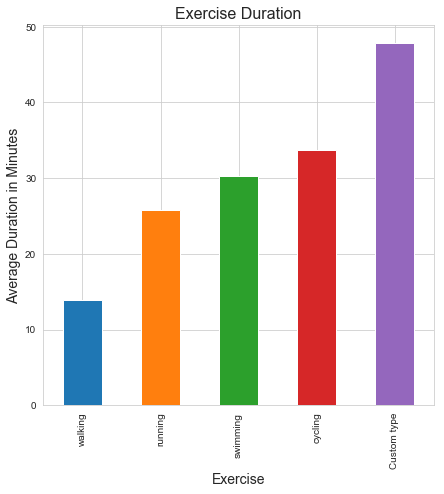

In [107]:
fig = plt.figure(figsize=(7,7))
ex_df.groupby(['exercise_type'])["Duration"].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Exercise Duration", fontsize=16)
plt.xlabel("Exercise", fontsize=14)
plt.ylabel("Average Duration in Minutes", fontsize=14)

In [108]:
order3 = ex_df['start_time'].value_counts(ascending = False).index

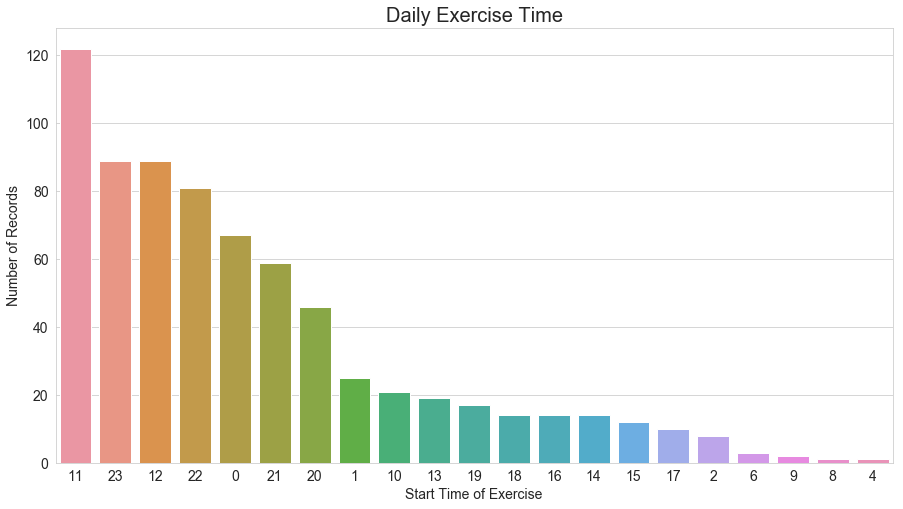

In [109]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex_df, order=order3);
ax.axes.set_title("Daily Exercise Time",fontsize=20)
ax.set_xlabel("Start Time of Exercise",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

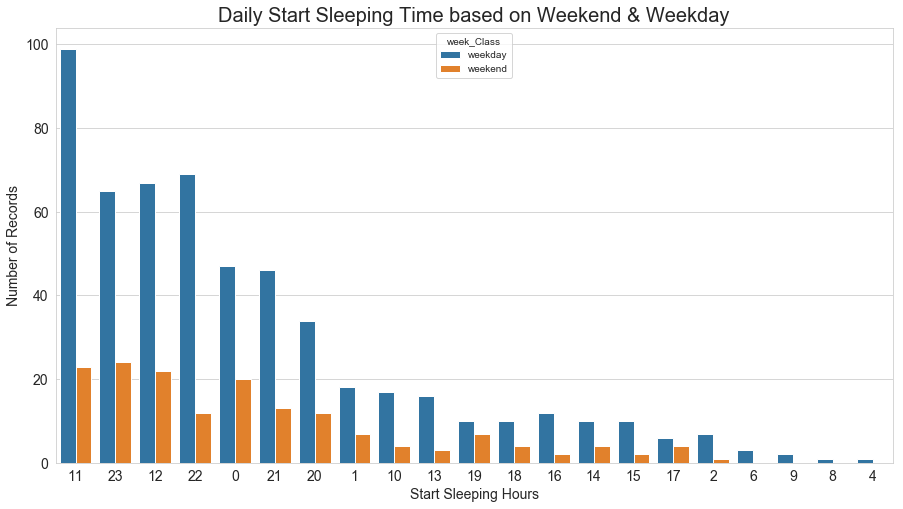

In [110]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex_df, order = order3, hue ="week_Class");
ax.axes.set_title("Daily Start Sleeping Time based on Weekend & Weekday",fontsize=20)
ax.set_xlabel("Start Sleeping Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

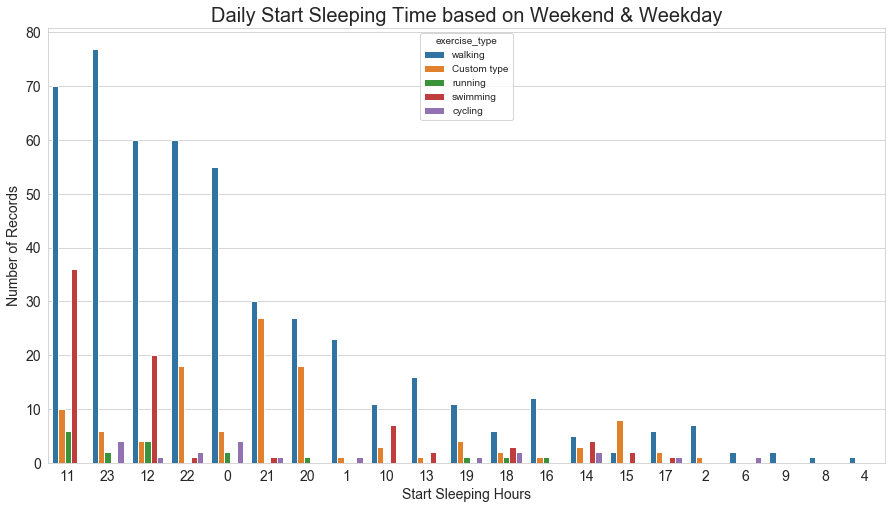

In [111]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex_df, order = order3, hue ="exercise_type");
ax.axes.set_title("Daily Start Sleeping Time based on Weekend & Weekday",fontsize=20)
ax.set_xlabel("Start Sleeping Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

In [112]:
# create a new data without walking exercise to determine workout behaviour of particpant
ex1_df = ex_df[ex_df['exercise_type'] != 'walking']

In [113]:
order4 = ex1_df['start_time'].value_counts(ascending = False).index

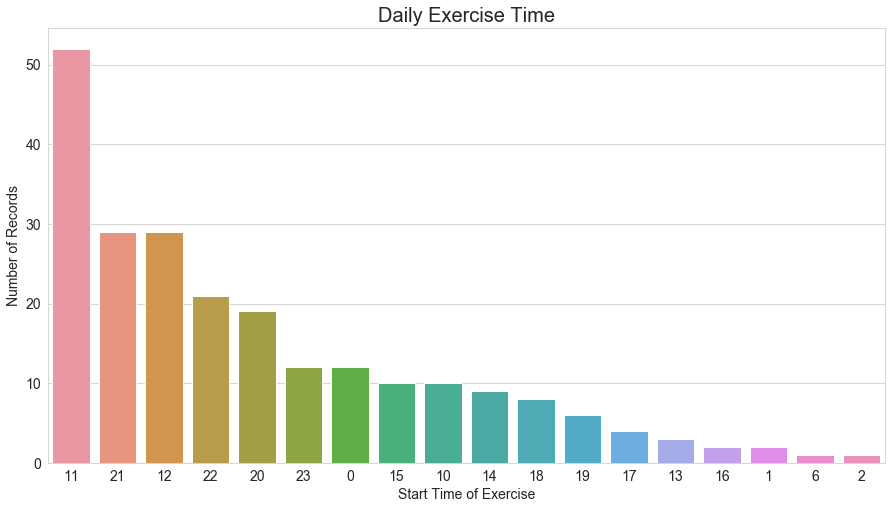

In [114]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex1_df, order=order4);
ax.axes.set_title("Daily Exercise Time",fontsize=20)
ax.set_xlabel("Start Time of Exercise",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

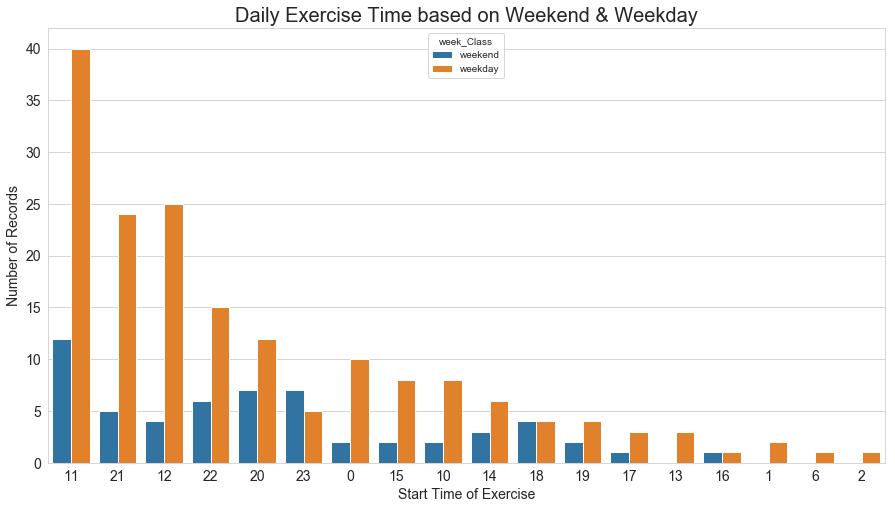

In [115]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex1_df, order = order4, hue ="week_Class");
ax.axes.set_title("Daily Exercise Time based on Weekend & Weekday",fontsize=20)
ax.set_xlabel("Start Time of Exercise",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

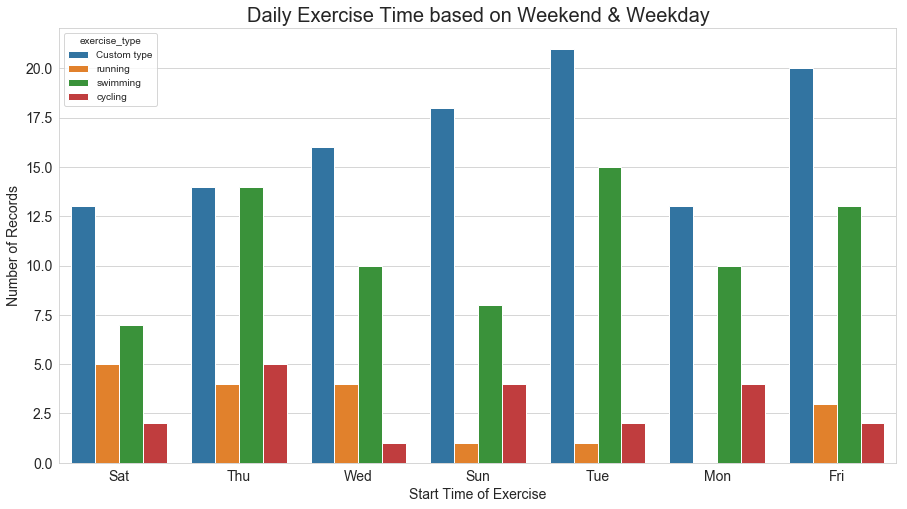

In [116]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="weekday", data=ex1_df, hue ="exercise_type");
ax.axes.set_title("Daily Exercise Time based on Weekend & Weekday",fontsize=20)
ax.set_xlabel("Start Time of Exercise",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

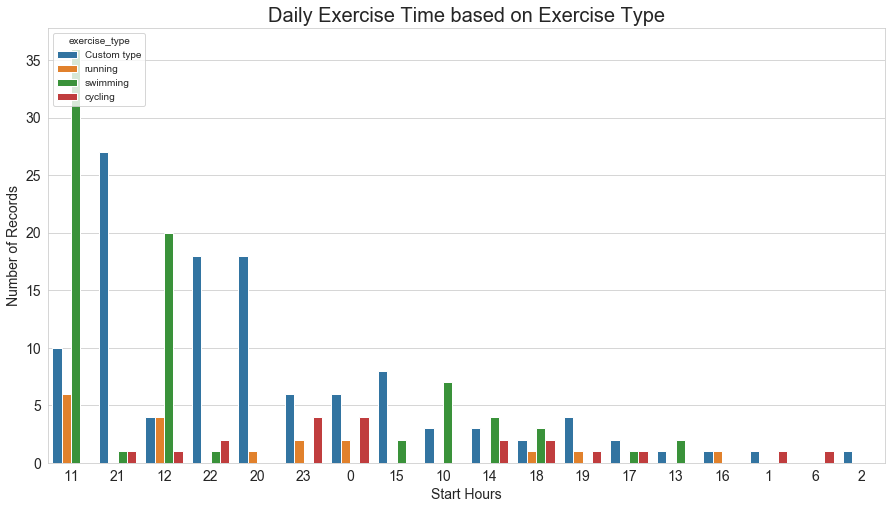

In [117]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="start_time", data=ex1_df, order = order4, hue ="exercise_type");
ax.axes.set_title("Daily Exercise Time based on Exercise Type",fontsize=20)
ax.set_xlabel("Start Hours",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

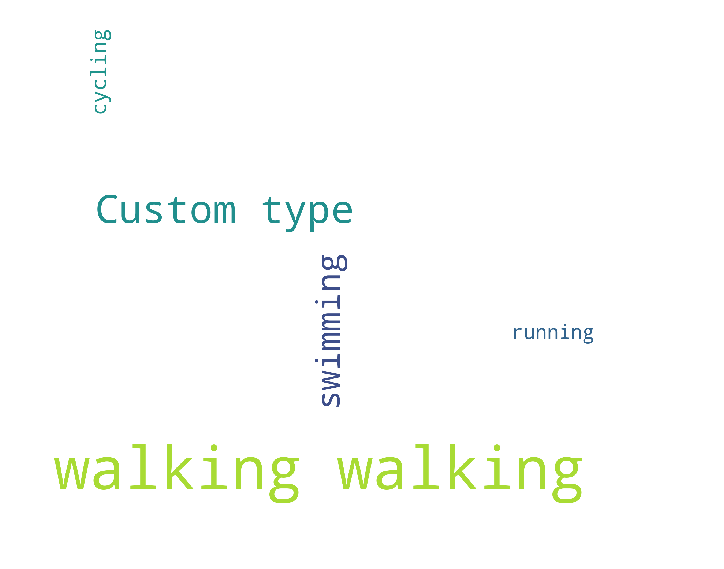

In [118]:
# World Cloud Visualaization for positive tweets of US airlines. 
ex_text = ex_df['exercise_type']


ex_words= pd.Series(ex_text).str.cat(sep=' ')

ex_wordcloud = WordCloud( background_color='white',
                      width=2500,
                      height=2000
                     ).generate(ex_words)

# Plotting word cloud
plt.figure(1,figsize=(12, 12))
plt.imshow(ex_wordcloud)
plt.axis('off')
plt.show()

# 3. Step Count

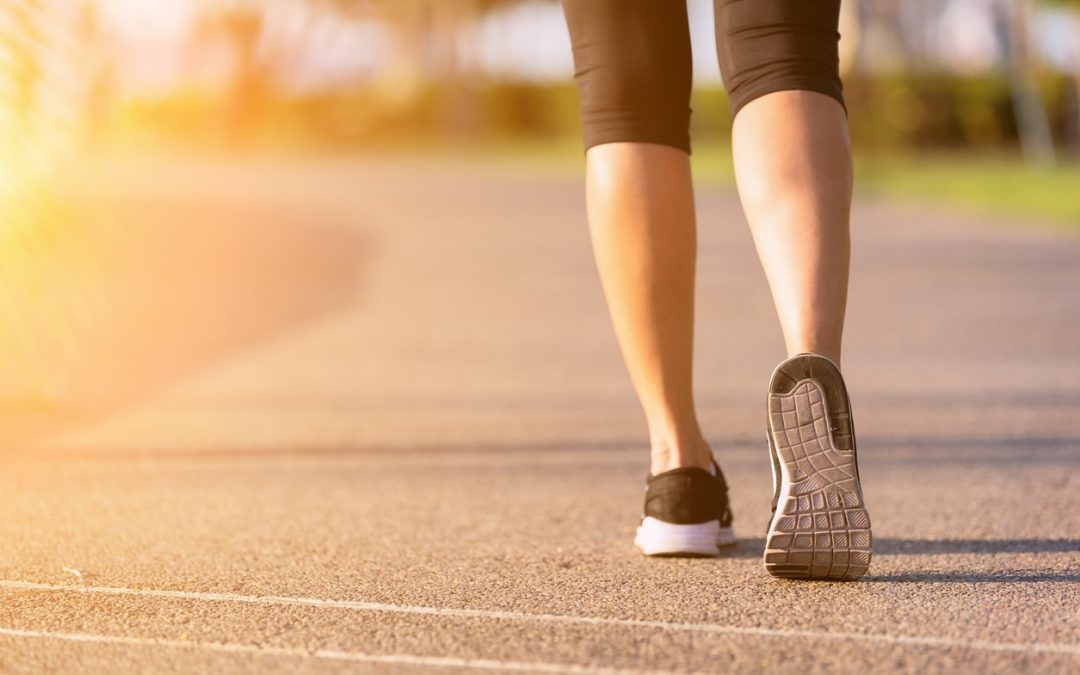

## 3.1 Data Cleaning 


In this section, a deep look is needed to analyze the data, but first, we have to make sure that, our data is clean and well orgnized. To do so, the following steps were considered: 
 
 1. Plotting a bar chart for NaN percentage at every column, where it will give us some glance which columns are have almost 100% NaN or missing value. 
 
 2. Plotting again the heat map to show NaN and Missing values of exercise data. 
 
 3. Dropping 100% NaN columns based on heat map, and NaN percentage bar chart in addition to unnecessary columns. 
 
 
     - I decided to drop the "sample_position_type" as it has only one unique entry 230002.0 which is a code indicateing the position where the deviced was placed. From Smasung documentation, 230002.0 means the device was placed in wrist postion [1]. Therfore, for simplicity, I assume that all data was gather as this guy always placed the device in his wrist.  
     
     
 
 4. Calculate the Duration of step count and store it in new column named Duration.
 
 5. Creating a new column "date" in exercise data from start column that continas only the date without time. Drop the start and end columns as they will be needed in the analysis since we have the time duration.  
 
 6.  Creating a new column "Weekday" which will contain the day of the respective date provided in the exercise data. 
 
 7. Classify the days into weekday and weekend and create a new column named "Week_Class". 
 
 8. Removing small steps based on the steps count and related distance. 
 
 9. Dropping unrelated columns from the exercise data, as I will not need them for the analysis. 
 
 
 
 
 
 **References:** 
 1. https://developer.samsung.com/onlinedocs/health/constant-values.html#com.samsung.android.sdk.healthdata.HealthConstants.StepCount.SAMPLE_POSITION_TYPE 
 

In [119]:
# read the step data
sc_df = pd.read_csv("step_count.csv",encoding = "utf-8",index_col=0)

In [120]:
# get the step data information
sc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6199 entries, 0 to 6198
Data columns (total 14 columns):
end_time                6199 non-null object
start_time              6199 non-null object
count                   6199 non-null int64
calorie                 6199 non-null float64
sample_position_type    4314 non-null float64
deviceuuid              6199 non-null object
update_time             6199 non-null object
speed                   6199 non-null float64
pkg_name                6199 non-null object
time_offset             6199 non-null object
custom                  0 non-null float64
distance                6199 non-null float64
datauuid                6199 non-null object
create_time             6199 non-null object
dtypes: float64(5), int64(1), object(8)
memory usage: 726.4+ KB


In [121]:
# get the step data shape
sc_df.shape

(6199, 14)

In [122]:
# display the data
sc_df.head()

end_time               start_time  count  calorie  \
0  2018-12-26 23:27:59.999  2018-12-26 23:27:00.000     70     3.44   
1  2018-12-08 23:12:00.000  2018-12-08 23:11:00.000      1     0.04   
2  2018-12-08 21:53:59.999  2018-12-08 21:53:00.000     30     1.25   
3  2019-01-02 13:34:00.000  2019-01-02 13:33:00.000     37     1.48   
4  2019-01-01 22:36:59.999  2019-01-01 22:36:00.000     18     0.75   

   sample_position_type  deviceuuid              update_time     speed  \
0              230002.0  F/D7+hL5E5  2018-12-26 23:35:00.296  1.833333   
1                   NaN  jQfnryI8/B  2018-12-08 23:11:00.484  1.333333   
2              230002.0  F/D7+hL5E5  2018-12-08 21:55:00.238  1.250000   
3                   NaN  jQfnryI8/B  2019-01-02 13:35:02.630  1.361111   
4              230002.0  F/D7+hL5E5  2019-01-01 22:55:00.224  1.500000   

                      pkg_name time_offset  custom  distance  \
0  com.sec.android.app.shealth    UTC-0500     NaN     60.88   
1  com.sec.android.app.shealth    UTC-0500     NaN      0.77   
2  com.sec.android.app.shealth    UTC-0500     NaN     21.25   
3  com.sec.android.app.shealth    UTC-0500     NaN     28.58   
4  com.sec.android.app.shealth    UTC-0500     NaN     12.72   

                               datauuid              create_time  
0  00083c05-4f22-1522-694a-36bd54e6f09b  2018-12-26 23:35:00.296  
1  00122feb-c1d7-497f-98ad-0c0e31e89465  2018-12-08 23:11:00.484  
2  00152c2f-41ce-c19e-67c0-264c410a6a77  2018-12-08 21:55:00.237  
3  001ac2c7-696b-4d29-b5f9-4fc4c8db4b66  2019-01-02 13:35:02.630  
4  001ba89a-82c9-2b91-359d-778bf774182d  2019-01-01 22:55:00.224

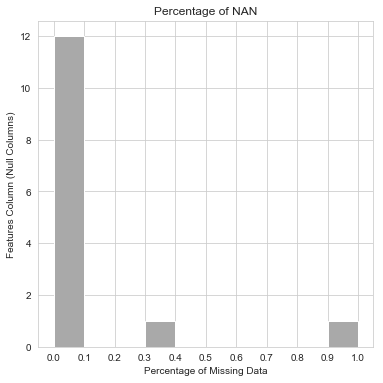

In [123]:
#plotting the percentage of missing value in each column (feature) to % of null columns 
NaN_Percentage = sc_df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='darkgrey')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

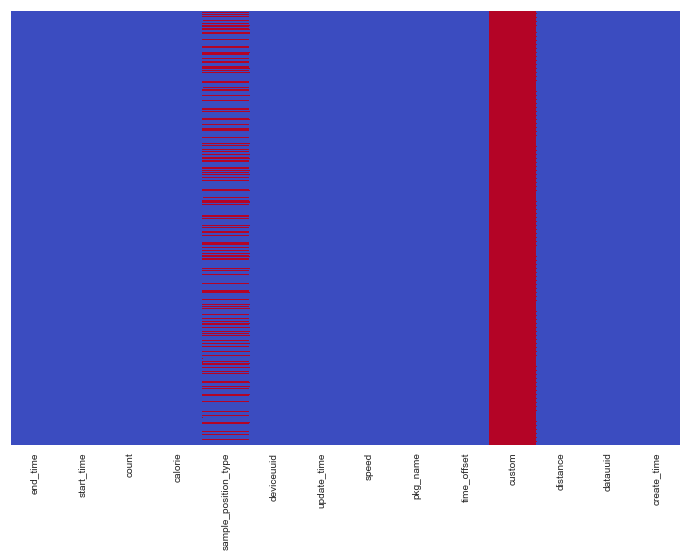

In [124]:
#Plotting missing data heat map to know clearly which columns are missing or containing NaN 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(sc_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [125]:
# Displaying the percentage of each column missing value for further investigating
print(NaN_Percentage)

end_time                0.000000
start_time              0.000000
count                   0.000000
calorie                 0.000000
deviceuuid              0.000000
update_time             0.000000
speed                   0.000000
pkg_name                0.000000
time_offset             0.000000
distance                0.000000
datauuid                0.000000
create_time             0.000000
sample_position_type    0.304081
custom                  1.000000
dtype: float64


we have one column with 100% missing value and other unnecessary columns will be dropped

In [126]:
# checking the entry of sample_position_type
sc_df['sample_position_type'].unique()

array([230002.,     nan])

In [127]:
# Dropping some unnecessary columns, please see section3.1 above explaining why I dropped "sample position type column"
drop_col = ['custom','deviceuuid','pkg_name','datauuid','sample_position_type']
sc_df.drop(drop_col, axis = 1, inplace = True)

In [128]:
# Converting Start date-time into only date in year,month, day
sc_df['Date'] = pd.to_datetime(sc_df['create_time'])
sc_df['Date'] =sc_df['Date'].apply(lambda x: x.date() )
sc_df['Date'] = sc_df.Date.sort_values()
sc_df.head()

end_time               start_time  count  calorie  \
0  2018-12-26 23:27:59.999  2018-12-26 23:27:00.000     70     3.44   
1  2018-12-08 23:12:00.000  2018-12-08 23:11:00.000      1     0.04   
2  2018-12-08 21:53:59.999  2018-12-08 21:53:00.000     30     1.25   
3  2019-01-02 13:34:00.000  2019-01-02 13:33:00.000     37     1.48   
4  2019-01-01 22:36:59.999  2019-01-01 22:36:00.000     18     0.75   

               update_time     speed time_offset  distance  \
0  2018-12-26 23:35:00.296  1.833333    UTC-0500     60.88   
1  2018-12-08 23:11:00.484  1.333333    UTC-0500      0.77   
2  2018-12-08 21:55:00.238  1.250000    UTC-0500     21.25   
3  2019-01-02 13:35:02.630  1.361111    UTC-0500     28.58   
4  2019-01-01 22:55:00.224  1.500000    UTC-0500     12.72   

               create_time        Date  
0  2018-12-26 23:35:00.296  2018-12-26  
1  2018-12-08 23:11:00.484  2018-12-08  
2  2018-12-08 21:55:00.237  2018-12-08  
3  2019-01-02 13:35:02.630  2019-01-02  
4  2019-01-01 22:55:00.224  2019-01-01

In [129]:
# create a column for duration of exercise
sc_df["duration"]=pd.to_datetime(sc_df["end_time"])- pd.to_datetime(sc_df["start_time"])

In [130]:
# function to return the day form the date entry 
def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]

In [131]:
# get the weekday
sc_df['Weekday']  = sc_df["Date"].apply(lambda datestamp: dayofweek(datestamp))

In [132]:
# converting the duration into time in minutes since Heart rate value given in beats per minute (bpm).
sc_df['duration'] = sc_df['duration']/np.timedelta64(1,'m')

In [133]:
#Defining lists for each weekday classification with mentioned day
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thur','Fri']


def getday(day):
    if day in weekend:
        return "Weekend"
    elif day in weekday:
        return "Weekday"
    else:
        return "Other"

In [134]:
# adding week_Class column to sleeping data frame for purpose on analysis below    
sc_df['Week_Class'] = sc_df["Weekday"].apply(lambda x: getday(x))

In [135]:
sc_df.head()

end_time               start_time  count  calorie  \
0  2018-12-26 23:27:59.999  2018-12-26 23:27:00.000     70     3.44   
1  2018-12-08 23:12:00.000  2018-12-08 23:11:00.000      1     0.04   
2  2018-12-08 21:53:59.999  2018-12-08 21:53:00.000     30     1.25   
3  2019-01-02 13:34:00.000  2019-01-02 13:33:00.000     37     1.48   
4  2019-01-01 22:36:59.999  2019-01-01 22:36:00.000     18     0.75   

               update_time     speed time_offset  distance  \
0  2018-12-26 23:35:00.296  1.833333    UTC-0500     60.88   
1  2018-12-08 23:11:00.484  1.333333    UTC-0500      0.77   
2  2018-12-08 21:55:00.238  1.250000    UTC-0500     21.25   
3  2019-01-02 13:35:02.630  1.361111    UTC-0500     28.58   
4  2019-01-01 22:55:00.224  1.500000    UTC-0500     12.72   

               create_time        Date  duration Weekday Week_Class  
0  2018-12-26 23:35:00.296  2018-12-26  0.999983     Wed    Weekday  
1  2018-12-08 23:11:00.484  2018-12-08  1.000000     Sat    Weekend  
2  2018-12-08 21:55:00.237  2018-12-08  0.999983     Sat    Weekend  
3  2019-01-02 13:35:02.630  2019-01-02  1.000000     Wed    Weekday  
4  2019-01-01 22:55:00.224  2019-01-01  0.999983     Tue    Weekday

## 3.2 Explotatory Analysis and Visualization 

Before we proceed, it is good idea to reomve those small steps, as these steps due to walking at home, not ones related to exercising. However, after removing small steps we find the following: 

1. From the scatter plot, it can be seen that there are multiple steps recording for one day. Actually, this what we can expect, however, the good thing is that those multiple steps are at different speed and distance. Thefore, more calories are being burn at different instances. 

2. A large number of steps record appeared to be in the time period of December specifically the Chrismis Eve and New Year Time, this indicates that our guy was doing a lot of shopping for family and hanging out a lot. Therefore, most of the steps here are not for exercising, rather they are for daily bases. 

3. The steps, distance and calories plot shows a poor step performance. The step count for evey one day is very low, this means that our guy is not doing a lot of step work, thus less calories are being burn at low distance. 

4. The Weekdays plot and boxplot shows, the overall all performance we have an average around 80 steps and stnadard deviation of 24. This some how lazy performance for someone who only walk to get his needs not for exercising. How ever, the records we have are only for 2.5 months, which is not enough to jump up to solid conclusion. 

**Conclusion:** 

For only 2.5 months of data, I can not make a final decision about how well this guy perform. However, I can only say for only 2.5 months data, his overall performance is very low and poor, we have very small steps per day and less calories and small ditances. Therfore, we would like to encourage our participant to do more steps. Another potenial reason for having less steps maybe because he always deactivate the step count program as he does not care much about, because in the exercise data we saw a lot of walking exercise. Probably, he depends on that as a source of measuring his overall performance. In that case, our guy is in good shape, and good health as concluded in section 2.2 for Exercise Data. 

### Removing Small Steps

The following assumptions and steps are considred to remove casual walk: 

1. Before performaing the process removing small walk, we have to come up with a decision based on some deep investiagtion then remove the small steps. To begin with, scatter plots for speed vs distance, speed vs duration were created based on calories to discover the trend in the data. 

    1. No trend in speed vs duration as most of duration appeared to be close to 1 minute. That means most common recorded time for steps count is about 1 minutes. 
    2. For speed and distance, there is a variation, as the speed increase there is some increase in distance, but a large data are spotted happened to be around the mean speed 1.4 m/s and mean distance 63.8 meter.
    

2. Another scatter plots for speed vs steps count, and distance vs step count were created based on calories. 
    1. There is a linear increase realtionship between distance and steps count. 
    2. No trend recongnized for speed and step count, I expect a linear increase

3. Dispaly the step data statistics describtion to come up with final decision regarding how to remove the small steps.

**Criteria of Removing Casual Walk:** 

The main criteria here is to look at the calories. Therefore, from the plots small steps less than the mean as those with low calories will be removed. In addition to steps with low distance less than 


small steps removed! 

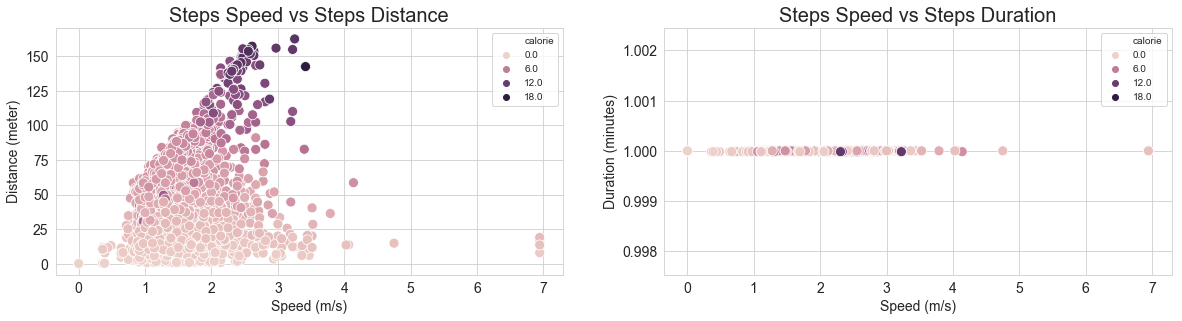

In [136]:
# plotting speed vs distance, and speed vs duration to decide what can we remove out of small steps
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.subplot(2, 2, 1)
ax = sns.scatterplot(x="speed", y="distance", hue="calorie", s=100,
                      data=sc_df)
#ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Steps Speed vs Steps Distance",fontsize=20)
ax.set_xlabel("Speed (m/s)",fontsize=14)
ax.set_ylabel("Distance (meter)",fontsize=14)
ax.tick_params(labelsize=14)

plt.subplot(2, 2, 2)
ax = sns.scatterplot(x="speed", y="duration", hue="calorie", s=100,
                      data=sc_df)
#ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Steps Speed vs Steps Duration",fontsize=20)
ax.set_xlabel("Speed (m/s)",fontsize=14)
ax.set_ylabel("Duration (minutes)",fontsize=14)
ax.tick_params(labelsize=14)

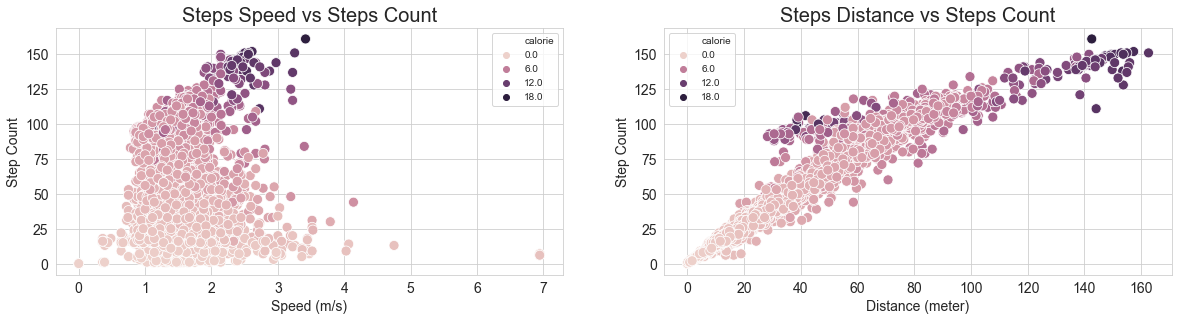

In [137]:
# plotting speed vs count and distance vs count to decide what can we remove out of small steps
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
plt.subplot(2, 2, 1)
ax = sns.scatterplot(x="speed", y="count", hue="calorie", s=100,
                      data=sc_df)
#ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Steps Speed vs Steps Count",fontsize=20)
ax.set_xlabel("Speed (m/s)",fontsize=14)
ax.set_ylabel("Step Count",fontsize=14)
ax.tick_params(labelsize=14)

plt.subplot(2, 2, 2)
ax = sns.scatterplot(x="distance", y="count", hue="calorie", s=100,
                      data=sc_df)
#ax.set(xlim=(0.75,2.2))
ax.axes.set_title("Steps Distance vs Steps Count",fontsize=20)
ax.set_xlabel("Distance (meter)",fontsize=14)
ax.set_ylabel("Step Count",fontsize=14)
ax.tick_params(labelsize=14)

The count and distance are showing an interesting trend here.

In [138]:
# get stat data before reomoving small steps
sc_df.describe()

count      calorie        speed     distance     duration
count  6199.000000  6199.000000  6199.000000  6199.000000  6199.000000
mean     47.930473     2.252730     1.467301    36.162816     0.999988
std      33.584263     1.980601     0.408126    26.880485     0.000008
min       0.000000     0.000000     0.000000     0.000000     0.999983
25%      20.000000     0.850000     1.222222    14.730000     0.999983
50%      37.000000     1.610000     1.416667    27.700000     0.999983
75%      71.000000     3.180000     1.611111    51.890000     1.000000
max     161.000000    15.620000     6.944445   162.620000     1.000000

In [139]:
# get the shape before removing small steps
sc_df.shape

(6199, 13)

In [140]:
# removing small steps
small_steps = sc_df[((sc_df['count']< 48) & (sc_df.distance <=36.2 ))].index
sc_df = sc_df.drop(list(small_steps), axis=0)

In [141]:
# get the shape after removing small steps
sc_df.shape

(2580, 13)

In [142]:
# get stat data after reomoving small steps
sc_df.describe()

count      calorie        speed     distance     duration
count  2580.000000  2580.000000  2580.000000  2580.000000  2580.000000
mean     81.814341     3.964579     1.485372    62.035274     0.999990
std      24.075525     2.021516     0.359362    22.297393     0.000008
min      30.000000     1.800000     0.749397    25.360000     0.999983
25%      60.000000     2.630000     1.277778    44.507500     0.999983
50%      81.000000     3.610000     1.439349    57.440000     0.999983
75%     101.000000     4.450000     1.611111    75.420000     1.000000
max     161.000000    15.620000     4.138889   162.620000     1.000000

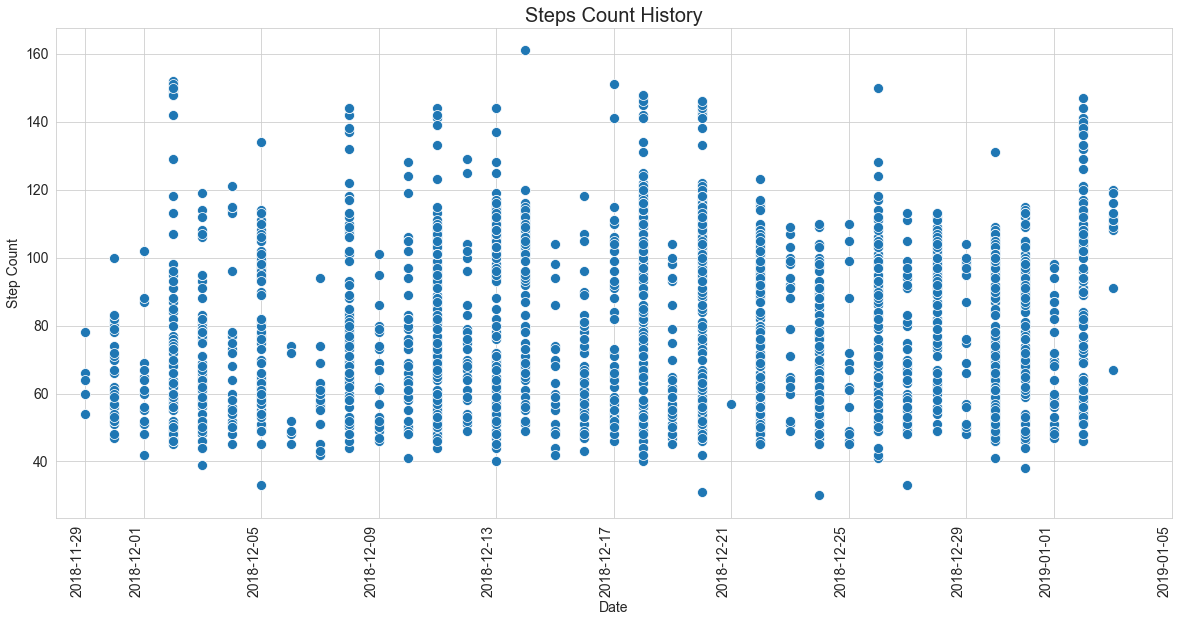

In [143]:
# plot the steps count after removing small steps
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="count", s=100,
                      data=sc_df)
ax.set(xlim=("2018-11-28","2019-01-05"))
#ax.set(ylim=(0,100))
ax.axes.set_title("Steps Count History",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Step Count",fontsize=14)
ax.tick_params(labelsize=14)
fig.autofmt_xdate(rotation = 90)

In [144]:
# get the record time in hour as there are steps measure in same day but at different time 
sc_df["record_time"]= pd.to_datetime(sc_df["create_time"]).dt.hour

In [145]:
# Dropping some unnecessary columns
drop_col = ['end_time','start_time','update_time','create_time']
sc_df.drop(drop_col, axis = 1, inplace = True)

In [146]:
# arranging the data based on date
sc_df = sc_df.sort_values('Date', ascending = True)

In [147]:
sc_df.head()

count  calorie     speed time_offset  distance        Date  duration  \
5473     60     2.55  1.222222    UTC-0500    42.030  2018-11-29  0.999983   
1794     78     3.38  1.805556    UTC-0500    58.630  2018-11-29  0.999983   
5721     66     2.82  1.222222    UTC-0500    47.150  2018-11-29  0.999983   
6114     64     2.79  1.486609    UTC-0500    47.451  2018-11-29  0.999983   
3611     54     2.41  1.611111    UTC-0500    42.420  2018-11-29  0.999983   

     Weekday Week_Class  record_time  
5473    Thur    Weekday           17  
1794    Thur    Weekday           11  
5721    Thur    Weekday           18  
6114    Thur    Weekday           23  
3611    Thur    Weekday           11

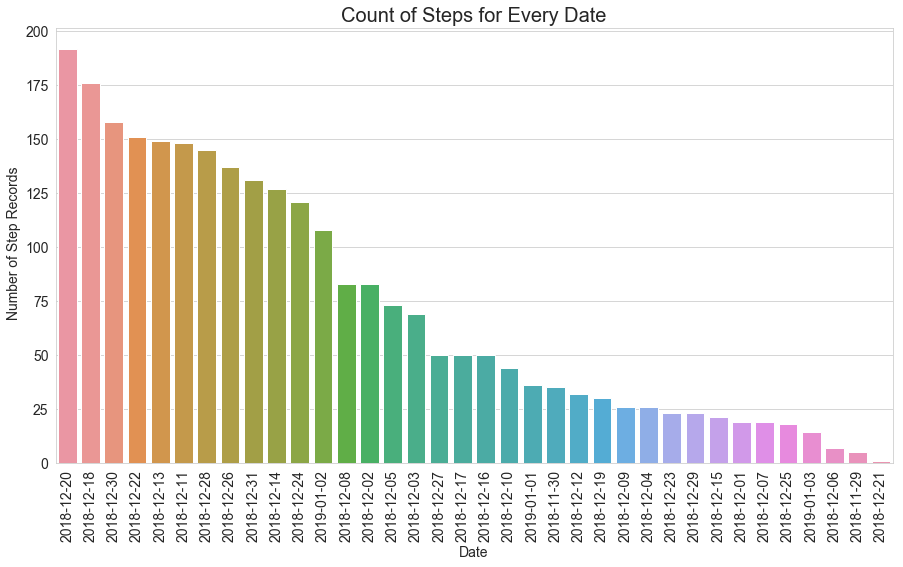

In [148]:
# count steps for every date
f, ax = plt.subplots(figsize=(15, 8))
myFmt = DateFormatter("%m/%y")
sns.countplot(x="Date", order = sc_df['Date'].value_counts().index,data=sc_df,);
ax.axes.set_title("Count of Steps for Every Date",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel(" Number of Step Records",fontsize=14)
ax.tick_params(labelsize=14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

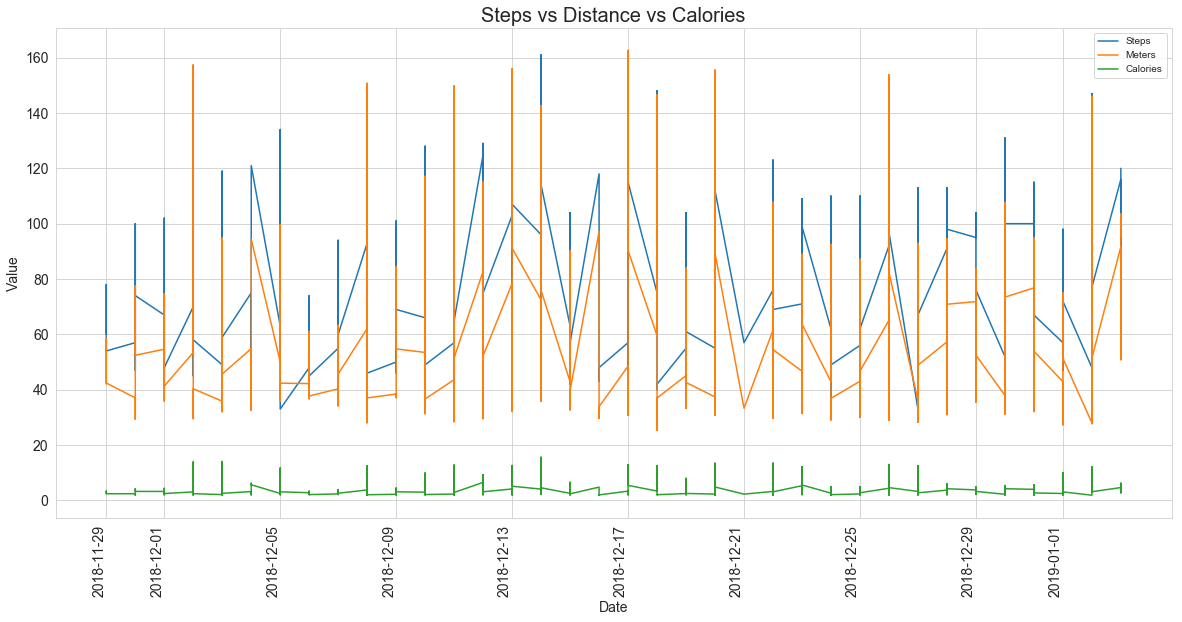

In [149]:
# plotting steps, distance and calories burned
fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
ax1.plot(sc_df['Date'], sc_df['count'], '-', label = 'Steps')
ax1.plot(sc_df['Date'], sc_df['distance'], '-', label = 'Meters')
ax1.plot(sc_df['Date'], sc_df['calorie'], '-', label = 'Calories')
ax1.axes.set_title("Steps vs Distance vs Calories",fontsize=20)
ax1.set_xlabel("Date",fontsize=14)
ax1.set_ylabel("Value",fontsize=14)
ax1.tick_params(labelsize=14)
ax1.legend()
fig.autofmt_xdate(rotation = 90)

In [150]:
# printing the count of everyday steps
print(sc_df.groupby(sc_df['Date'])['count'].count().sort_values(ascending=True))

Date
2018-12-21      1
2018-11-29      5
2018-12-06      7
2019-01-03     14
2018-12-25     18
2018-12-01     19
2018-12-07     19
2018-12-15     21
2018-12-29     23
2018-12-23     23
2018-12-04     26
2018-12-09     26
2018-12-19     30
2018-12-12     32
2018-11-30     35
2019-01-01     36
2018-12-10     44
2018-12-16     50
2018-12-27     50
2018-12-17     50
2018-12-03     69
2018-12-05     73
2018-12-08     83
2018-12-02     83
2019-01-02    108
2018-12-24    121
2018-12-14    127
2018-12-31    131
2018-12-26    137
2018-12-28    145
2018-12-11    148
2018-12-13    149
2018-12-22    151
2018-12-30    158
2018-12-18    176
2018-12-20    192
Name: count, dtype: int64


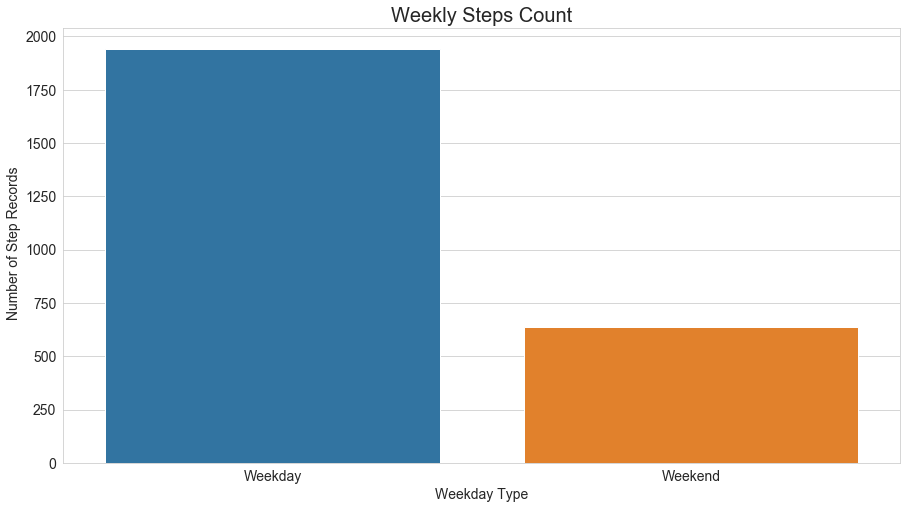

In [151]:
# count the weekdays for every steps
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Week_Class", data=sc_df,);
ax.axes.set_title("Weekly Steps Count",fontsize=20)
ax.set_xlabel("Weekday Type",fontsize=14)
ax.set_ylabel(" Number of Step Records",fontsize=14)
ax.tick_params(labelsize=14)

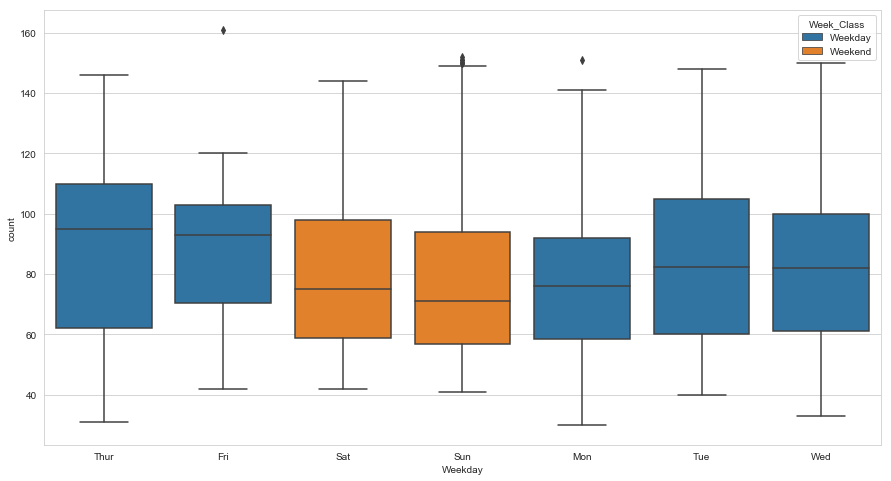

In [152]:
# boxplot for step count for every days
f, ax = plt.subplots(figsize=(15, 8))
sns.boxplot(x="Weekday", y="count", hue="Week_Class",
                 data=sc_df, dodge=False)

# 4. Heart Rate Data

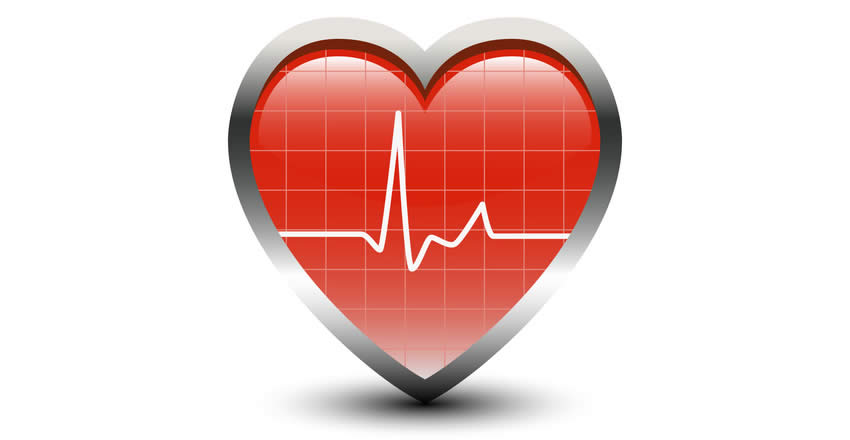

## 4.1 Data Cleaning

In this section, a deep look is needed to analyze the data, but first, we have to make sure that, our data is clean and well orgnized. To do so, the following steps were considered: 
 
 1. Plotting a bar chart for NaN percentage at every column, where it will give us some glance which columns are have almost 100% NaN or missing value. 
 
 2. Plotting again the heat map to show NaN and Missing values of exercise data. 
 
 3. Dropping 100% NaN columns based on heat map, and NaN percentage bar chart and other unrelated columns. 
 
 4. Creating a new column "date" in exercise data from start column that continas only the date without time. Drop the start and end columns as they will not be needed in the analysis since we have the time duration.  
 
 5. create a column for heart rate record duration and another for time when it was recorded.  
 
 6. Creating a new column "Weekday" which will contain the day of the respective date provided in the exercise data. 
 
 7. Classify the days into weekday and weekend and create a new column named "Week_Class". 
  
 8. Dropping unrelated columns from the exercise data, as I will not need them for the analysis. 
 
 9. Imputate the missing value or NaN by using mean. Please see the imputation section below for more details. There is not too many missing data in min and max columns. 

In [153]:
# reading the heart rate data 
hr_df = pd.read_csv("heart_rate.csv",encoding = "utf-8",index_col=0)

In [154]:
# getting the heart data information
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15726 entries, 0 to 15725
Data columns (total 15 columns):
end_time            15726 non-null object
heart_rate          15726 non-null float64
binning_data        38 non-null object
start_time          15726 non-null object
heart_beat_count    15726 non-null int64
update_time         15726 non-null object
deviceuuid          15726 non-null object
max                 15709 non-null float64
min                 15709 non-null float64
pkg_name            15726 non-null object
time_offset         15726 non-null object
custom              0 non-null float64
comment             0 non-null float64
datauuid            15726 non-null object
create_time         15726 non-null object
dtypes: float64(5), int64(1), object(9)
memory usage: 1.9+ MB


In [155]:
# getting the data shape
hr_df.shape

(15726, 15)

In [156]:
# arrange data based on create time date
hr_df = hr_df.sort_values('create_time', ascending = True)
hr_df.head()

end_time  heart_rate binning_data  \
2318  2016-06-09 18:41:09.456        52.0          NaN   
4544  2016-06-10 08:05:36.753        76.0          NaN   
4750  2016-06-11 05:29:38.666        61.0          NaN   
8503  2016-06-11 11:38:31.311        66.0          NaN   
9709  2016-06-13 10:04:58.623        61.0          NaN   

                   start_time  heart_beat_count              update_time  \
2318  2016-06-09 18:41:04.783                 0  2016-06-09 18:41:38.226   
4544  2016-06-10 08:05:33.590                 0  2016-06-10 08:05:45.925   
4750  2016-06-11 05:29:15.020                 0  2016-06-11 05:29:51.197   
8503  2016-06-11 11:38:27.445                 0  2016-06-11 11:38:39.844   
9709  2016-06-13 10:04:18.535                 0  2016-06-13 10:05:03.612   

      deviceuuid  max  min                     pkg_name time_offset  custom  \
2318  jQfnryI8/B  NaN  NaN  com.sec.android.app.shealth    UTC+0430     NaN   
4544  jQfnryI8/B  NaN  NaN  com.sec.android.app.shealth    UTC+0430     NaN   
4750  jQfnryI8/B  NaN  NaN  com.sec.android.app.shealth    UTC+0430     NaN   
8503  jQfnryI8/B  NaN  NaN  com.sec.android.app.shealth    UTC+0430     NaN   
9709  jQfnryI8/B  NaN  NaN  com.sec.android.app.shealth    UTC+0430     NaN   

      comment                              datauuid              create_time  
2318      NaN  24e78fa7-6904-4c9f-9c66-5ae7ab35edb0  2016-06-09 18:41:38.226  
4544      NaN  492ed1f5-c75d-427e-a671-1309d2b7b4c0  2016-06-10 08:05:45.925  
4750      NaN  4c93417f-7846-4192-8d92-dc81270fa9b1  2016-06-11 05:29:51.197  
8503      NaN  897bd867-18b4-4b4a-ba37-04de4acd7c96  2016-06-11 11:38:39.844  
9709      NaN  9deabae9-da44-422f-b679-4956bc1bfe1d  2016-06-13 10:05:03.612

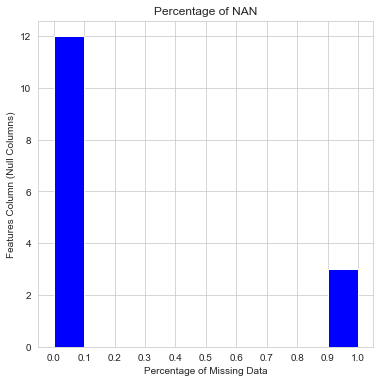

In [157]:
#plotting the percentage of missing value in each column (feature) to % of null columns 
NaN_Percentage = hr_df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='blue')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

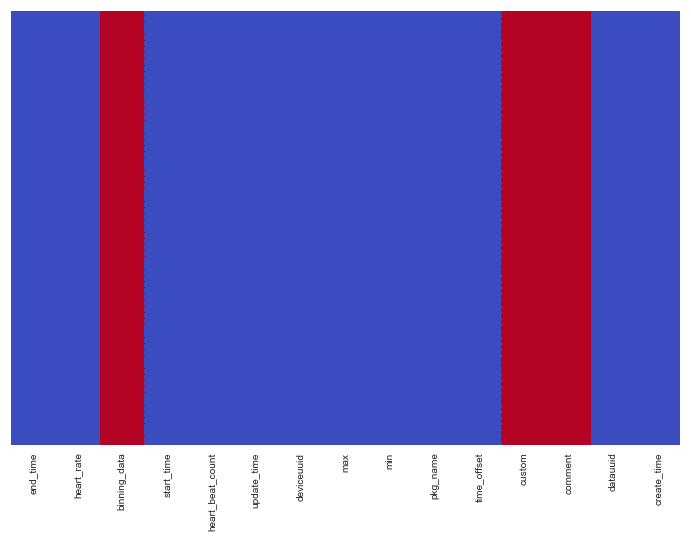

In [158]:
#Plotting missing data heat map to know clearly which columns are missing or containing NaN 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(hr_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax);

In [159]:
# Displaying the percentage of each column missing value for further investigating
print(NaN_Percentage)

end_time            0.000000
heart_rate          0.000000
start_time          0.000000
heart_beat_count    0.000000
update_time         0.000000
deviceuuid          0.000000
pkg_name            0.000000
time_offset         0.000000
datauuid            0.000000
create_time         0.000000
max                 0.001081
min                 0.001081
binning_data        0.997584
custom              1.000000
comment             1.000000
dtype: float64


In [160]:
# Dropping some unnecessary columns and 100% Nan columns 
hr_df.drop(['binning_data','comment','custom','deviceuuid','pkg_name','datauuid'], axis = 1, inplace = True)

In [161]:
# Converting Start date-time into only date in year,month, day
hr_df['Date'] = pd.to_datetime(hr_df['start_time'])
hr_df['Date'] =hr_df['Date'].apply(lambda x: x.date() )
hr_df['Date'] = hr_df.Date.sort_values()
hr_df.head()

end_time  heart_rate               start_time  \
2318  2016-06-09 18:41:09.456        52.0  2016-06-09 18:41:04.783   
4544  2016-06-10 08:05:36.753        76.0  2016-06-10 08:05:33.590   
4750  2016-06-11 05:29:38.666        61.0  2016-06-11 05:29:15.020   
8503  2016-06-11 11:38:31.311        66.0  2016-06-11 11:38:27.445   
9709  2016-06-13 10:04:58.623        61.0  2016-06-13 10:04:18.535   

      heart_beat_count              update_time  max  min time_offset  \
2318                 0  2016-06-09 18:41:38.226  NaN  NaN    UTC+0430   
4544                 0  2016-06-10 08:05:45.925  NaN  NaN    UTC+0430   
4750                 0  2016-06-11 05:29:51.197  NaN  NaN    UTC+0430   
8503                 0  2016-06-11 11:38:39.844  NaN  NaN    UTC+0430   
9709                 0  2016-06-13 10:05:03.612  NaN  NaN    UTC+0430   

                  create_time        Date  
2318  2016-06-09 18:41:38.226  2016-06-09  
4544  2016-06-10 08:05:45.925  2016-06-10  
4750  2016-06-11 05:29:51.197  2016-06-11  
8503  2016-06-11 11:38:39.844  2016-06-11  
9709  2016-06-13 10:05:03.612  2016-06-13

In [162]:
# create a column for duration of exercise
hr_df["duration"]=pd.to_datetime(hr_df["end_time"])- pd.to_datetime(hr_df["start_time"])

In [163]:
# converting the duration into time in minutes since Heart rate value given in beats per minute (bpm).
hr_df['duration'] = hr_df['duration']/np.timedelta64(1,'m')

In [164]:
# create record column for storing record time where heart rate were collected
hr_df["record_time"]= pd.to_datetime(hr_df["create_time"]).dt.hour

In [165]:
# function to get the day from the date
def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
hr_df['Weekday']  = hr_df["Date"].apply(lambda datestamp: dayofweek(datestamp))

In [166]:
#Defining lists for each weekday classification with mentioned day
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thu','Fri']


def getday(day):
    if day in weekend:
        return "Weekend"
    elif day in weekday:
        return "Weekday"
    else:
        return "Other"

In [167]:
# adding week_Class column to sleeping data frame for purpose on analysis below    
hr_df['Week_Class'] = hr_df["Weekday"].apply(lambda x: getday(x))

In [168]:
# define simple imputation finction by using the mean.
def impute_na(df, variable, median):
    df[variable] = df[variable].fillna(median)

In [169]:
# calculating the mean of each column that contains NaN, to be used as input in the imputation function
median_mxhrt = hr_df["max"].mean()
median_minhrt = hr_df["min"].mean()

In [170]:
# imputate the missing values 
impute_na(hr_df, "max", median_mxhrt)
impute_na(hr_df, "min", median_minhrt)

In [171]:
# check if there is any null values
hr_df.isnull().any()

end_time            False
heart_rate          False
start_time          False
heart_beat_count    False
update_time         False
max                 False
min                 False
time_offset         False
create_time         False
Date                False
duration            False
record_time         False
Weekday             False
Week_Class          False
dtype: bool

Greate Heart Rate Data are cleaned ready to do some usefull analysis 

In [172]:
# drop no more needed columns
hr_df.drop(['end_time','start_time','update_time','create_time'], axis = 1, inplace = True)

In [173]:
hr_df.head()

heart_rate  heart_beat_count       max       min time_offset  \
2318        52.0                 0  0.581386  0.578013    UTC+0430   
4544        76.0                 0  0.581386  0.578013    UTC+0430   
4750        61.0                 0  0.581386  0.578013    UTC+0430   
8503        66.0                 0  0.581386  0.578013    UTC+0430   
9709        61.0                 0  0.581386  0.578013    UTC+0430   

            Date  duration  record_time Weekday Week_Class  
2318  2016-06-09  0.077883           18    Thur      Other  
4544  2016-06-10  0.052717            8     Fri    Weekday  
4750  2016-06-11  0.394100            5     Sat    Weekend  
8503  2016-06-11  0.064433           11     Sat    Weekend  
9709  2016-06-13  0.668133           10     Mon    Weekday

In [174]:
# get the record time unique values
hr_df['record_time'].unique()

array([18,  8,  5, 11, 10,  3, 14,  2,  4, 19, 21,  1,  0, 13, 12, 17, 16,
       22,  6,  7,  9, 15, 20, 23], dtype=int64)

In [175]:
# display the stat for heart rate
hr_df.describe()

heart_rate  heart_beat_count           max           min  \
count  15726.000000      15726.000000  15726.000000  15726.000000   
mean      60.704375          0.992497      0.581386      0.578013   
std        8.742298          0.086300      6.238529      6.202844   
min       41.000000          0.000000      0.000000      0.000000   
25%       55.000000          1.000000      0.000000      0.000000   
50%       59.000000          1.000000      0.000000      0.000000   
75%       65.000000          1.000000      0.000000      0.000000   
max      177.000000          1.000000    118.000000    118.000000   

           duration   record_time  
count  15726.000000  15726.000000  
mean       0.145260      9.697062  
std        2.944953      6.510770  
min        0.000000      0.000000  
25%        0.000000      5.000000  
50%        0.000000      8.000000  
75%        0.000000     15.000000  
max       59.999983     23.000000

**Explaination Note:** 


For the purpose of analyizing the heart rate, I am going to use samsung heart rate documentation information to classify the heart rate as (below average, average, above average) [1]. The following assumptions are considered: 

1. The participant age group is within 20-39 years old. 
2. Gender is Male. 
3. The measurment of heart rate was done in general status that is measured when you are not resting, but not working out either which is typical for day to day activity [1]. 
4. The hear rate will be calssified as: 
    1. Average if it is in range of (66-82). 
    2. Above average if it is greater than 82. 
    3. Below average if it is less than 66. 


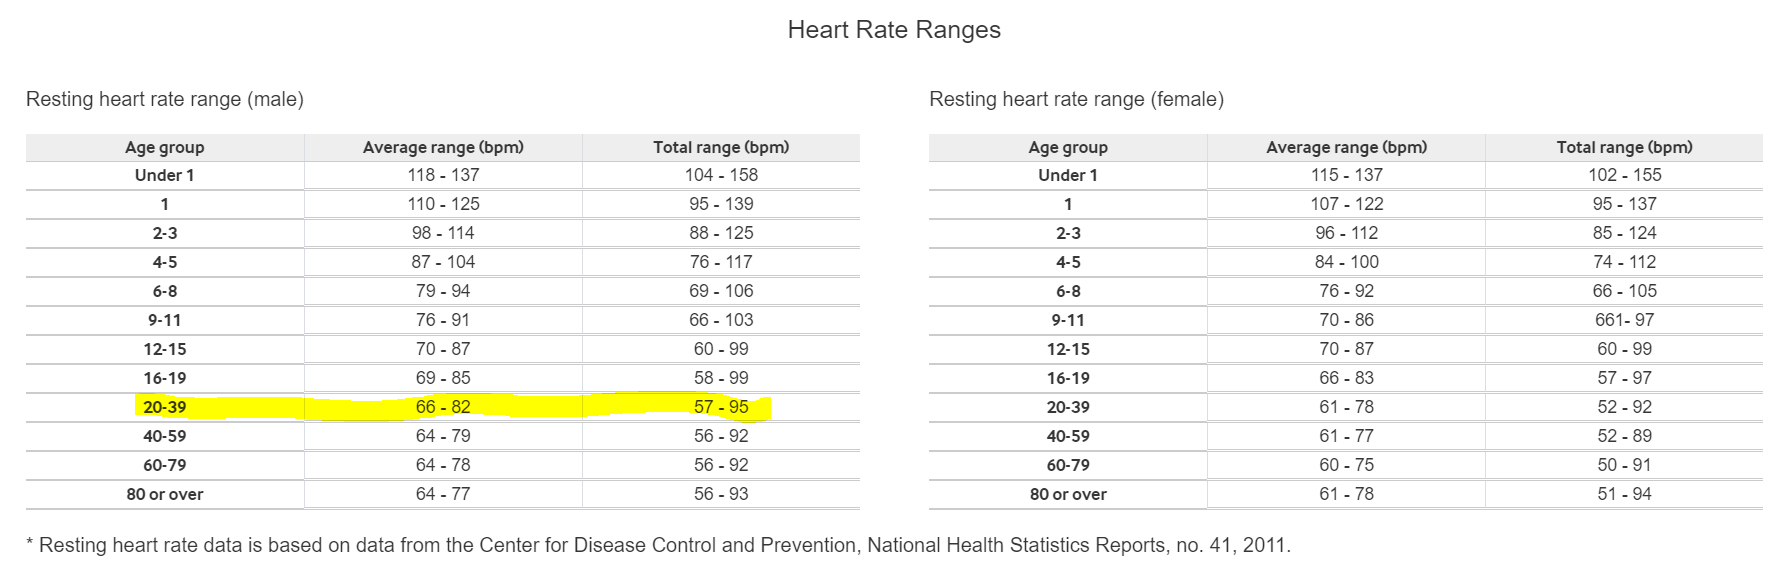

**References:** 
1. https://www.samsung.com/us/heartratesensor/ 


In [176]:
# define a function to classify the hear rate
def gethr_status(i): 
    
    if  ((i >=66) & (i <=82)): 
        return 'Average'
    elif i > 82: 
        return 'Above Average'
    elif i < 66:
        return 'Below Average'
    else:
        return 'No Criteria'

In [177]:
# get the heart rate status 
hr_df['heartrate_class'] = hr_df["heart_rate"].apply(lambda x: gethr_status(x))

In [178]:
# check the new create column for heart rate class
hr_df['heartrate_class'].unique()

array(['Below Average', 'Average', 'Above Average'], dtype=object)

In [179]:
# function for classiy the time when data collected 
def get_time(i):  
    if i in range(0,11): 
        return 'Morning'
    elif i in range(12,17): 
        return 'Afternoon'
    else:
        return 'Evening'

In [180]:
# get the record time period
hr_df['testing_time'] = hr_df["record_time"].apply(lambda x: get_time(x))

In [181]:
# check time offset, but I am not going to needed at all.
hr_df['time_offset'].unique()

array(['UTC+0430', 'UTC-0700', 'UTC-0800', 'UTC-0500', 'UTC-0400',
       'UTC+0200'], dtype=object)

In [182]:
hr_df.head()

heart_rate  heart_beat_count       max       min time_offset  \
2318        52.0                 0  0.581386  0.578013    UTC+0430   
4544        76.0                 0  0.581386  0.578013    UTC+0430   
4750        61.0                 0  0.581386  0.578013    UTC+0430   
8503        66.0                 0  0.581386  0.578013    UTC+0430   
9709        61.0                 0  0.581386  0.578013    UTC+0430   

            Date  duration  record_time Weekday Week_Class heartrate_class  \
2318  2016-06-09  0.077883           18    Thur      Other   Below Average   
4544  2016-06-10  0.052717            8     Fri    Weekday         Average   
4750  2016-06-11  0.394100            5     Sat    Weekend   Below Average   
8503  2016-06-11  0.064433           11     Sat    Weekend         Average   
9709  2016-06-13  0.668133           10     Mon    Weekday   Below Average   

     testing_time  
2318      Evening  
4544      Morning  
4750      Morning  
8503      Evening  
9709      Morning

## 4.2 Explotatory Analysis and Visualization

For the heart rate data, the analysis and plotting are associated with some advance cleaning to come up with a good conclusion. 

1. From the scatter plot, outliers spotted and removed in order to have an equally distrbuated data. 

2. The line plot shows a constant flactuation in heart rate from 2018-06 to 2019-01, the range of heart rate is 55-70 bpm. This behaviour trend happended to be in summer upto begining of sever cold winter. Therefore, the fixed range can be explained as an average range for someone who do some exercise, which can be classified as average health behaviour. 

3. For data range 2017-11 to 2018-04 winter time, the heart rate appears to be high and even the flactuation is high too. As expected in winter, people feel lazy and sleep more than exercise, therefore, winter does affect the performance of the participant. 

4. To deeply analyze the heart rate performance, we plot the heart rate category count distribuation. The distribuation provides an overall insight about heart rate. We could see that there are some rates have a very minor count.Therefore, I removed those who has count less than 10 times. This will give us a clear insight about overall performance.

5. After removing less counts heart rate, the most common heart rate is 56 bpm, and overall heart performance is below the average. Here, the importance of having a rate below average and above average. At rest situation or general status, heart rates which are less than the average are indications of good cardiovascular performance, basically classifed as health person who can maintain health of his heart by exercising and continously exercise. 

6. From the start_time column, we identified the most frequent time period. The participant frequently test his heart rate in the morning, probably right after he wakes up. According to healthline, "The best time to test your resting heart rate is first thing in the morning, before you’ve gotten out of bed — ideally after a good night’s sleep" [1]. There are some evening hours where participant is testing his heart rate, I would say that he is testing his heart rate sometime before sleeping and then again when he wakeup in order to measure difference. 


**Conclusion:** 

As most of the heart rates distribution are below the average, the participant has a good cardiovascular performance  and in good shape. However, he is not an athlete, as most athlete when measuing their heart rate at rest, heart rates are always below 45 bpm. These low heart rate indicate an excellent cardiovascular performance and super energentic heart. 


Since the participant most frequently measure his heart rate in the morning, this guy is aware of some heart health knowledge which is a good for every person to know about. 


From heart rate analysis, I can conclude that participant has not problems with his heart, he has a good cardiovascular performance! 



**References:** 

1. https://www.healthline.com/health/heart-disease/ideal-heart-rate#2 


In [183]:
# arranging the data before plotting
hr_df = hr_df.sort_values('Date', ascending = True)

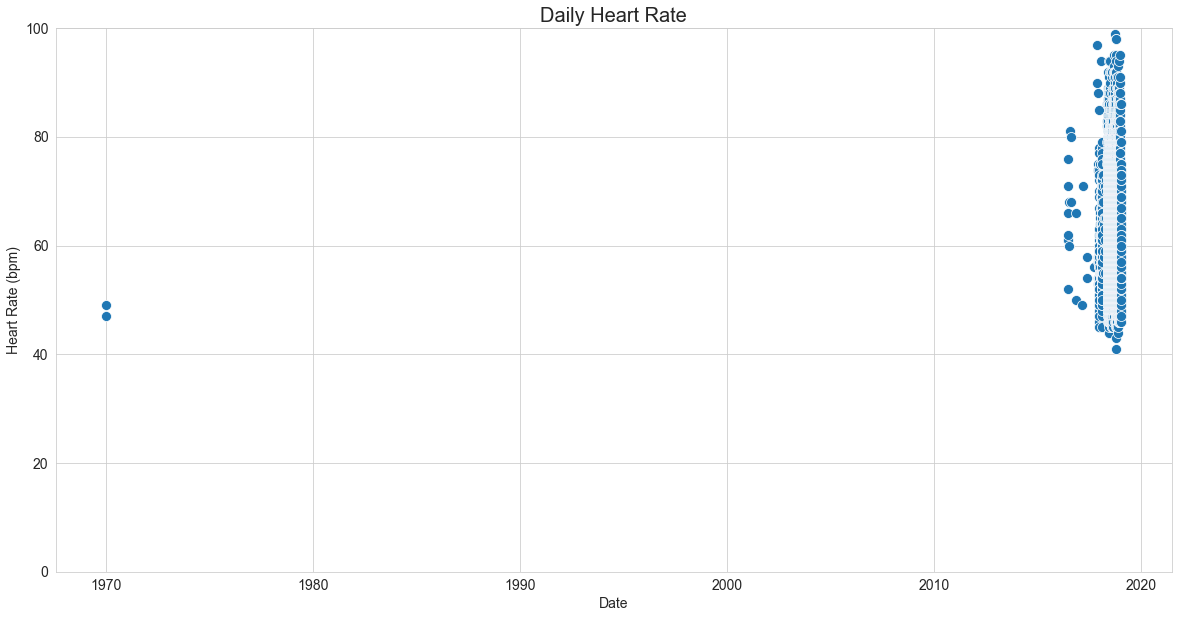

In [184]:
# scatter plot of heart rate vs date to determine if there outliers
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="heart_rate", s=100,
                      data=hr_df)
#ax.set(xlim=("2016-06","2019-2"))
ax.set(ylim=(0,100))
ax.axes.set_title("Daily Heart Rate",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

In [185]:
# looks like we have outliers, we need to get rid of them, let us displat them here
hr_df.head(25)

heart_rate  heart_beat_count        max        min time_offset  \
6078         49.0                 1   0.000000   0.000000    UTC-0500   
11157        47.0                 1   0.000000   0.000000    UTC-0500   
2318         52.0                 0   0.581386   0.578013    UTC+0430   
4544         76.0                 0   0.581386   0.578013    UTC+0430   
8503         66.0                 0   0.581386   0.578013    UTC+0430   
4750         61.0                 0   0.581386   0.578013    UTC+0430   
9709         61.0                 0   0.581386   0.578013    UTC+0430   
3093         61.0                 0   0.581386   0.578013    UTC+0430   
8629         71.0                 0   0.581386   0.578013    UTC+0430   
8203         62.0                 0   0.581386   0.578013    UTC+0430   
1842         60.0                 0   0.581386   0.578013    UTC-0700   
728          68.0                 0   0.581386   0.578013    UTC-0700   
13351        81.0                 0   0.581386   0.578013    UTC-0700   
15038        68.0                 0   0.581386   0.578013    UTC-0700   
8300         80.0                 0   0.581386   0.578013    UTC-0700   
4808         50.0                 0   0.581386   0.578013    UTC-0700   
10606        66.0                 0   0.581386   0.578013    UTC-0700   
11752        49.0                 0   0.581386   0.578013    UTC-0800   
11693        71.0                 0   0.581386   0.578013    UTC-0500   
6046         58.0                 0  58.000000  58.000000    UTC-0400   
10889        54.0                 0  54.000000  54.000000    UTC-0400   
6376         56.0                 0  56.000000  56.000000    UTC-0400   
4676         97.0                 0  97.000000  97.000000    UTC-0500   
10428        90.0                 0  90.000000  90.000000    UTC-0500   
12023        54.0                 0  54.000000  54.000000    UTC-0500   

             Date  duration  record_time Weekday Week_Class heartrate_class  \
6078   1970-01-01  0.000000            3    Thur      Other   Below Average   
11157  1970-01-01  0.000000           12    Thur      Other   Below Average   
2318   2016-06-09  0.077883           18    Thur      Other   Below Average   
4544   2016-06-10  0.052717            8     Fri    Weekday         Average   
8503   2016-06-11  0.064433           11     Sat    Weekend         Average   
4750   2016-06-11  0.394100            5     Sat    Weekend   Below Average   
9709   2016-06-13  0.668133           10     Mon    Weekday   Below Average   
3093   2016-06-14  0.394617            3     Tue    Weekday   Below Average   
8629   2016-06-17  0.056067            5     Fri    Weekday         Average   
8203   2016-06-19  0.296250           10     Sun    Weekend   Below Average   
1842   2016-06-23  0.085583           14    Thur      Other   Below Average   
728    2016-07-03  0.058967            5     Sun    Weekend         Average   
13351  2016-07-24  0.049500            2     Sun    Weekend         Average   
15038  2016-08-13  0.797583            4     Sat    Weekend         Average   
8300   2016-08-13  0.049883           19     Sat    Weekend         Average   
4808   2016-10-27  0.077983            5    Thur      Other   Below Average   
10606  2016-10-27  0.302433           21    Thur      Other         Average   
11752  2017-02-13  0.103683            1     Mon    Weekday   Below Average   
11693  2017-03-07  0.100117           14     Tue    Weekday         Average   
6046   2017-05-14  0.104900            1     Sun    Weekend   Below Average   
10889  2017-05-14  0.073617            1     Sun    Weekend   Below Average   
6376   2017-09-17  0.107300            0     Sun    Weekend   Below Average   
4676   2017-11-06  0.092967           13     Mon    Weekday   Above Average   
10428  2017-11-06  0.044333           13     Mon    Weekday   Above Average   
12023  2017-11-20  0.094417            0     Mon    Weekday   Below Average   

      testing_time  
6078       Morning  
11157    Af

#### outliers are spotted from 1970 to 2017-09-17. Those values have uncontinous time period, that means recorded at different time. The reason for this is that, the particpant turn off  his device for long time then again record his heart beat. Or due to date setting prior to use the device and the app, such that date was selected wrongly for that time. Therefore, we would rather to have a continuous data to come up with something useful regarding heart rate analysis. Those outlier will be removed! 

In [186]:
# remove outliers
hr_df.drop(hr_df.head(22).index, inplace =True)

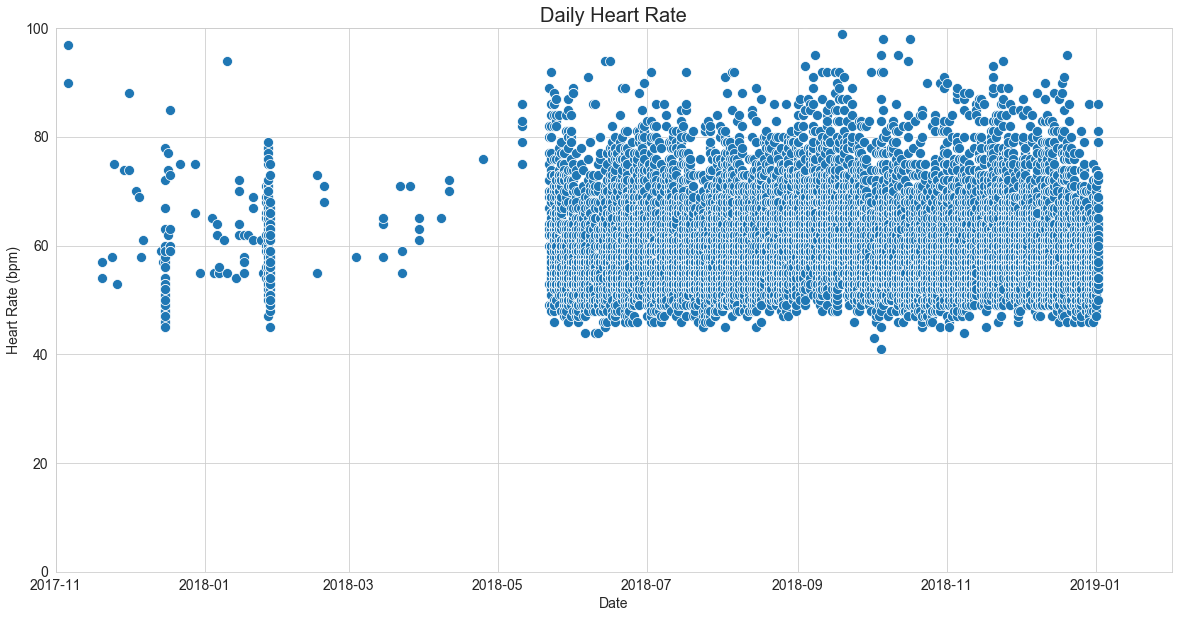

In [187]:
# replot all exercise data after removing outliers
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="heart_rate", s=100,
                      data=hr_df)
ax.set(xlim=("2017-11","2019-02"))
ax.set(ylim=(0,100))
ax.axes.set_title("Daily Heart Rate",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

C:\Users\Mohammed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


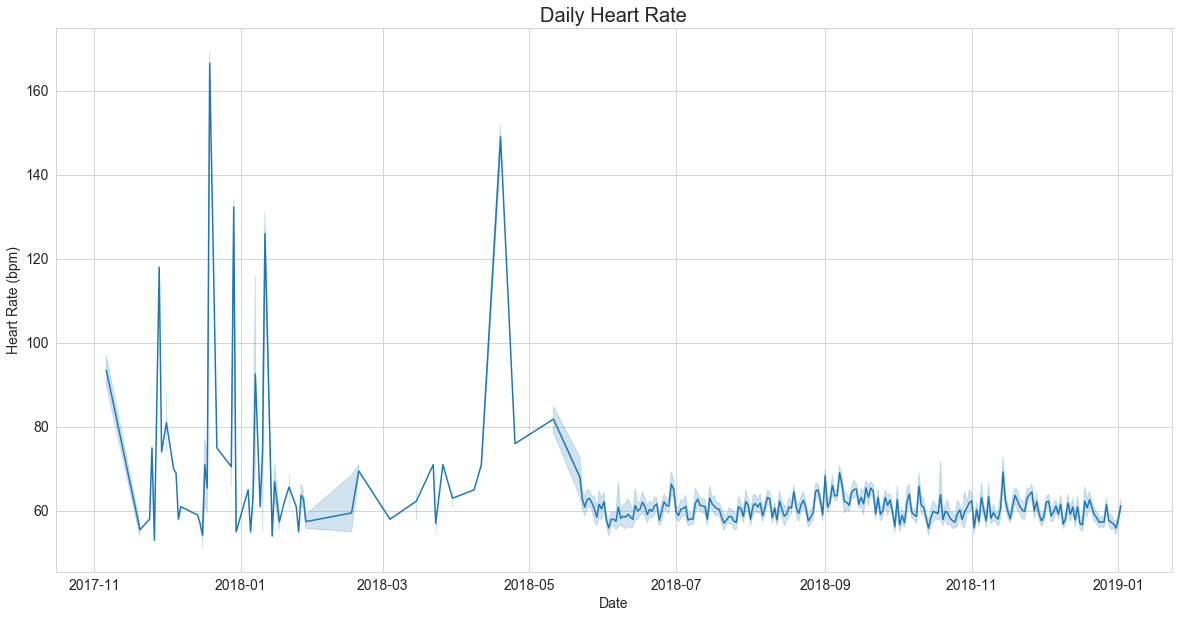

In [188]:
# line plot of heart rate
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y='heart_rate',
                    data=hr_df)
ax.axes.set_title("Daily Heart Rate",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

In [189]:
hr_df['heart_rate'] = hr_df['heart_rate'].astype(int)

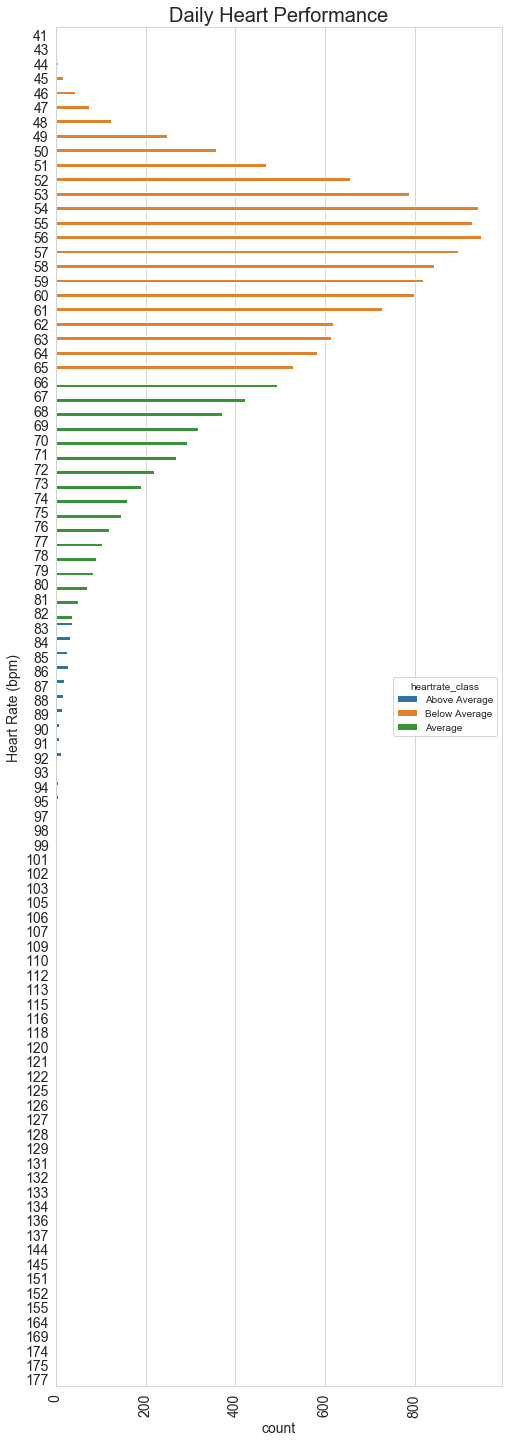

In [190]:
# count plot for heart rate classification
f, ax = plt.subplots(figsize=(8, 25))
sns.countplot(y="heart_rate",hue='heartrate_class',data=hr_df,);
ax.axes.set_title("Daily Heart Performance",fontsize=20)
ax.set_xlabel("count",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [191]:
print(hr_df.groupby(['heart_rate'])["heartrate_class"].count())

heart_rate
41       1
43       1
44       4
45      15
46      42
47      73
48     124
49     248
50     358
51     468
52     656
53     787
54     941
55     927
56     948
57     897
58     843
59     819
60     798
61     727
62     618
63     614
64     583
65     530
66     493
67     421
68     370
69     316
70     292
71     269
      ... 
110      1
112      1
113      2
115      1
116      1
118      2
120      1
121      2
122      2
125      2
126      1
127      1
128      2
129      1
131      3
132      2
133      1
134      1
136      1
137      1
144      1
145      1
151      1
152      1
155      1
164      1
169      1
174      1
175      1
177      1
Name: heartrate_class, Length: 94, dtype: int64


#### Remove heart rate that has less than or equal to 10 time frequency form the data as those only happend in less time which could be due to rapid movment or setting near by a viberate device or inappropriate sitting position. 

In [192]:
# Get the count of each value
value_counts = hr_df['heart_rate'].value_counts()

# Select the values where the count is less than 10
to_remove = value_counts[value_counts <= 10].index

# Keep rows where the city column is not in to_remove
hr_df = hr_df[~hr_df.heart_rate.isin(to_remove)]

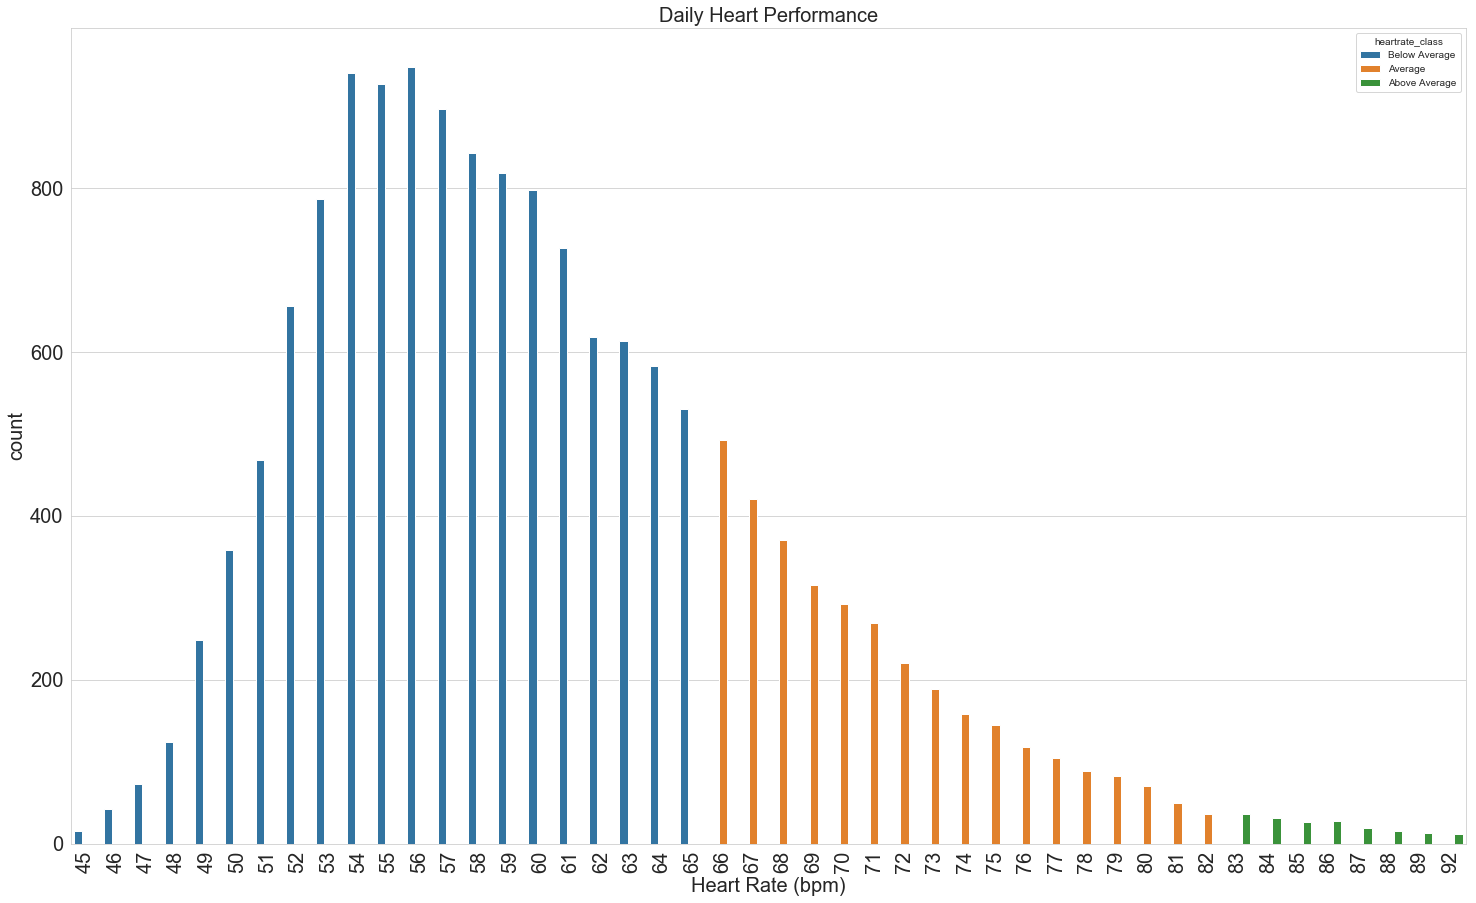

In [193]:
# replot after removing small counts from heart rate 
f, ax = plt.subplots(figsize=(25, 15))
sns.countplot(x="heart_rate",hue='heartrate_class',data=hr_df,);
ax.axes.set_title("Daily Heart Performance",fontsize=20)
ax.set_xlabel("Heart Rate (bpm)",fontsize=20)
ax.set_ylabel("count",fontsize=20)
ax.tick_params(labelsize=20)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

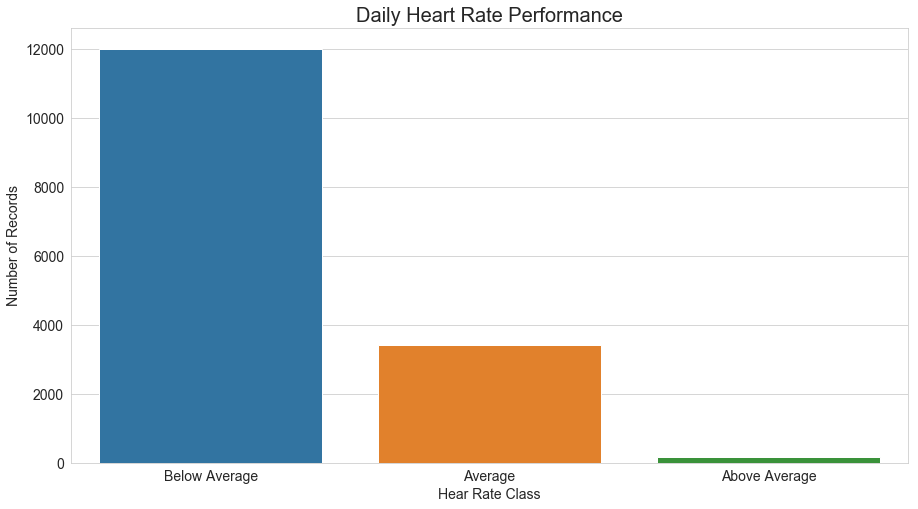

In [194]:
# plot count of each heart rate classification
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="heartrate_class", order = hr_df['heartrate_class'].value_counts().index, data=hr_df);
ax.axes.set_title("Daily Heart Rate Performance",fontsize=20)
ax.set_xlabel("Hear Rate Class",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

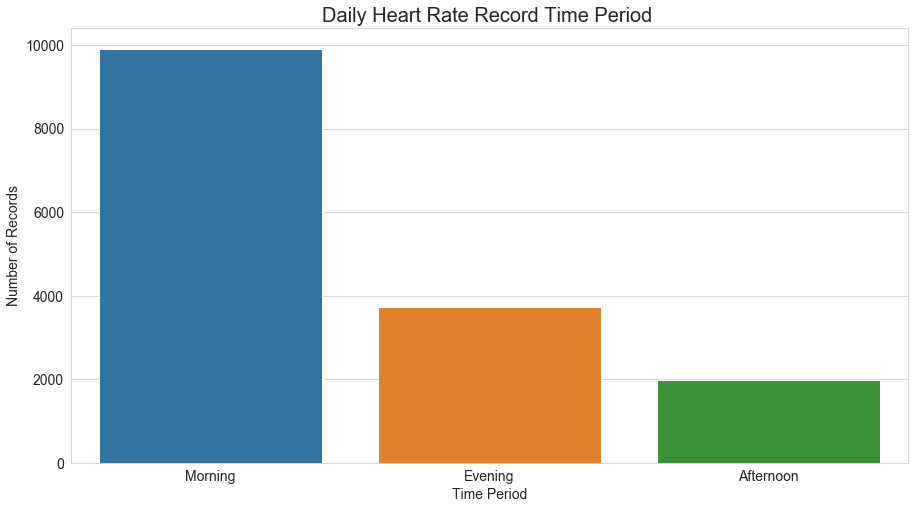

In [195]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="testing_time",order = hr_df['testing_time'].value_counts().index, data=hr_df);
ax.axes.set_title("Daily Heart Rate Record Time Period ",fontsize=20)
ax.set_xlabel("Time Period",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

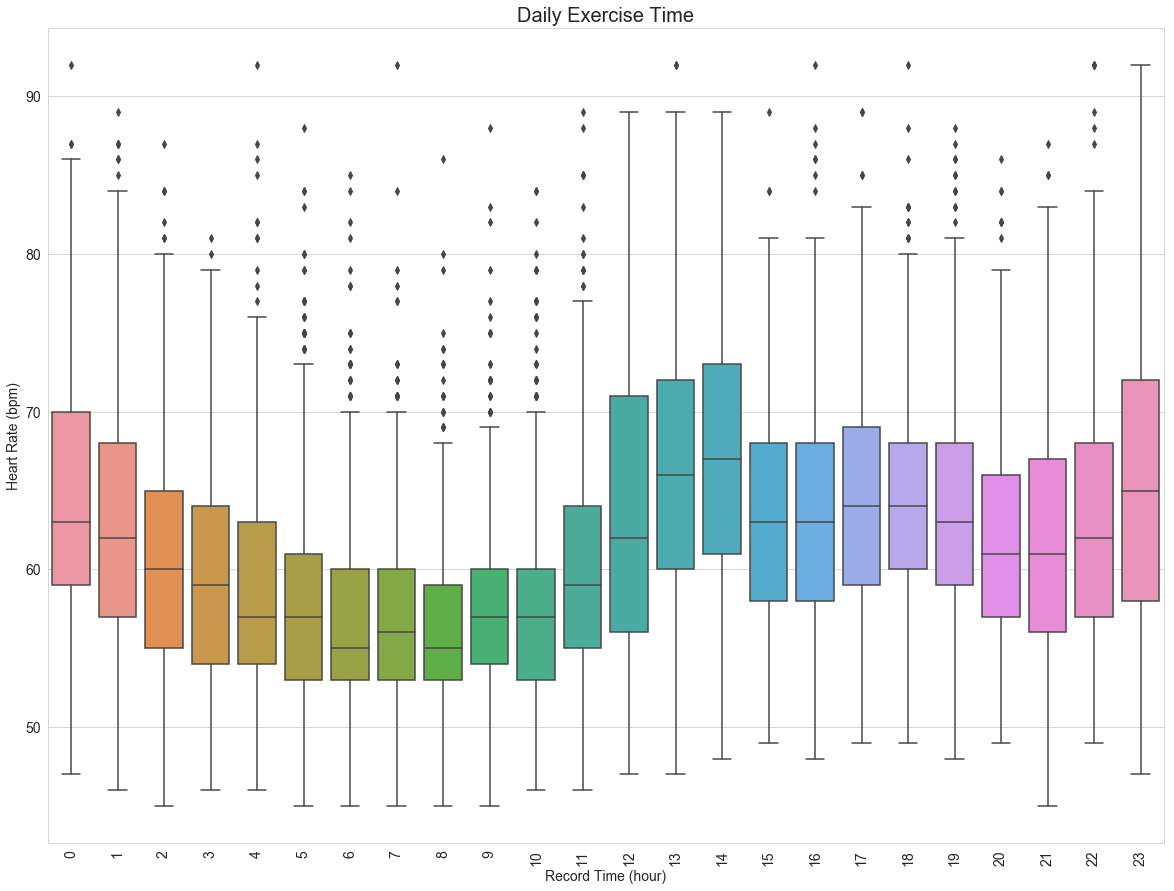

In [196]:
f, ax = plt.subplots(figsize=(20, 15))
sns.boxplot(y="heart_rate",x="record_time", dodge=False, data=hr_df);
ax.axes.set_title("Daily Exercise Time",fontsize=20)
ax.set_xlabel("Record Time (hour)",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

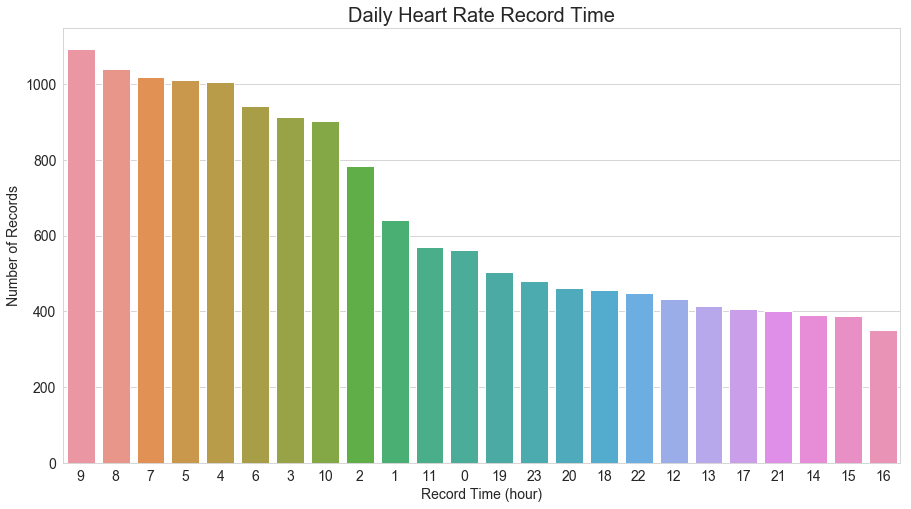

In [197]:
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="record_time",order = hr_df['record_time'].value_counts().index, data=hr_df);
ax.axes.set_title("Daily Heart Rate Record Time",fontsize=20)
ax.set_xlabel("Record Time (hour)",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

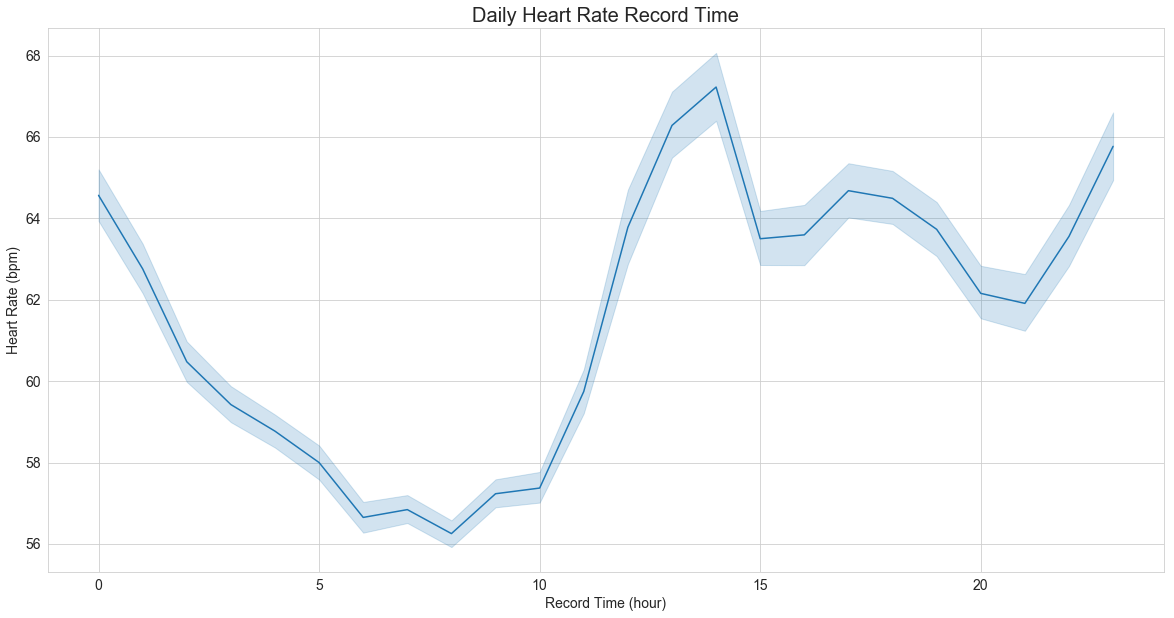

In [198]:
# heart rate recod time line plot
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="record_time", y='heart_rate',
                    data=hr_df)
ax.axes.set_title("Daily Heart Rate Record Time",fontsize=20)
ax.set_xlabel("Record Time (hour)",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

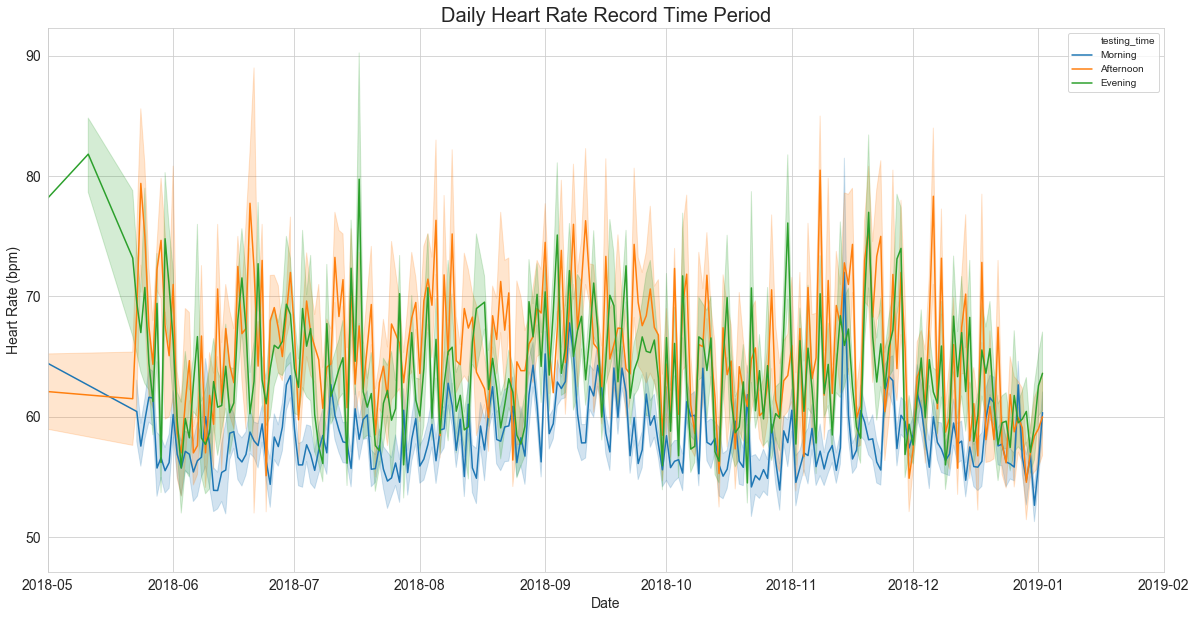

In [199]:
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y='heart_rate', hue= "testing_time",
                    data=hr_df)
ax.set(xlim=("2018-05","2019-02"))
ax.axes.set_title("Daily Heart Rate Record Time Period",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

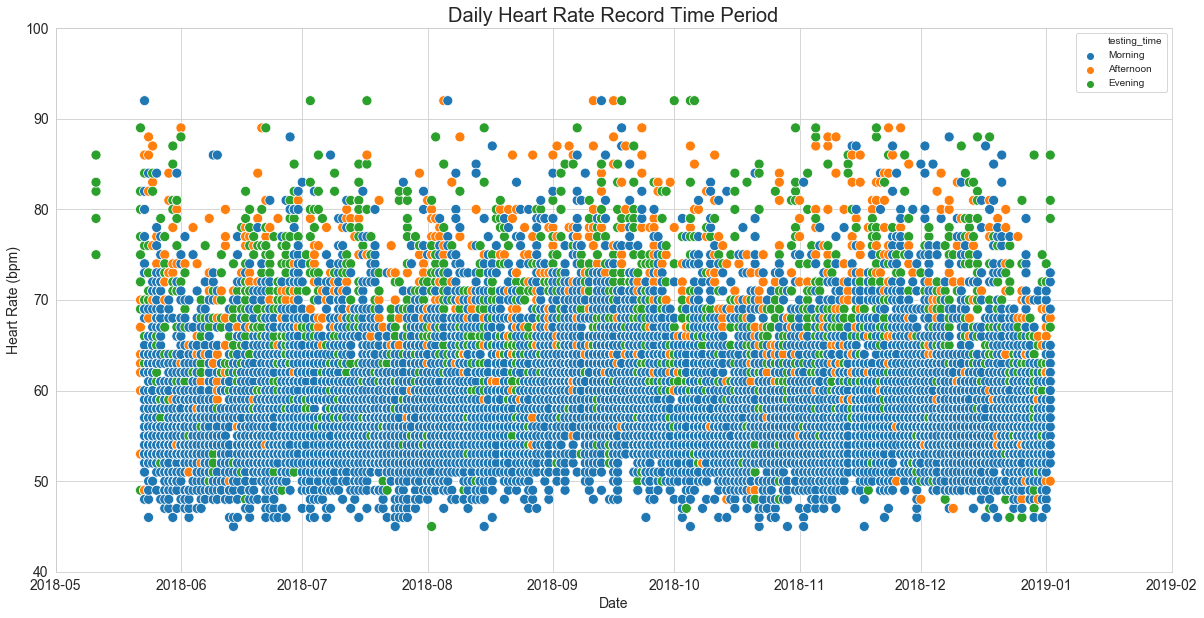

In [200]:
# replot all exercise data after removing casual walking
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="heart_rate",hue= "testing_time", s=100,
                      data=hr_df)
ax.set(xlim=("2018-05","2019-02"))
ax.set(ylim=(40,100))
ax.axes.set_title("Daily Heart Rate Record Time Period",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

# 5. Floor Climbing

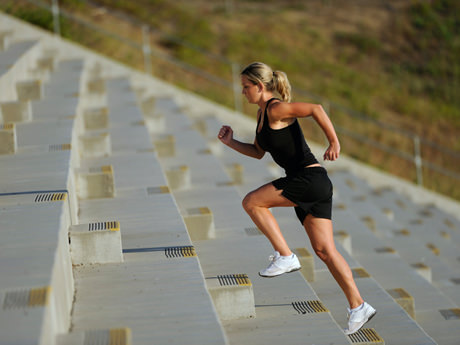

## 5.1 Data Cleaning 

In this section, a deep look is needed to analyze the data, but first, we have to make sure that, our data is clean and well orgnized. To do so, the following steps were considered: 
 
 1. Plotting a bar chart for NaN percentage at every column, where it will give us some glance which columns are have almost 100% NaN or missing value. 
 
 2. Plotting again the heat map to show NaN and Missing values of exercise data. 
 
 3. Dropping 100% NaN columns based on heat map, and NaN percentage bar chart in addition to unnecessary columns. 
 
 4. Creating a new column "date" from start column that continas only the date without time. Drop the start and end columns as they will be needed in the analysis since we have the time duration.  

 5. Calculate the Duration of floor climb count and store it in new column named Duration.
 
 6. Creating a new column "Weekday" which will contain the day of the respective date provided in the exercise data. 
 
 7. Classify the days into weekday and weekend and create a new column named "Week_Class". 
 
 8. Removing small floor climb. 
 
 9. Dropping unrelated columns from the exercise data, as I will not need them for the analysis. 
 

In [201]:
# reading the data
fc_df = pd.read_csv("floors_climbed.csv",encoding = "utf-8",index_col=0)

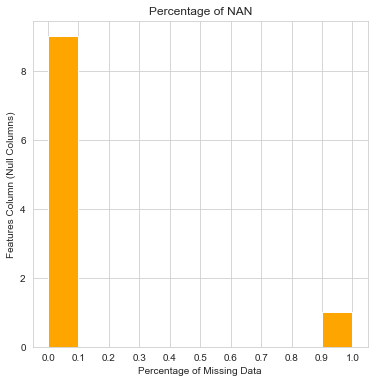

In [202]:
#plotting the percentage of missing value in each column (feature) to % of null columns 
NaN_Percentage = fc_df.isnull().mean().sort_values(ascending=True)
plt.figure(figsize = (6,6))
#percentage from 0 to 1 and number of space lines are 11. 
plt.hist(NaN_Percentage, bins = np.linspace(0, 1, 11),facecolor='orange')
plt.xticks(np.linspace(0, 1, 11));
plt.grid(True)
plt.xlabel('Percentage of Missing Data'); 
plt.ylabel('Features Column (Null Columns)'); 
plt.title("Percentage of NAN");

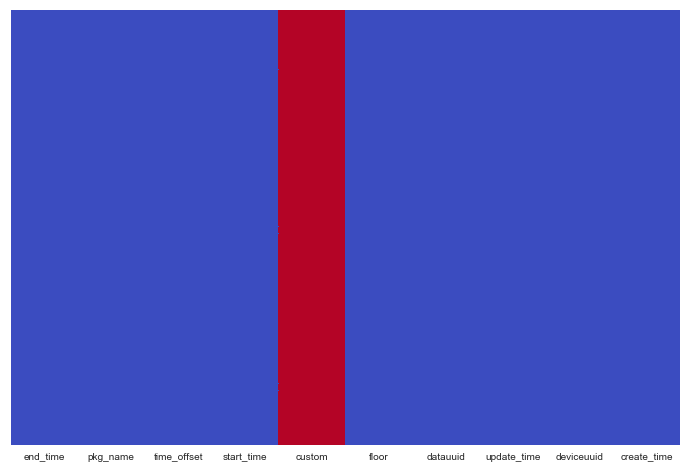

In [203]:
#plotting heat map to check null values 
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(fc_df.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [204]:
print(NaN_Percentage)

end_time       0.0
pkg_name       0.0
time_offset    0.0
start_time     0.0
floor          0.0
datauuid       0.0
update_time    0.0
deviceuuid     0.0
create_time    0.0
custom         1.0
dtype: float64


In [205]:
fc_df.drop(['pkg_name','custom','datauuid','deviceuuid'], axis = 1, inplace = True)

In [206]:
# Converting Start date-time into only date in year,month, day
fc_df['Date'] = pd.to_datetime(fc_df['start_time'])
fc_df['Date'] =fc_df['Date'].apply(lambda x: x.date() )
fc_df['Date'] = fc_df.Date.sort_values()
fc_df.head()

end_time time_offset               start_time  floor  \
0  2018-08-10 21:31:42.000    UTC-0400  2018-08-10 21:30:01.000    8.0   
1  2018-11-06 22:33:11.000    UTC-0500  2018-11-06 22:32:54.000    1.0   
2  2018-07-03 11:50:25.000    UTC-0400  2018-07-03 11:50:11.000    1.0   
3  2018-01-25 02:30:56.000    UTC-0500  2018-01-25 02:29:51.000    2.0   
4  2018-07-03 12:42:05.000    UTC-0400  2018-07-03 12:41:54.000    1.0   

               update_time              create_time        Date  
0  2018-08-10 21:31:53.453  2018-08-10 21:31:52.856  2018-08-10  
1  2018-11-06 22:46:57.117  2018-11-06 22:46:57.116  2018-11-06  
2  2018-07-03 11:52:31.712  2018-07-03 11:52:31.712  2018-07-03  
3  2018-01-25 02:34:47.756  2018-01-25 02:34:47.720  2018-01-25  
4  2018-07-03 12:52:03.893  2018-07-03 12:52:03.893  2018-07-03

In [207]:
# arrange data based on create time
fc_df = fc_df.sort_values('create_time', ascending = True)
fc_df.head()

end_time time_offset               start_time  floor  \
767  2017-12-16 13:48:18.000    UTC-0500  2017-12-16 13:46:12.000    9.0   
277  2017-12-16 16:28:23.000    UTC-0500  2017-12-16 16:28:13.000    1.0   
581  2017-12-17 22:48:36.000    UTC-0500  2017-12-17 22:46:26.000    9.0   
433  2017-12-18 13:16:28.000    UTC-0500  2017-12-18 13:12:32.000    6.0   
245  2017-12-18 14:15:38.000    UTC-0500  2017-12-18 14:15:09.000    1.0   

                 update_time              create_time        Date  
767  2017-12-16 13:48:49.079  2017-12-16 13:48:48.886  2017-12-16  
277  2017-12-16 16:32:40.721  2017-12-16 16:32:40.719  2017-12-16  
581  2017-12-17 22:50:31.878  2017-12-17 22:47:23.443  2017-12-17  
433  2017-12-18 13:16:30.590  2017-12-18 13:15:13.725  2017-12-18  
245  2017-12-18 14:15:39.715  2017-12-18 14:15:36.285  2017-12-18

In [208]:
# compute the duration in minutes
fc_df['Duration'] = pd.to_datetime(fc_df['end_time']) - pd.to_datetime(fc_df['start_time'])

In [209]:
# converting the duration into time in minutes with decimals
fc_df['Duration'] = fc_df['Duration']/np.timedelta64(1,'m')

In [210]:
fc_df.head()

end_time time_offset               start_time  floor  \
767  2017-12-16 13:48:18.000    UTC-0500  2017-12-16 13:46:12.000    9.0   
277  2017-12-16 16:28:23.000    UTC-0500  2017-12-16 16:28:13.000    1.0   
581  2017-12-17 22:48:36.000    UTC-0500  2017-12-17 22:46:26.000    9.0   
433  2017-12-18 13:16:28.000    UTC-0500  2017-12-18 13:12:32.000    6.0   
245  2017-12-18 14:15:38.000    UTC-0500  2017-12-18 14:15:09.000    1.0   

                 update_time              create_time        Date  Duration  
767  2017-12-16 13:48:49.079  2017-12-16 13:48:48.886  2017-12-16  2.100000  
277  2017-12-16 16:32:40.721  2017-12-16 16:32:40.719  2017-12-16  0.166667  
581  2017-12-17 22:50:31.878  2017-12-17 22:47:23.443  2017-12-17  2.166667  
433  2017-12-18 13:16:30.590  2017-12-18 13:15:13.725  2017-12-18  3.933333  
245  2017-12-18 14:15:39.715  2017-12-18 14:15:36.285  2017-12-18  0.483333

In [211]:
# function to get the day from the date
def dayofweek(datestamp):
    return ['Mon', 'Tue', 'Wed','Thur','Fri','Sat','Sun'][datestamp.weekday()]
fc_df['Weekday']  = fc_df["Date"].apply(lambda datestamp: dayofweek(datestamp))

In [212]:
# get the record time in hour as there are steps measure in same day but at different time 
fc_df["record_time"]= pd.to_datetime(fc_df["create_time"]).dt.hour

In [213]:
#Defining lists for each weekday classification with mentioned day
weekend = ['Sat','Sun']
weekday = ['Mon','Tue','Wed','Thur','Fri']


def getday(day):
    if day in weekend:
        return "Weekend"
    elif day in weekday:
        return "Weekday"
    else:
        return "Other"

In [214]:
# get the week class
fc_df['Week_Class'] = fc_df["Weekday"].apply(lambda x: getday(x))

In [215]:
fc_df.head()

end_time time_offset               start_time  floor  \
767  2017-12-16 13:48:18.000    UTC-0500  2017-12-16 13:46:12.000    9.0   
277  2017-12-16 16:28:23.000    UTC-0500  2017-12-16 16:28:13.000    1.0   
581  2017-12-17 22:48:36.000    UTC-0500  2017-12-17 22:46:26.000    9.0   
433  2017-12-18 13:16:28.000    UTC-0500  2017-12-18 13:12:32.000    6.0   
245  2017-12-18 14:15:38.000    UTC-0500  2017-12-18 14:15:09.000    1.0   

                 update_time              create_time        Date  Duration  \
767  2017-12-16 13:48:49.079  2017-12-16 13:48:48.886  2017-12-16  2.100000   
277  2017-12-16 16:32:40.721  2017-12-16 16:32:40.719  2017-12-16  0.166667   
581  2017-12-17 22:50:31.878  2017-12-17 22:47:23.443  2017-12-17  2.166667   
433  2017-12-18 13:16:30.590  2017-12-18 13:15:13.725  2017-12-18  3.933333   
245  2017-12-18 14:15:39.715  2017-12-18 14:15:36.285  2017-12-18  0.483333   

    Weekday  record_time Week_Class  
767     Sat           13    Weekend  
277     Sat           16    Weekend  
581     Sun           22    Weekend  
433     Mon           13    Weekday  
245     Mon           14    Weekday

## 5.2 Explotatory Analysis and Visualization

1. From the line and scatter plot, we can see that this person having a small floor climb, he has a habit of some how lazy behaviour.  

2. Small steps were recognized in the data, actually those could be related to normal steps or stair steps which are classified as floor climb. Therefore, we have to plot and display the statisitcs describtion to determine the threshold. So any floor climb less then 4 will be removed. 

3. After removing small floor climb, the behaviour is still the same, a lazy behaviour is spotted with some small big values. 

4. The most common floor climb is 9 climbs, large climbs are rear. 

5. Most of the floor climbs happended in weekday, probably because weekend is more for rest and fun time. 


**Conclusion:** 

Overall performance of the participant is poor, the trend shows that he is doing small floor climb, and the duration of exercise is very less. I would say the guy is getting bored easily, probably he work out alone without some bears. Thus, it would be good idea to work out with some friends to boost the performance.  

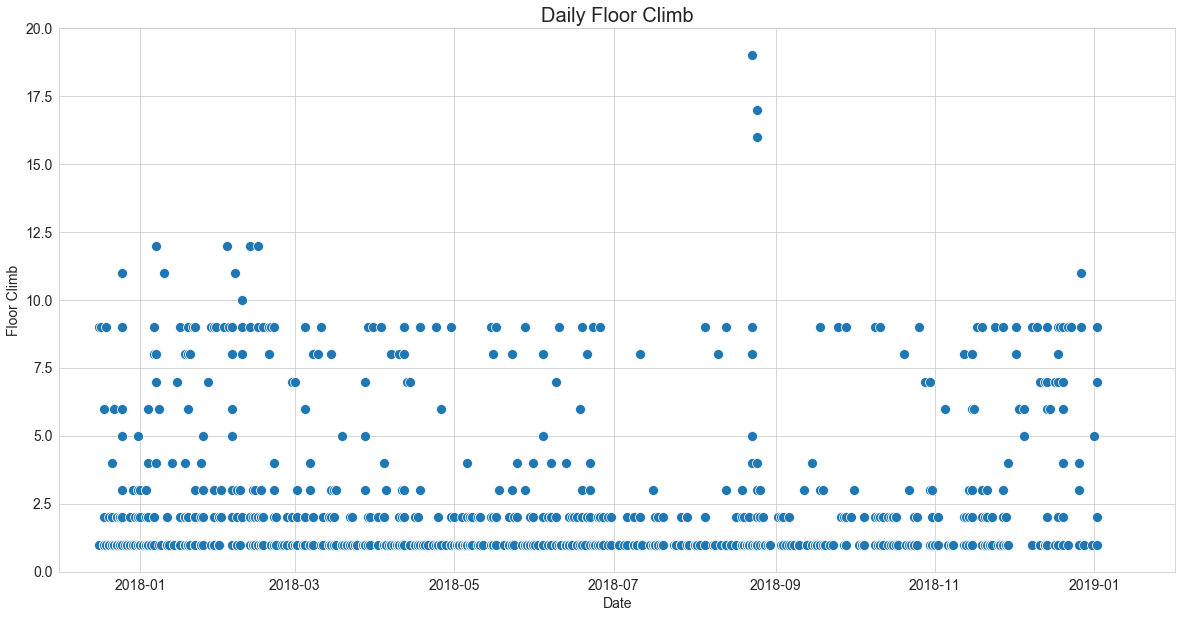

In [216]:
# plot the floor climb data 
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="floor", s=100,
                      data=fc_df)
ax.set(xlim=("2017-12","2019-02"))
ax.set(ylim=(0,20))
ax.axes.set_title("Daily Floor Climb",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Floor Climb",fontsize=14)
ax.tick_params(labelsize=14)

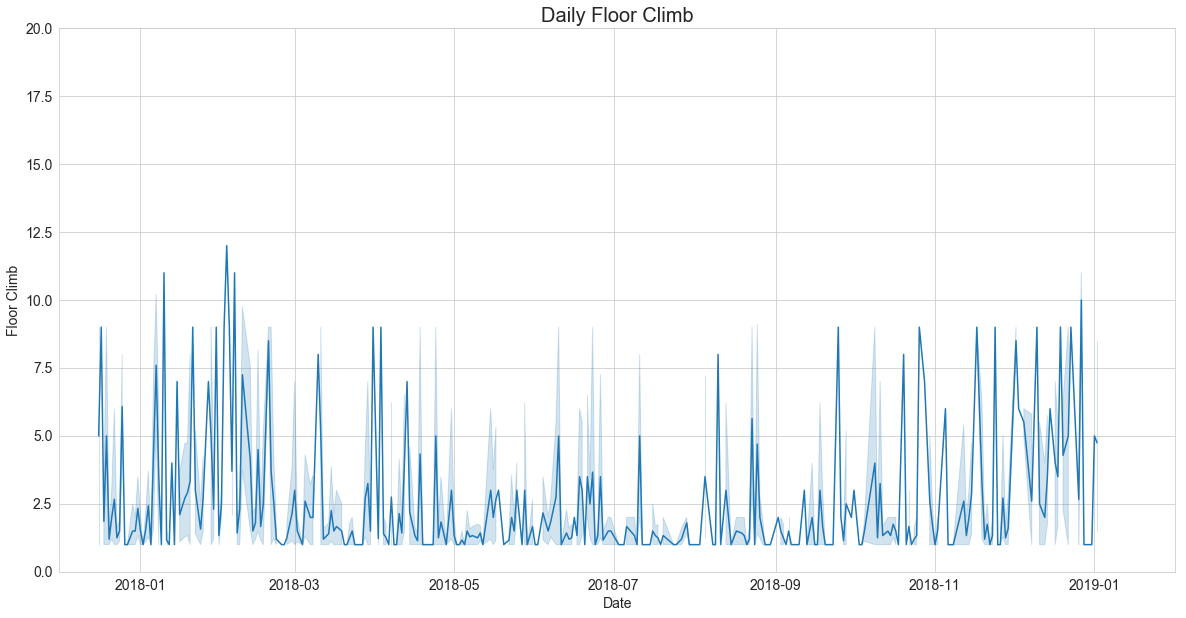

In [217]:
# plot the floor climb data by line 
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.lineplot(x="Date", y="floor",
                      data=fc_df)
ax.set(xlim=("2017-12","2019-02"))
ax.set(ylim=(0,20))
ax.axes.set_title("Daily Floor Climb",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Floor Climb",fontsize=14)
ax.tick_params(labelsize=14)

In [218]:
# remove small floor climb
small_floor = fc_df[((fc_df.floor < 4 ))].index
fc_df = fc_df.drop(list(small_floor), axis=0)

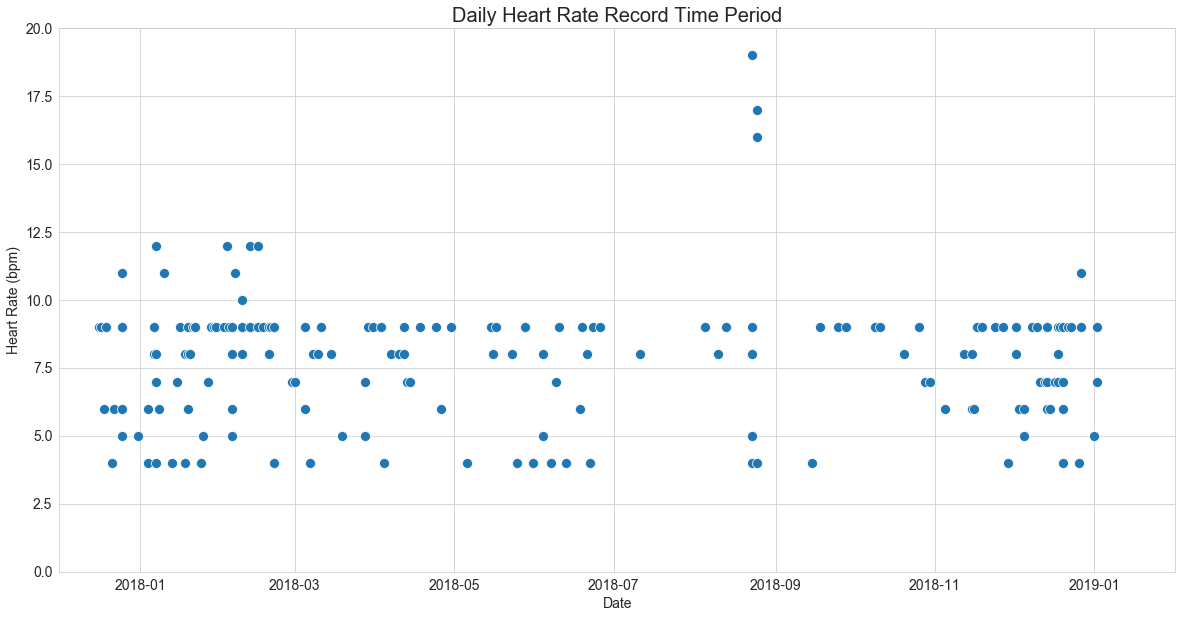

In [219]:
# replot all exercise data after removing small floor climbs
fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax = sns.scatterplot(x="Date", y="floor", s=100,
                      data=fc_df)
ax.set(xlim=("2017-12","2019-02"))
ax.set(ylim=(0,20))
ax.axes.set_title("Daily Heart Rate Record Time Period",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)

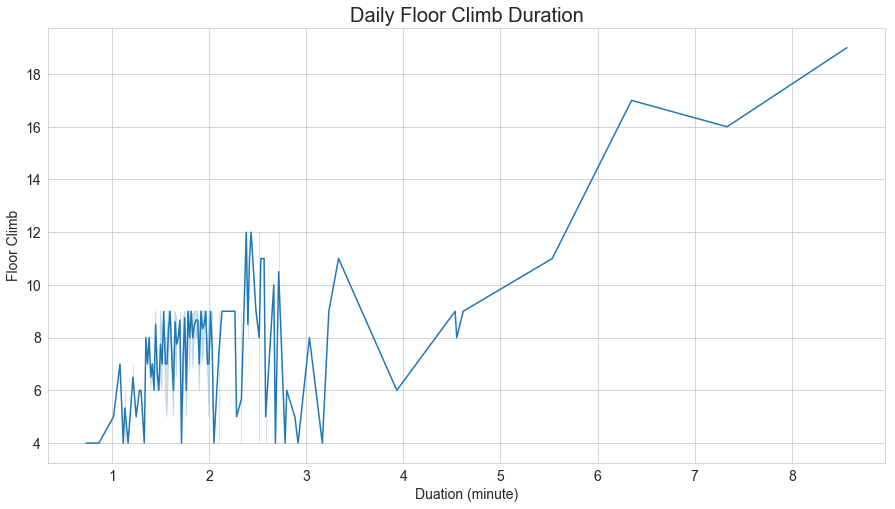

In [220]:
# replot all exercise data after removing small floor climb
fig, ax = plt.subplots(1, 1, figsize = (15, 8))
ax = sns.lineplot(x="Duration", y="floor",
                      data=fc_df)
ax.axes.set_title("Daily Floor Climb Duration",fontsize=20)
ax.set_xlabel("Duation (minute)",fontsize=14)
ax.set_ylabel("Floor Climb",fontsize=14)
ax.tick_params(labelsize=14)

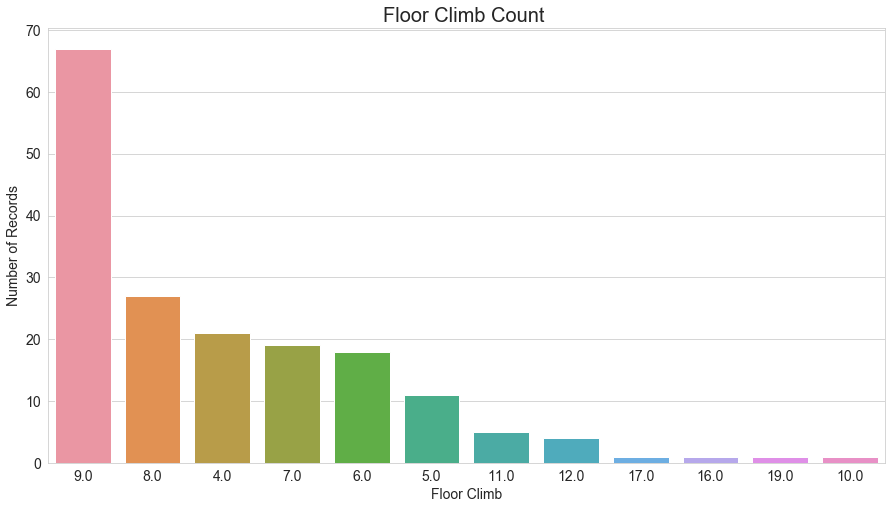

In [221]:
# plot floor climb count
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="floor", order = fc_df['floor'].value_counts().index,data=fc_df);
ax.axes.set_title("Floor Climb Count ",fontsize=20)
ax.set_xlabel("Floor Climb",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

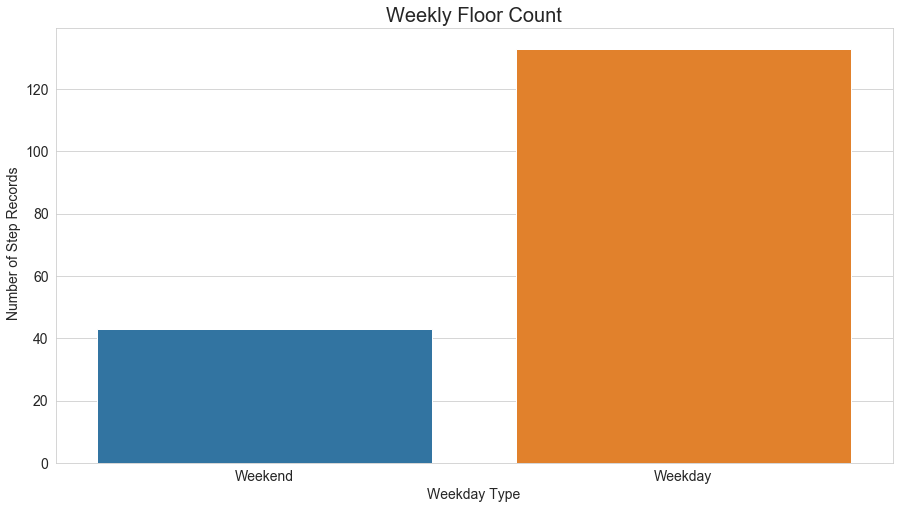

In [222]:
# count the weekdays for every floor climb
f, ax = plt.subplots(figsize=(15, 8))
sns.countplot(x="Week_Class", data=fc_df,);
ax.axes.set_title("Weekly Floor Count",fontsize=20)
ax.set_xlabel("Weekday Type",fontsize=14)
ax.set_ylabel(" Number of Step Records",fontsize=14)
ax.tick_params(labelsize=14)

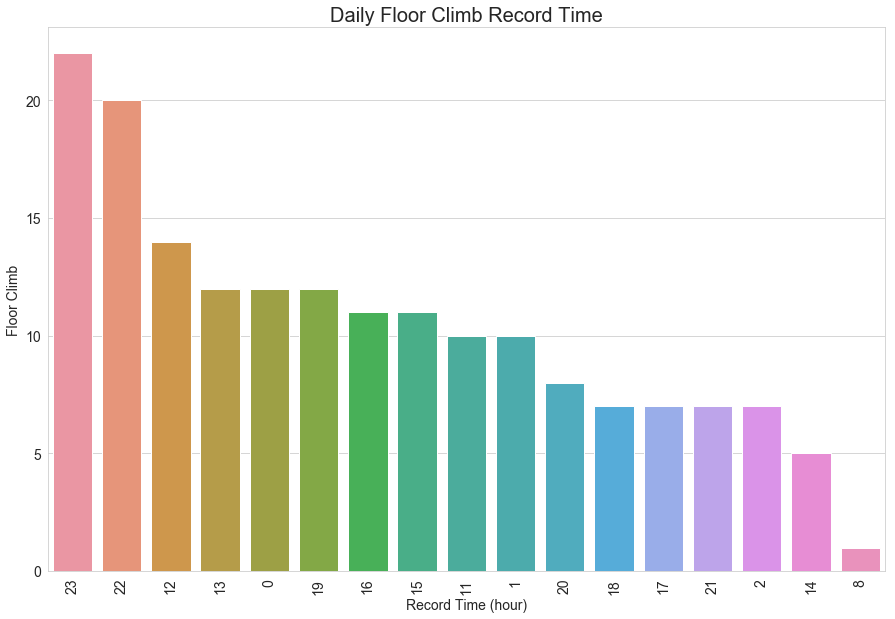

In [223]:
f, ax = plt.subplots(figsize=(15, 10))
sns.countplot(x="record_time", dodge=False,order = fc_df['record_time'].value_counts().index, data=fc_df);
ax.axes.set_title("Daily Floor Climb Record Time",fontsize=20)
ax.set_xlabel("Record Time (hour)",fontsize=14)
ax.set_ylabel("Floor Climb",fontsize=14)
ax.tick_params(labelsize=14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

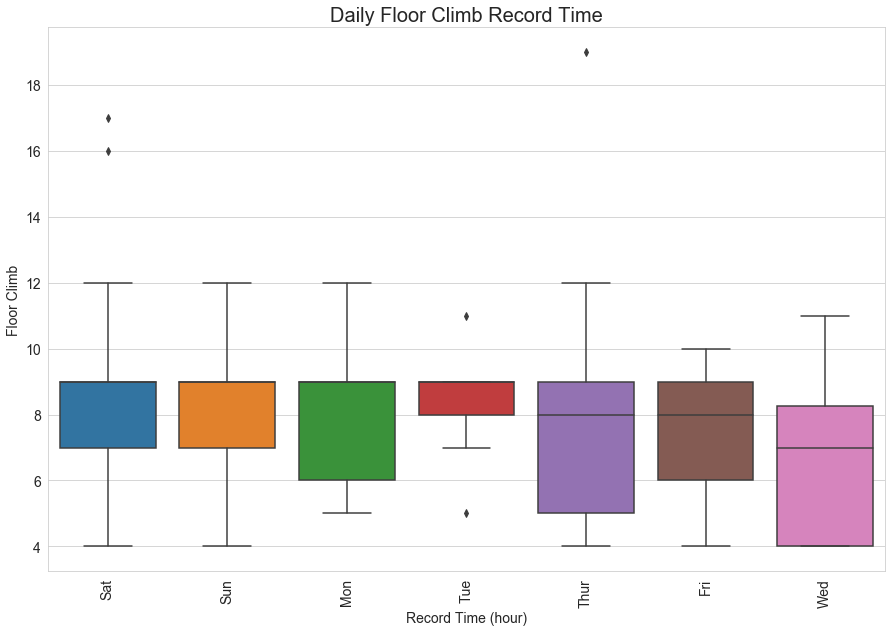

In [224]:
# boxplot for step count for every days
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(y="floor",x="Weekday", dodge=False, data=fc_df);
ax.axes.set_title("Daily Floor Climb Record Time",fontsize=20)
ax.set_xlabel("Record Time (hour)",fontsize=14)
ax.set_ylabel("Floor Climb",fontsize=14)
ax.tick_params(labelsize=14)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

### There are data inconsistencies and overlaps. Also, a big change around Dec, 2017 ! Why ?

As a matter of fact, I did not spot any big change in any data or overlap for Dec, 2017. There are some outliers in the exercise data from 2016 to Dec 2017, those could be due to malfunction the app or device due to app update, or the guy turn his health app off for while and forget to turn it on. 

An overlap was spotted in exercise data Dec 2017 due to travel time, the time offset changed from UTC-0800 (Adamston)  to UTC-0500 (Toronto). 

In [ ]:
# reading the  summary data
#sum_df = pd.read_csv("summary.csv",encoding = "utf-8",index_col=0)

Before writting this, I read and opened the summary data, and I realized that what I have done and what it was collected in the summary data will not match at all for the following reasons: 

1. I have different assumptions for every data I analyized above, which more likely did not match up at all. 
2. I removed some rows for casual walk, small steps, shor sleep and for short floor based on different conditions. 

I can not match what is given in the summary data with what I have done. Howver, more deep analysis for every single detais was done to reach to some useful conclusion. 

# 6. Conclusion & Verdict

To approach the conclusion of the health data, a summary of 3 figures were collected for the most usefull data set. The figures were summaized from the sleeping data,exercise data and heart rate data. The steps and floor climb did not give useful information about the participant health performance. Therefore, I intentially decided not to include any relvant plots here. 

- The exploratory visualization summary plots from the sleeping data shows a healthy sleeping habit. An early consistent bedtime hours ranged from 9 pm to 11 pm are commonly scheduled by the participant.These early bedtime hours result in getting the mininmum required of enough sleep hour ranged from 7 to 9 hours. This health habit can also be seen in a daily wake up time for an individual who sleeps early and wake up early.  

- The exercise data visualization analysis give us an insight about the participant exercise program. There is a variety in the exercise routine which imply that the participant is avoiding to get bored. An interesting trend can be seen in the exercise time where the most common exercise hours are splitted into two time periods. The first time period is in the morning (11 am and noon). The second time period is in the evening (9 pm, 10 pm and 11 pm). For the morninng hours, probably the participant goes for a walk or swimming during lunch break to change the routine and come back active to continue the work. For the evening hours, probably the guy is doing light work out at home before sleeping to get his muscle and body tired to sleep properly, more walking and running in the walking machine. Finally, the timeline plot shows a regular exercise habit even though during travel time. This guy is having an active life style.

- The heart rate data shows a good heart rate distribution where most of the data measure at rest and all are below the average. In general, a low heart rate at rest implies more efficient heart function and a better cariovascular fittness. In addition, the frequency of measuring time of the heart rate plot implies this person is always testing his heart rate in the the morning, probably right after he wakes up. According to healthline, "The best time to test your resting heart rate is first thing in the morning, before you’ve gotten out of bed — ideally after a good night’s sleep" [1]. There are some evening hours where participant is testing his heart rate, I would say that he is testing his heart rate sometime before sleeping and then again when he wakeup in order to measure difference. Basically, the participant is aware about some useful tips regarding heart rate. 


**Verdict:** 

Overall, I can clearly see that all points are connected to one positive verdict. Early sleeping leads to excellent sleeping quality, sleep quality leads to getting enough sleeping hours. Getting enough sleeping hours leads to high degree physical performance as described and was seen in the exercise data. Good sleeping quality and active life style lead to better cariovascular fittness. I can say that this person is an active person, always full with energy, well orgnized with his exercise and sleeping schedules and in a good shape.  


## 6.1 Summay Figure From Sleeping Data

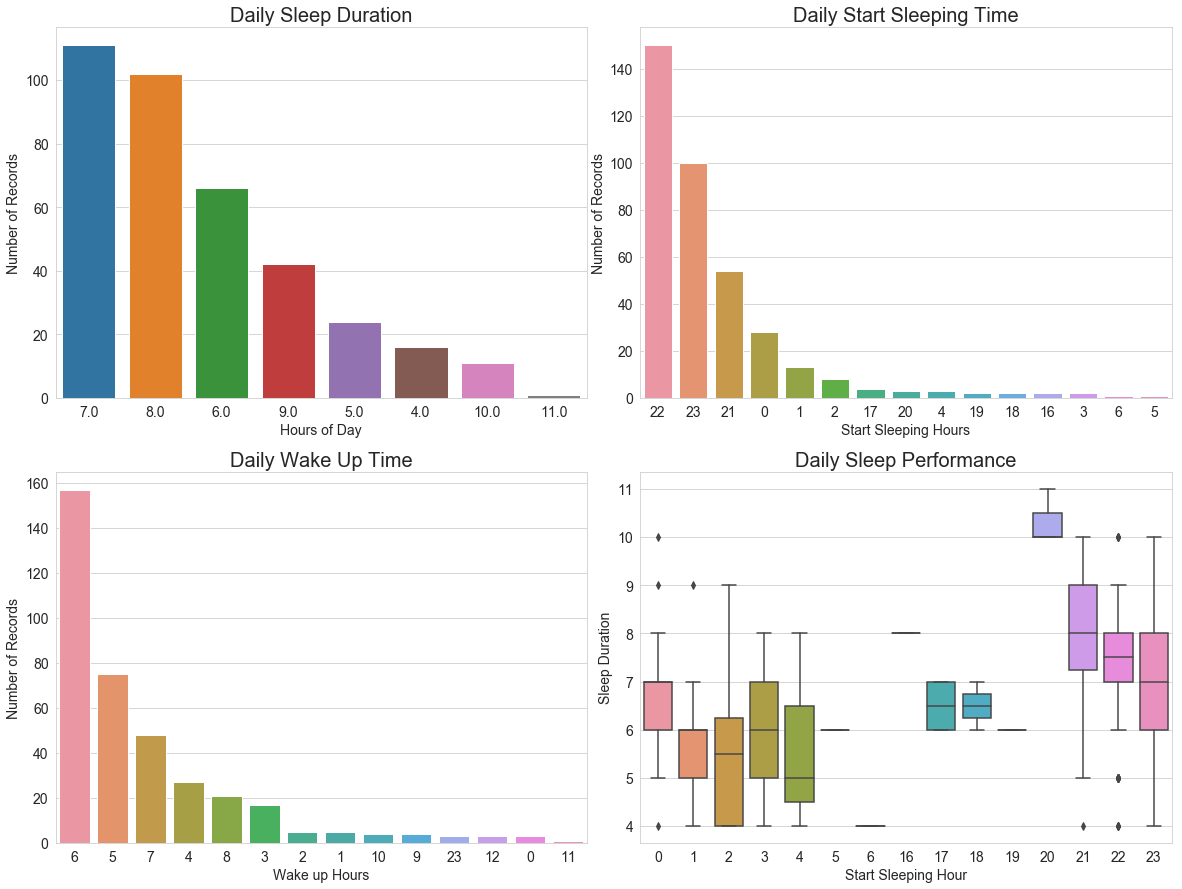

In [225]:
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

ax =plt.subplot(2, 2, 1)
sns.countplot(x="time_in_bed", data=sl_df, order = order0);
ax.set_title("Daily Sleep Duration",fontsize=20)
ax.set_xlabel("Hours of Day",fontsize=14)
ax.set_ylabel("Number of Records",fontsize=14)
ax.tick_params(labelsize=14)

ax1 =plt.subplot(2, 2, 2) 
sns.countplot(x="sleep_time", data=sl_df, order = order1);
ax1.set_title("Daily Start Sleeping Time",fontsize=20)
ax1.set_xlabel("Start Sleeping Hours",fontsize=14)
ax1.set_ylabel("Number of Records",fontsize=14)
ax1.tick_params(labelsize=14)

ax2 =plt.subplot(2, 2, 3) 
sns.countplot(x="wakeup_time", data=sl_df, order = order2);
ax2.axes.set_title("Daily Wake Up Time",fontsize=20)
ax2.set_xlabel("Wake up Hours",fontsize=14)
ax2.set_ylabel("Number of Records",fontsize=14)
ax2.tick_params(labelsize=14)

ax =plt.subplot(2, 2, 4) 
sns.boxplot(y="time_in_bed",x="sleep_time", dodge=False, data=sl_df);
ax.set_title("Daily Sleep Performance",fontsize=20)
ax.set_xlabel("Start Sleeping Hour",fontsize=14)
ax.set_ylabel("Sleep Duration",fontsize=14)
ax.tick_params(labelsize=14)
plt.show();

## 6.2 Summay Figure From Exercise Data

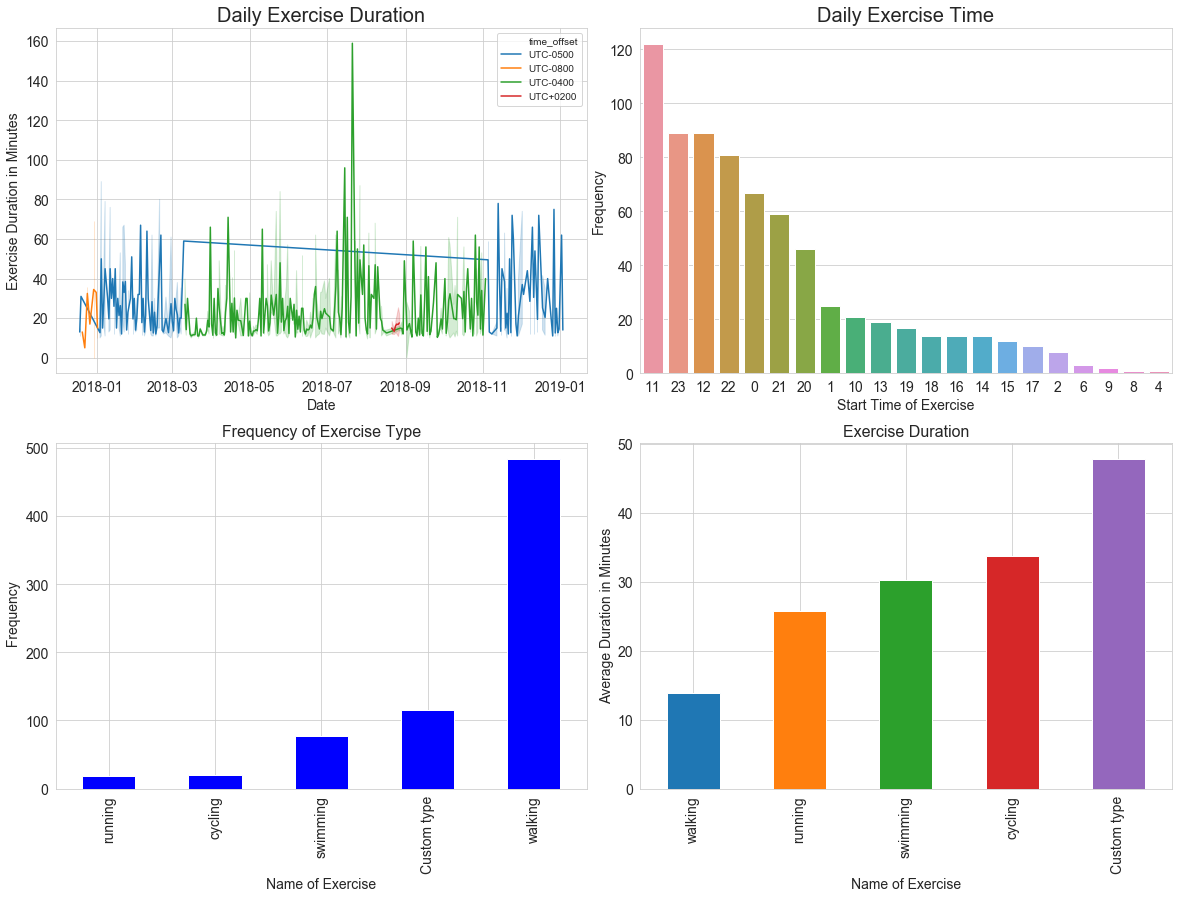

In [226]:
# replot after removing outliers
fig = plt.figure(figsize=(20,14))
plt.subplots_adjust(wspace=0.1, hspace=0.2)

ax =plt.subplot(2, 2, 1)

sns.lineplot(x="Date", y='Duration', hue="time_offset",
                    data=ex_df)
ax.axes.set_title("Daily Exercise Duration",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Exercise Duration in Minutes",fontsize=14)
ax.tick_params(labelsize=14)

ax1 =plt.subplot(2, 2, 2)

sns.countplot(x="start_time", data=ex_df, order=order3);
ax1.axes.set_title("Daily Exercise Time",fontsize=20)
ax1.set_xlabel("Start Time of Exercise",fontsize=14)
ax1.set_ylabel("Frequency",fontsize=14)
ax1.tick_params(labelsize=14)

ax2 =plt.subplot(2, 2, 3)
# plot number of records for every exercise

ex_df.groupby(['exercise_type'])["Duration"].count().sort_values(ascending=True).plot(kind='bar',color='blue')
plt.title("Frequency of Exercise Type", fontsize=16)
plt.xlabel("Name of Exercise", fontsize=14)
plt.ylabel(" Frequency", fontsize=14)
ax2.tick_params(labelsize=14)

ax3 =plt.subplot(2, 2, 4)
ex_df.groupby(['exercise_type'])["Duration"].mean().sort_values(ascending=True).plot(kind='bar')
plt.title("Exercise Duration", fontsize=16)
plt.xlabel("Name of Exercise", fontsize=14)
plt.ylabel("Average Duration in Minutes", fontsize=14)
ax3.tick_params(labelsize=14)
plt.show();

## 6.3 Summay Figure From Heart Rate Data

C:\Users\Mohammed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


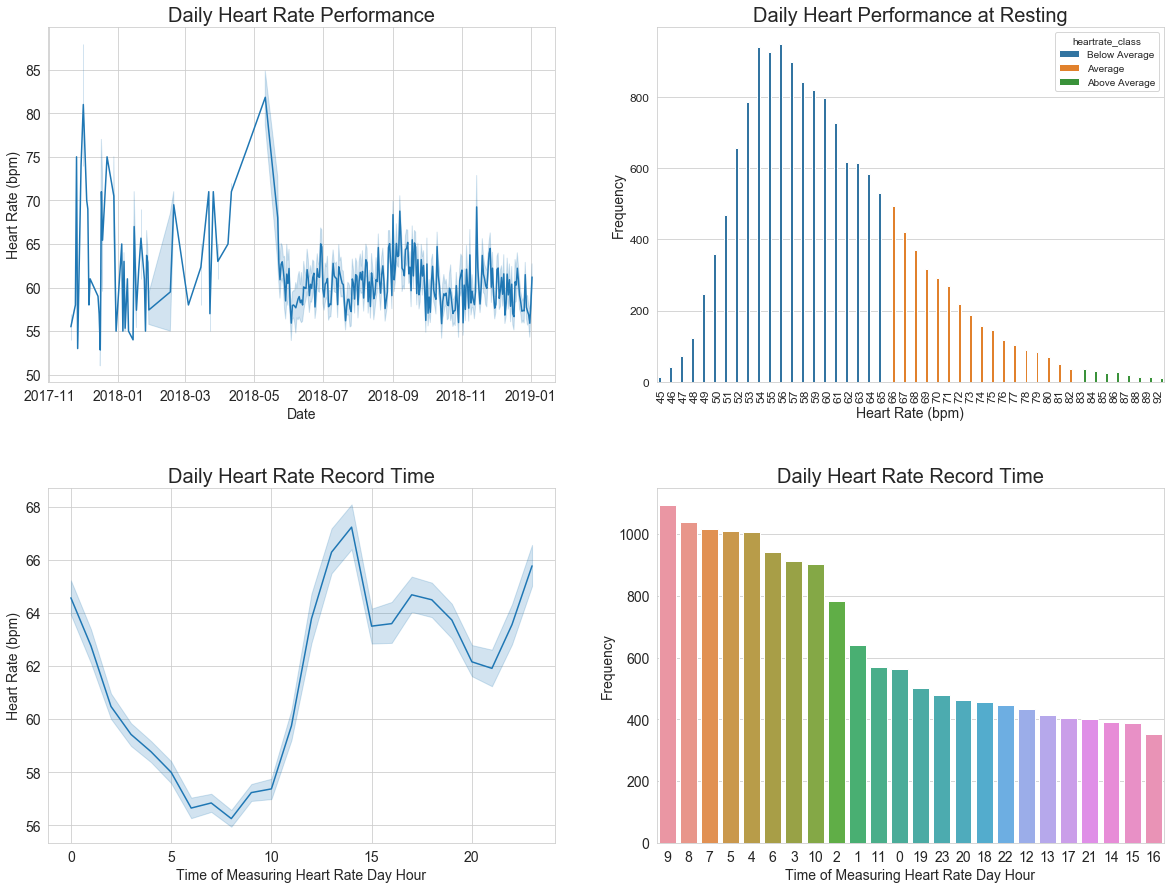

In [227]:
# line plot of heart rate
fig = plt.figure(figsize=(20,15))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax =plt.subplot(2, 2, 1)

sns.lineplot(x="Date", y='heart_rate',
                    data=hr_df)
ax.axes.set_title("Daily Heart Rate Performance",fontsize=20)
ax.set_xlabel("Date",fontsize=14)
ax.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax.tick_params(labelsize=14)



# replot after removing small counts from heart rate 
ax1 =plt.subplot(2, 2, 2)
sns.countplot(x="heart_rate",hue='heartrate_class',data=hr_df,);
ax1.axes.set_title("Daily Heart Performance at Resting",fontsize=20)
ax1.set_xlabel("Heart Rate (bpm)",fontsize=14)
ax1.set_ylabel("Frequency",fontsize=14)
ax1.tick_params(labelsize=12)
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)
    
    
    
# heart rate recod time line plot
ax2 =plt.subplot(2, 2, 3)
sns.lineplot(x="record_time", y='heart_rate',
                    data=hr_df)
ax2.axes.set_title("Daily Heart Rate Record Time",fontsize=20)
ax2.set_xlabel("Time of Measuring Heart Rate Day Hour",fontsize=14)
ax2.set_ylabel("Heart Rate (bpm)",fontsize=14)
ax2.tick_params(labelsize=14)

ax3 =plt.subplot(2, 2, 4)
sns.countplot(x="record_time",order = hr_df['record_time'].value_counts().index, data=hr_df);
ax3.axes.set_title("Daily Heart Rate Record Time",fontsize=20)
ax3.set_xlabel("Time of Measuring Heart Rate Day Hour",fontsize=14)
ax3.set_ylabel("Frequency",fontsize=14)
ax3.tick_params(labelsize=14)


